In [2]:
import pandas as pd 


In [ ]:
df_list = tabula.read_pdf("data/january_wl_1994-2024-compressed.pdf", pages="all", multiple_tables=True)
for i, df in enumerate(df_list):
    df.to_csv(f"output_table_{i}.csv", index=False)

In [ ]:
df = tabula.read_pdf("data/january_wl_1994-2024-compressed.pdf", pages=1)

In [3]:
tables = camelot.read_pdf("data/january_wl_1994-2024-compressed.pdf", pages="1", flavor="stream")

print("Number of tables found:", tables.n)
if tables.n > 0:
    tables[0].to_csv("output.csv")
else:
    print("⚠️ No tables detected on this page.")

Number of tables found: 1


In [4]:
for i, table in enumerate(tables):
    table.to_csv(f"output_table_{i}.csv", index=False)

print(f"✅ {tables.n} table(s) saved as CSV.")

✅ 1 table(s) saved as CSV.


In [11]:
import camelot
import pandas as pd
import os
from joblib import Parallel, delayed
from tqdm import tqdm  # nice progress bar

pdf_path = "data/january_wl_1994-2024-compressed.pdf"
total_pages = 10242
chunk_size = 20
output_dir = "chunks"
os.makedirs(output_dir, exist_ok=True)

# Calculate total number of chunks
chunks = [(start, min(start + chunk_size - 1, total_pages))
          for start in range(1, total_pages + 1, chunk_size)]
total_chunks = len(chunks)
print(f"📊 Total chunks: {total_chunks}")

def process_chunk(start, end, idx):
    filename = os.path.join(output_dir, f"tables_{start}_{end}.csv")
    if os.path.exists(filename):  # Resume mode
        return f"⏩ Skipping {idx}/{total_chunks} (pages {start}-{end}), already done."

    page_range = f"{start}-{end}"
    try:
        tables = camelot.read_pdf(pdf_path, pages=page_range, flavor="stream")
        if tables.n > 0:
            dfs = [t.df for t in tables]
            combined = pd.concat(dfs, ignore_index=True)
            combined.to_csv(filename, index=False)
            return f"✅ Done {idx}/{total_chunks} (pages {page_range}, {tables.n} tables)"
        else:
            return f"⚠️ No tables found in {idx}/{total_chunks} (pages {page_range})"
    except Exception as e:
        return f"❌ Error in {idx}/{total_chunks} (pages {page_range}): {e}"

# Run in parallel with progress tracking
results = Parallel(n_jobs=-1, backend="loky")(
    delayed(process_chunk)(start, end, idx+1)
    for idx, (start, end) in enumerate(chunks)
)

# Print results progressively
for r in results:
    print(r)

print("\n📂 Merging all chunk CSVs...")
all_dfs = []
for file in sorted(os.listdir(output_dir)):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(output_dir, file))
        all_dfs.append(df)

if all_dfs:
    combined = pd.concat(all_dfs, ignore_index=True)
    combined.to_csv("all_tables_combined.csv", index=False)
    print("✅ Done! Final combined CSV saved as all_tables_combined.csv")
else:
    print("⚠️ No CSVs to merge.")


📊 Total chunks: 513
✅ Done 1/513 (pages 1-20, 20 tables)
✅ Done 2/513 (pages 21-40, 20 tables)
✅ Done 3/513 (pages 41-60, 20 tables)
✅ Done 4/513 (pages 61-80, 21 tables)
✅ Done 5/513 (pages 81-100, 20 tables)
✅ Done 6/513 (pages 101-120, 20 tables)
✅ Done 7/513 (pages 121-140, 20 tables)
✅ Done 8/513 (pages 141-160, 20 tables)
✅ Done 9/513 (pages 161-180, 21 tables)
✅ Done 10/513 (pages 181-200, 20 tables)
✅ Done 11/513 (pages 201-220, 20 tables)
✅ Done 12/513 (pages 221-240, 20 tables)
✅ Done 13/513 (pages 241-260, 20 tables)
✅ Done 14/513 (pages 261-280, 20 tables)
✅ Done 15/513 (pages 281-300, 20 tables)
✅ Done 16/513 (pages 301-320, 20 tables)
✅ Done 17/513 (pages 321-340, 20 tables)
✅ Done 18/513 (pages 341-360, 21 tables)
✅ Done 19/513 (pages 361-380, 21 tables)
✅ Done 20/513 (pages 381-400, 21 tables)
✅ Done 21/513 (pages 401-420, 20 tables)
✅ Done 22/513 (pages 421-440, 20 tables)
✅ Done 23/513 (pages 441-460, 20 tables)
✅ Done 24/513 (pages 461-480, 20 tables)
✅ Done 25/513 (

In [ ]:
import os
import re

output_dir = "chunks"
output_file = "all_tables_combined.csv"

# Get all CSVs and sort them by start page number
files = sorted(
    [f for f in os.listdir(output_dir) if f.endswith(".csv")],
    key=lambda x: int(re.search(r"tables_(\d+)_", x).group(1))
)

print(f"📊 Found {len(files)} chunk CSVs. Merging in order...")

all_dfs = []
for file in files:
    path = os.path.join(output_dir, file)
    print(f"   ➝ Adding {file}")
    df = pd.read_csv(path)
    all_dfs.append(df)

if all_dfs:
    combined = pd.concat(all_dfs, ignore_index=True)
    combined.to_csv(output_file, index=False)
    print(f"\n✅ Done! Final combined CSV saved as {output_file}")
else:
    print("⚠️ No CSV files found in chunks folder.")


📊 Found 513 chunk CSVs. Merging in order...
   ➝ Adding tables_1_20.csv
   ➝ Adding tables_21_40.csv
   ➝ Adding tables_41_60.csv
   ➝ Adding tables_61_80.csv
   ➝ Adding tables_81_100.csv
   ➝ Adding tables_101_120.csv
   ➝ Adding tables_121_140.csv
   ➝ Adding tables_141_160.csv
   ➝ Adding tables_161_180.csv
   ➝ Adding tables_181_200.csv
   ➝ Adding tables_201_220.csv
   ➝ Adding tables_221_240.csv
   ➝ Adding tables_241_260.csv
   ➝ Adding tables_261_280.csv
   ➝ Adding tables_281_300.csv
   ➝ Adding tables_301_320.csv
   ➝ Adding tables_321_340.csv
   ➝ Adding tables_341_360.csv
   ➝ Adding tables_361_380.csv
   ➝ Adding tables_381_400.csv
   ➝ Adding tables_401_420.csv
   ➝ Adding tables_421_440.csv
   ➝ Adding tables_441_460.csv
   ➝ Adding tables_461_480.csv
   ➝ Adding tables_481_500.csv
   ➝ Adding tables_501_520.csv
   ➝ Adding tables_521_540.csv
   ➝ Adding tables_541_560.csv
   ➝ Adding tables_561_580.csv
   ➝ Adding tables_581_600.csv
   ➝ Adding tables_601_620.csv
   ➝ 

In [ ]:
rainfall_df = pd.read_csv("data/Indian Rainfall Dataset District-wise Daily Measurements.csv" , sep=";")
rainfall_df.head()

,state,district,month,1st,2nd,3rd,4th,5th,6th,7th,...,22nd,23rd,24th,25th,26th,27th,28th,29th,30th,31st
0,Andaman & Nicobar,Nicobars,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,Andaman & Nicobar,North And Middle Andaman,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,Andaman & Nicobar,South Andamans,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,Andhra Pradesh,Anantapur,1,0.379965,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.205834,0.671002,0.028994,0.0,0.0,0.0
4,Andhra Pradesh,Chittoor,1,14.144900,0.857263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.615237,0.925098,0.507623,0.424843,0.737394,0.0,0.0,0.0


In [13]:
water_level_df = pd.read_csv("data/all_tables_combined.csv")
water_level_df.head()

,0,1,2,3,4,5,6,7,8
0,NaN,NaN,January month Depth to Water Level (In mbgl) D...,NaN,NaN,NaN,NaN,NaN,NaN
1,STATE_UT,DISTRICT,BLOCK,VILLAGE,LATITUDE,LONGITUDE,Date,WL(mbgl),NaN
2,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Addateegala,17.46330,82.02710,01-01-24,9.0,NaN
3,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Mallavaram Mammilu,17.50320,82.01240,01-01-24,4.0,NaN
4,Andhra Pradesh,Alluri Sitharama Raju,Addateegala,Rayapalli,17.57208,82.00850,01-01-24,1.9,NaN


In [2]:
import xarray as xr

# open NetCDF file
ds = xr.open_dataset("data/imdlib_rain_1994-01-01_to_2024-12-31_polygon.nc")
print(ds)


<xarray.Dataset> Size: 17MB
Dimensions:      (time: 11323, lat: 14, lon: 13)
Coordinates:
  * time         (time) datetime64[ns] 91kB 1994-01-01 1994-01-02 ... 2024-12-31
  * lat          (lat) float64 112B 27.75 28.0 28.25 28.5 ... 30.5 30.75 31.0
  * lon          (lon) float64 104B 74.5 74.75 75.0 75.25 ... 77.0 77.25 77.5
    spatial_ref  int32 4B ...
Data variables:
    rain         (time, lat, lon) float64 16MB ...


In [3]:
rainfall_df = ds.to_dataframe().reset_index()

rainfall_df.head()


,time,lat,lon,rain,spatial_ref
0,1994-01-01,27.75,74.50,NaN,0
1,1994-01-01,27.75,74.75,NaN,0
2,1994-01-01,27.75,75.00,NaN,0
3,1994-01-01,27.75,75.25,NaN,0
4,1994-01-01,27.75,75.50,NaN,0


In [9]:
soil_df = pd.read_csv("data/sm_haryana_2020.csv")
soil_df.head(100)

,Date,State Name,DistrictName,Average Soilmoisture Level (at 15cm),Average SoilMoisture Volume (at 15cm),Aggregate Soilmoisture Percentage (at 15cm),Volume Soilmoisture percentage (at 15cm)
0,2020/01/31,HARYANA,KAITHAL,0.00,311.34,0.00,26.302692
1,2020/01/31,HARYANA,ROHTAK,0.00,112.75,0.00,12.773071
2,2020/01/31,HARYANA,GURGAON,0.24,117.51,2.27,18.539393
3,2020/01/31,HARYANA,MAHENDRAGARH,0.00,89.41,0.00,9.048720
4,2020/01/31,HARYANA,PALWAL,0.00,112.34,0.00,16.583157
...,...,...,...,...,...,...,...
95,2020/01/27,HARYANA,KARNAL,0.00,307.26,0.03,22.629410
96,2020/01/27,HARYANA,FATEHABAD,0.00,234.51,0.00,18.970077
97,2020/01/27,HARYANA,JHAJJAR,0.00,123.55,0.00,12.436995
98,2020/01/27,HARYANA,KURUKSHETRA,0.00,206.42,0.00,25.530452


In [5]:
rainfall_df.info()       # columns, types, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060786 entries, 0 to 2060785
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   time         datetime64[ns]
 1   lat          float64       
 2   lon          float64       
 3   rain         float64       
 4   spatial_ref  int32         
dtypes: datetime64[ns](1), float64(3), int32(1)
memory usage: 70.8 MB


In [7]:
import pandas as pd

# Show all rows (⚠️ careful if file is huge)
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Prevent line wrapping
pd.set_option("display.width", None)

# Increase column content width
pd.set_option("display.max_colwidth", None)

print(rainfall_df)


KeyboardInterrupt: 

In [9]:
df = rainfall_df[["time", "lat", "lon", "rain"]]
print(df.head())



        time    lat    lon  rain
0 1994-01-01  27.75  74.50   NaN
1 1994-01-01  27.75  74.75   NaN
2 1994-01-01  27.75  75.00   NaN
3 1994-01-01  27.75  75.25   NaN
4 1994-01-01  27.75  75.50   NaN


In [10]:
big_file = "data/all_tables_combined.csv"
df = pd.read_csv(big_file)

# Inspect columns first (optional, just to see what’s inside)
print("📊 Columns in dataset:", df.columns.tolist())

# Filter rows that contain 'Haryana' in ANY column
haryana_df = df[df.apply(lambda row: row.astype(str).str.contains("Haryana", case=False, na=False).any(), axis=1)]

# Save filtered data
output_file = "haryana_data.csv"
haryana_df.to_csv(output_file, index=False)

print(f"✅ Done! Extracted {len(haryana_df)} rows for Haryana → {output_file}")


📊 Columns in dataset: ['0', '1', '2', '3', '4', '5', '6', '7', '8']
✅ Done! Extracted 10069 rows for Haryana → haryana_data.csv


In [11]:
haryana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10069 entries, 0 to 10068
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10069 non-null  object 
 1   1       10069 non-null  object 
 2   2       10069 non-null  object 
 3   3       10069 non-null  object 
 4   4       10069 non-null  float64
 5   5       10069 non-null  float64
 6   6       10069 non-null  object 
 7   7       10069 non-null  float64
 8   8       0 non-null      float64
dtypes: float64(4), object(5)
memory usage: 708.1+ KB


In [13]:
haryana_df = haryana_df.drop(haryana_df.columns[8], axis=1)

# Now rename with clean column names
haryana_df.columns = ["STATE_UT", "DISTRICT", "BLOCK", "VILLAGE", 
              "lat", "lon", "Date", "WL(mbgl)"]

In [14]:
haryana_df.head()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,lat,lon,Date,WL(mbgl)
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.76250,01-01-24,1.7
1,Haryana,Ambala,Ambala-I,Jandheri,30.09333,76.61028,01-01-24,43.9
2,Haryana,Ambala,Ambala-I,Kakru,30.40833,76.78750,01-01-24,0.8
3,Haryana,Ambala,Ambala-I,Pinjola,30.26250,76.61389,01-01-24,4.9
4,Haryana,Ambala,Ambala-Ii,Balana,30.32083,76.72917,01-01-24,0.8


In [17]:
haryana_df = pd.read_csv("data/haryana_clean.csv")

In [16]:
haryana_df.to_csv("haryana_clean.csv", index=False)

print("✅ Cleaned Haryana dataset saved as 'haryana_clean.csv'")
print(haryana_df.head())

✅ Cleaned Haryana dataset saved as 'haryana_clean.csv'
  STATE_UT DISTRICT      BLOCK       VILLAGE       lat       lon      Date  \
0  Haryana   Ambala   Ambala-I  Ambala Cantt  30.38333  76.76250  01-01-24   
1  Haryana   Ambala   Ambala-I      Jandheri  30.09333  76.61028  01-01-24   
2  Haryana   Ambala   Ambala-I         Kakru  30.40833  76.78750  01-01-24   
3  Haryana   Ambala   Ambala-I       Pinjola  30.26250  76.61389  01-01-24   
4  Haryana   Ambala  Ambala-Ii        Balana  30.32083  76.72917  01-01-24   

   WL(mbgl)  
0       1.7  
1      43.9  
2       0.8  
3       4.9  
4       0.8  


In [15]:
import geopandas as gpd
import pandas as pd

# Convert rainfall DataFrame → GeoDataFrame
rain_gdf = gpd.GeoDataFrame(
    rainfall_df,
    geometry=gpd.points_from_xy(rainfall_df.lon, rainfall_df.lat),
    crs="EPSG:4326"  # WGS84
)

# Convert groundwater DataFrame → GeoDataFrame
gw_gdf = gpd.GeoDataFrame(
    haryana_df,
    geometry=gpd.points_from_xy(haryana_df.lon, haryana_df.lat),
    crs="EPSG:4326"
)

# Spatial join: match each groundwater point to nearest rainfall grid point
merged = gpd.sjoin_nearest(
    gw_gdf, rain_gdf, how="inner", distance_col="dist_km"
)

# Drop geometry if you just want a pandas DataFrame
merged = pd.DataFrame(merged.drop(columns="geometry"))

print(merged.head())


c:\Derp\venv\Lib\site-packages\geopandas\array.py:408: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


  STATE_UT DISTRICT     BLOCK       VILLAGE  lat_left  lon_left      Date  \
0  Haryana   Ambala  Ambala-I  Ambala Cantt  30.38333   76.7625  01-01-24   
0  Haryana   Ambala  Ambala-I  Ambala Cantt  30.38333   76.7625  01-01-24   
0  Haryana   Ambala  Ambala-I  Ambala Cantt  30.38333   76.7625  01-01-24   
0  Haryana   Ambala  Ambala-I  Ambala Cantt  30.38333   76.7625  01-01-24   
0  Haryana   Ambala  Ambala-I  Ambala Cantt  30.38333   76.7625  01-01-24   

   WL(mbgl)  index_right       time  lat_right  lon_right      rain  \
0       1.7       254770 1997-10-31       30.5      76.75  1.452403   
0       1.7       254952 1997-11-01       30.5      76.75  0.000000   
0       1.7       255134 1997-11-02       30.5      76.75  0.000000   
0       1.7       255316 1997-11-03       30.5      76.75  0.000000   
0       1.7      1820152 2021-05-19       30.5      76.75  0.000000   

   spatial_ref   dist_km  
0            0  0.117338  
0            0  0.117338  
0            0  0.117338  
0 

In [19]:
merged.head()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,lat_left,lon_left,Date,WL(mbgl),index_right,time,lat_right,lon_right,rain,spatial_ref,dist_km
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.7625,01-01-24,1.7,254770,1997-10-31,30.5,76.75,1.452403,0,0.117338
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.7625,01-01-24,1.7,254952,1997-11-01,30.5,76.75,0.000000,0,0.117338
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.7625,01-01-24,1.7,255134,1997-11-02,30.5,76.75,0.000000,0,0.117338
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.7625,01-01-24,1.7,255316,1997-11-03,30.5,76.75,0.000000,0,0.117338
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.7625,01-01-24,1.7,1820152,2021-05-19,30.5,76.75,0.000000,0,0.117338


In [22]:
# For rainfall
print("Rainfall time range:", rainfall_df["time"].min(), "→", rainfall_df["time"].max())
print("Rainfall unique time samples:", rainfall_df["time"].nunique())
print("Rainfall first 10 dates:", rainfall_df["time"].sort_values().unique()[:10])

Rainfall time range: 1994-01-01 00:00:00 → 2024-12-31 00:00:00
Rainfall unique time samples: 11323
Rainfall first 10 dates: <DatetimeArray>
['1994-01-01 00:00:00', '1994-01-02 00:00:00', '1994-01-03 00:00:00',
 '1994-01-04 00:00:00', '1994-01-05 00:00:00', '1994-01-06 00:00:00',
 '1994-01-07 00:00:00', '1994-01-08 00:00:00', '1994-01-09 00:00:00',
 '1994-01-10 00:00:00']
Length: 10, dtype: datetime64[ns]


In [25]:
# Convert the Date column to actual datetime
haryana_df["Date"] = pd.to_datetime(haryana_df["Date"], format="%d-%m-%y")

# Now check the range
print("Haryana date range:", haryana_df["Date"].min(), "→", haryana_df["Date"].max())
print("Haryana unique date samples:", haryana_df["Date"].nunique())
print("Haryana first 10 dates:", haryana_df["Date"].sort_values().unique()[:10])


Haryana date range: 1994-01-01 00:00:00 → 2024-01-01 00:00:00
Haryana unique date samples: 68
Haryana first 10 dates: <DatetimeArray>
['1994-01-01 00:00:00', '1995-01-01 00:00:00', '1996-01-01 00:00:00',
 '1997-01-01 00:00:00', '1998-01-01 00:00:00', '1999-01-01 00:00:00',
 '2000-01-01 00:00:00', '2000-01-03 00:00:00', '2001-01-01 00:00:00',
 '2001-01-20 00:00:00']
Length: 10, dtype: datetime64[ns]


In [32]:
rainfall_df.head()

,Date,Latitude,lon,rain,spatial_ref
0,1994-01-01,27.75,74.50,NaN,0
1,1994-01-01,27.75,74.75,NaN,0
2,1994-01-01,27.75,75.00,NaN,0
3,1994-01-01,27.75,75.25,NaN,0
4,1994-01-01,27.75,75.50,NaN,0


In [38]:
# Convert groundwater Date to datetime
haryana_df["Date"] = pd.to_datetime(haryana_df["Date"], format="%d-%m-%y")

# Convert rainfall Date to datetime (assuming column is 'time')
rainfall_df["Date"] = pd.to_datetime(rainfall_df["Date"], format="%d-%m-%y")  # or "%Y-%m-%d" if it's different

# Rename columns for consistency
rainfall_df = rainfall_df.rename(columns={"Date": "Date", "lat": "Latitude", "lon": "Longitude"})
haryana_df = haryana_df.rename(columns={"lat": "Latitude", "lon": "Longitude"})


In [39]:
haryana_df.head()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,Latitude,Longitude,Date,WL(mbgl)
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.76250,2024-01-01,1.7
1,Haryana,Ambala,Ambala-I,Jandheri,30.09333,76.61028,2024-01-01,43.9
2,Haryana,Ambala,Ambala-I,Kakru,30.40833,76.78750,2024-01-01,0.8
3,Haryana,Ambala,Ambala-I,Pinjola,30.26250,76.61389,2024-01-01,4.9
4,Haryana,Ambala,Ambala-Ii,Balana,30.32083,76.72917,2024-01-01,0.8


In [40]:
import geopandas as gpd
from shapely.geometry import Point

# Groundwater points
haryana_gdf = gpd.GeoDataFrame(
    haryana_df,
    geometry=gpd.points_from_xy(haryana_df["Longitude"], haryana_df["Latitude"]),
    crs="EPSG:4326"  # WGS84
)

# Rainfall points
rainfall_gdf = gpd.GeoDataFrame(
    rainfall_df,
    geometry=gpd.points_from_xy(rainfall_df["Longitude"], rainfall_df["Latitude"]),
    crs="EPSG:4326"
)


In [42]:
merged_gdf = gpd.sjoin_nearest(
    haryana_gdf,
    rainfall_gdf,
    how="left",       # keeps all groundwater points
    max_distance=0.1  # optional: only join if within ~0.1 degrees (~11 km)
)


c:\Derp\venv\Lib\site-packages\geopandas\array.py:408: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [ ]:

print("Columns:", merged_gdf.columns)


Columns: Index(['STATE_UT', 'DISTRICT', 'BLOCK', 'VILLAGE', 'Latitude_left',
       'Longitude_left', 'Date_left', 'WL(mbgl)', 'geometry', 'index_right',
       'Date_right', 'Latitude_right', 'Longitude_right', 'rain',
       'spatial_ref'],
      dtype='object')


In [46]:
merged_gdf.tail()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,Latitude_left,Longitude_left,Date_left,WL(mbgl),geometry,index_right,Date_right,Latitude_right,Longitude_right,rain,spatial_ref
10064,Haryana,Yamunanagar,Sadaura (Part),Rasulpur,30.44722,77.21667,1994-01-01,4.8,POINT (77.21667 30.44722),1420118.0,2015-05-13,30.5,77.25,8.857888,0.0
10065,Haryana,Yamunanagar,Sadaura (Part),Sabri,30.35833,77.24583,1994-01-01,6.6,POINT (77.24583 30.35833),NaN,NaT,NaN,NaN,NaN,NaN
10066,Haryana,Yamunanagar,Sadaura (Part),Sadhaura,30.40000,77.22083,1994-01-01,4.7,POINT (77.22083 30.4),NaN,NaT,NaN,NaN,NaN,NaN
10067,Haryana,Yamunanagar,Sadaura (Part),Sadhaura,30.40000,77.22083,1994-01-01,5.4,POINT (77.22083 30.4),NaN,NaT,NaN,NaN,NaN,NaN
10068,Haryana,Yamunanagar,Saraswati Nagar,Saraswati Nagar,30.19583,77.14583,1994-01-01,7.3,POINT (77.14583 30.19583),NaN,NaT,NaN,NaN,NaN,NaN


In [48]:
merged_list = []

for date in haryana_gdf["Date"].unique():
    # Select points for the same date
    gw_day = haryana_gdf[haryana_gdf["Date"] == date]
    rain_day = rainfall_gdf[rainfall_gdf["Date"] == date]
    
    if not rain_day.empty:
        # Spatial join: nearest rainfall point for each groundwater point
        merged_day = gpd.sjoin_nearest(
            gw_day,
            rain_day,
            how="left",        # keep all groundwater points
            max_distance=0.1,  # optional, in degrees (~11 km)
            distance_col="distance"
        )
        merged_list.append(merged_day)

# Concatenate all days
merged_gdf = gpd.GeoDataFrame(pd.concat(merged_list, ignore_index=True))


c:\Derp\venv\Lib\site-packages\geopandas\array.py:408: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(
c:\Derp\venv\Lib\site-packages\geopandas\array.py:408: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(
c:\Derp\venv\Lib\site-packages\geopandas\array.py:408: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(
c:\Derp\venv\Lib\site-packages\geopandas\array.py:408: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a project

In [50]:
merged_gdf.head()


,STATE_UT,DISTRICT,BLOCK,VILLAGE,Latitude_left,Longitude_left,Date_left,WL(mbgl),geometry,index_right,Date_right,Latitude_right,Longitude_right,rain,spatial_ref,distance
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.76250,2024-01-01,1.7,POINT (76.7625 30.38333),NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,Haryana,Ambala,Ambala-I,Jandheri,30.09333,76.61028,2024-01-01,43.9,POINT (76.61028 30.09333),NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,Haryana,Ambala,Ambala-I,Kakru,30.40833,76.78750,2024-01-01,0.8,POINT (76.7875 30.40833),1994326.0,2024-01-01,30.50,76.75,0.0,0.0,0.099044
3,Haryana,Ambala,Ambala-I,Pinjola,30.26250,76.61389,2024-01-01,4.9,POINT (76.61389 30.2625),NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,Haryana,Ambala,Ambala-Ii,Balana,30.32083,76.72917,2024-01-01,0.8,POINT (76.72917 30.32083),1994313.0,2024-01-01,30.25,76.75,0.0,0.0,0.073829


In [51]:
# Number of groundwater points before merge
print("Groundwater points before:", len(haryana_gdf))

# Number of points after merge
print("Groundwater points after:", len(merged_gdf))


Groundwater points before: 10069
Groundwater points after: 10069


In [52]:
# Drop GeoPandas-specific columns
columns_to_drop = ['geometry', 'spatial_ref']  # drop spatial_ref if it exists
for col in columns_to_drop:
    if col in merged_gdf.columns:
        merged_gdf = merged_gdf.drop(columns=col)

# Convert to plain pandas DataFrame
merged_df = pd.DataFrame(merged_gdf)

In [56]:
merged_gdf.tail()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,Latitude_left,Longitude_left,Date_left,WL(mbgl),index_right,Date_right,Latitude_right,Longitude_right,rain,distance
10064,Haryana,Yamunanagar,Sadaura (Part),Rasulpur,30.44722,77.21667,1994-01-01,4.8,154.0,1994-01-01,30.5,77.25,0.0,0.062423
10065,Haryana,Yamunanagar,Sadaura (Part),Sabri,30.35833,77.24583,1994-01-01,6.6,NaN,NaT,NaN,NaN,NaN,NaN
10066,Haryana,Yamunanagar,Sadaura (Part),Sadhaura,30.40000,77.22083,1994-01-01,4.7,NaN,NaT,NaN,NaN,NaN,NaN
10067,Haryana,Yamunanagar,Sadaura (Part),Sadhaura,30.40000,77.22083,1994-01-01,5.4,NaN,NaT,NaN,NaN,NaN,NaN
10068,Haryana,Yamunanagar,Saraswati Nagar,Saraswati Nagar,30.19583,77.14583,1994-01-01,7.3,NaN,NaT,NaN,NaN,NaN,NaN


In [57]:
# Assuming merged_df is your final cleaned DataFrame
Haryana_gw_rf = merged_df.copy()

# Optional: save to CSV for future use
Haryana_gw_rf.to_csv("Haryana_gw_rf.csv", index=False)


In [58]:
temp_ds = xr.open_dataset("data/imdlib_tmax_1994-01-01_to_2024-12-31_polygon.nc")
print(temp_ds)

<xarray.Dataset> Size: 2MB
Dimensions:      (time: 11323, lat: 4, lon: 4)
Coordinates:
  * time         (time) datetime64[ns] 91kB 1994-01-01 1994-01-02 ... 2024-12-31
  * lat          (lat) float64 32B 27.5 28.5 29.5 30.5
  * lon          (lon) float64 32B 74.5 75.5 76.5 77.5
    spatial_ref  int32 4B ...
Data variables:
    tmax         (time, lat, lon) float64 1MB ...


In [59]:
temp_max_df = temp_ds.to_dataframe().reset_index()
temp_max_df.head()

,time,lat,lon,tmax,spatial_ref
0,1994-01-01,27.5,74.5,NaN,0
1,1994-01-01,27.5,75.5,25.200001,0
2,1994-01-01,27.5,76.5,24.620001,0
3,1994-01-01,27.5,77.5,24.889999,0
4,1994-01-01,28.5,74.5,NaN,0


In [61]:
temp_min_ds = xr.open_dataset("data/imdlib_tmin_1994-01-01_to_2024-12-31_polygon.nc")   
temp_min_df = temp_min_ds.to_dataframe().reset_index()
temp_min_df.head()

,time,lat,lon,tmin,spatial_ref
0,1994-01-01,27.5,74.5,NaN,0
1,1994-01-01,27.5,75.5,7.83,0
2,1994-01-01,27.5,76.5,8.11,0
3,1994-01-01,27.5,77.5,9.00,0
4,1994-01-01,28.5,74.5,NaN,0


In [1]:
import xarray as xr

# Open NetCDF file
ds = xr.open_dataset("data/RF25_ind2023_rfp25.nc")

# Convert dataset to dataframe
df = ds.to_dataframe().reset_index()

# Save to CSV
df.to_csv("output.csv", index=False)

print("NetCDF converted to CSV successfully!")

NetCDF converted to CSV successfully!


In [2]:
import pandas as pd

In [6]:
rainfall_df = pd.read_csv("output.csv")
rainfall_df['RAINFALL'].max()

np.float64(689.0372314453125)

In [7]:
import geopandas as gpd
import xarray as xr
import pandas as pd

# Read shapefile
gdf = gpd.read_file("data/vishu.rbhatimUCaXY/India.shp")

# Read NetCDF
ds = xr.open_dataset("data/vishu.rbhatimUCaXY/PERSIANN_India_2025-09-16070025am_2021.nc")
df_nc = ds.to_dataframe().reset_index()

# Convert NetCDF to GeoDataFrame for spatial join
gdf_nc = gpd.GeoDataFrame(
    df_nc,
    geometry=gpd.points_from_xy(df_nc['lon'], df_nc['lat']),
    crs="EPSG:4326"
)

# Spatial join (match NetCDF points with shapefile polygons)
joined = gpd.sjoin(gdf_nc, gdf, how="inner", predicate="within")

# Save
joined.to_csv("joined_data.csv", index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_19224\1960464985.py:20: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  joined = gpd.sjoin(gdf_nc, gdf, how="inner", predicate="within")


In [14]:
import xarray as xr
import pandas as pd
import glob

# Path to your folder
path = "data/vishu.rbhatimUCaXY/"

# Collect all NetCDF files
files = sorted(glob.glob(path + "PERSIANN_India_*.nc"))

output_csv = "PERSIANN_India_2000_2024.csv"

first = True  # flag to write header only once

for f in files:
    print("Processing:", f)
    ds = xr.open_dataset(f)  # open one file at a time
    df = ds.to_dataframe().reset_index()

    # Clean columns
    df = df.drop(columns=["crs", "index_right"], errors="ignore")
    df = df.replace([-99, -9999], pd.NA)

    # Append to CSV
    df.to_csv(output_csv, mode="a", index=False, header=first)
    first = False  # only write header once

print("✅ Combined CSV saved as:", output_csv)



Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2000.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2001.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2002.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2003.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2004.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2005.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2006.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2007.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2008.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2009.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2010.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070025am_2011.nc
Processing: data/vishu.rbhatimUCaXY\PERSIANN_India_2025-09-16070

In [2]:
import pandas as pd

In [5]:
rainfall_final_df = pd.read_csv("PERSIANN_India_2000_2024.csv")
rainfall_final_df.isna().sum()

datetime            0
lat                 0
lon                 0
precip      146249148
dtype: int64

In [7]:
rainfall_final_df.shape

(186765264, 4)

In [9]:
import xarray as xr

In [15]:
ds = xr.open_dataset("data/Surface_variables/IMDAA_APCP_sfc_1.08_1990_2020.nc")
df_nc = ds.to_dataframe().reset_index()

In [21]:
df_nc.isna().sum()

time         0
latitude     0
longitude    0
APCP_sfc     0
dtype: int64

In [22]:
df_nc.shape

(46379008, 4)

In [23]:
df_nc.to_csv("IMDAA_APCP_sfc_1990_2020.csv", index=False)

print("✅ Saved to IMDAA_APCP_sfc_1990_2020.csv")


✅ Saved to IMDAA_APCP_sfc_1990_2020.csv


In [45]:
df_apcp = pd.read_csv("IMDAA_APCP_sfc_1990_2020.csv")

In [46]:
df_apcp['time'] = pd.to_datetime(df_apcp['time'], errors='coerce')

# Now check start/end
print("Start:", df_apcp['time'].min())
print("End:", df_apcp['time'].max())

# Check unique differences
diffs = df_apcp['time'].sort_values().diff().dropna().unique()
print("Unique time steps:", diffs[:20])

Start: 1990-01-01 00:00:00
End: 2020-12-31 18:00:00
Unique time steps: <TimedeltaArray>
['0 days 00:00:00', '0 days 06:00:00']
Length: 2, dtype: timedelta64[ns]


In [30]:
df_apcp = df_apcp.drop_duplicates(subset=['time', 'latitude', 'longitude'])



In [31]:
df_daily = (
    df_apcp
    .set_index('time')
    .groupby(['latitude','longitude'])['APCP_sfc']
    .resample('1D')
    .sum()
    .reset_index()
)


In [32]:
df_monthly = (
    df_daily
    .set_index('time')
    .groupby(['latitude','longitude'])['APCP_sfc']
    .resample('M')   # monthly
    .sum()           # or .mean() if you want average
    .reset_index()
)


C:\Users\user\AppData\Local\Temp\ipykernel_22772\1361081996.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')   # monthly


In [33]:
haryana_gw_df = pd.read_csv("data/groundwater.csv")
haryana_gw_df.head()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,LATITUDE,LONGITUDE,Date,WL (in mbgl)
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.76250,01-01-2024,1.7
1,Haryana,Ambala,Ambala-I,Jandheri,30.09333,76.61028,01-01-2024,43.9
2,Haryana,Ambala,Ambala-I,Kakru,30.40833,76.78750,01-01-2024,0.8
3,Haryana,Ambala,Ambala-I,Pinjola,30.26250,76.61389,01-01-2024,4.9
4,Haryana,Ambala,Ambala-Ii,Balana,30.32083,76.72917,01-01-2024,0.8


In [35]:
# Rename columns to standard format
haryana_gw_df = haryana_gw_df.rename(columns={
    'LATITUDE': 'lat',
    'LONGITUDE': 'lon',
    'Date': 'date',
    'WL (in mbgl)': 'gw_level'
})

# Convert date
haryana_gw_df['date'] = pd.to_datetime(haryana_gw_df['date'], errors='coerce')

# Extract year/month
haryana_gw_df['year'] = haryana_gw_df['date'].dt.year
haryana_gw_df['month'] = haryana_gw_df['date'].dt.month

In [36]:
# Basic info about dataframe
print("📌 Dataset Info:")
print(haryana_gw_df.info())

print("\n📌 First few rows:")
print(haryana_gw_df.head())

# Summary statistics (numerical columns)
print("\n📌 Summary Statistics:")
print(haryana_gw_df.describe())

# Missing values check
print("\n📌 Missing Values:")
print(haryana_gw_df.isna().sum())

# Unique stations & time coverage
print("\n📌 Coverage:")
print("Number of records:", len(haryana_gw_df))
print("Unique stations (villages):", haryana_gw_df['VILLAGE'].nunique())
print("Year range:", haryana_gw_df['year'].min(), "→", haryana_gw_df['year'].max())
print("Months measured:", sorted(haryana_gw_df['month'].unique()))


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45097 entries, 0 to 45096
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STATE_UT  45097 non-null  object        
 1   DISTRICT  45097 non-null  object        
 2   BLOCK     45097 non-null  object        
 3   VILLAGE   45097 non-null  object        
 4   lat       45097 non-null  float64       
 5   lon       44764 non-null  float64       
 6   date      34036 non-null  datetime64[ns]
 7   gw_level  42877 non-null  float64       
 8   year      34036 non-null  float64       
 9   month     34036 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 3.4+ MB
None

📌 First few rows:
  STATE_UT DISTRICT      BLOCK       VILLAGE       lat       lon       date  \
0  Haryana   Ambala   Ambala-I  Ambala Cantt  30.38333  76.76250 2024-01-01   
1  Haryana   Ambala   Ambala-I      Jandheri  30.09333  76.61028 2024-

In [37]:
# Mean lat/lon and gw_level for each block
block_means = haryana_gw_df.groupby("BLOCK")[["lat", "lon", "gw_level"]].transform("mean")


In [38]:
# Replace NaN with block mean
haryana_gw_df['lat'] = haryana_gw_df['lat'].fillna(block_means['lat'])
haryana_gw_df['lon'] = haryana_gw_df['lon'].fillna(block_means['lon'])
haryana_gw_df['gw_level'] = haryana_gw_df['gw_level'].fillna(block_means['gw_level'])


In [41]:
print("\n📌 Missing values after filling:")
print(haryana_gw_df.isna().sum())



📌 Missing values after filling:
STATE_UT        0
DISTRICT        0
BLOCK           0
VILLAGE         0
lat             0
lon             0
date        11061
gw_level        0
year        11061
month       11061
dtype: int64


In [40]:
haryana_gw_df['date'] = pd.to_datetime(haryana_gw_df['date'], errors='coerce')
haryana_gw_df['year'] = haryana_gw_df['date'].dt.year
haryana_gw_df['month'] = haryana_gw_df['date'].dt.month

In [42]:
# Inspect rows with missing dates
missing_dates = haryana_gw_df[haryana_gw_df['date'].isna()]
print(missing_dates.head(20))


     STATE_UT     DISTRICT        BLOCK         VILLAGE       lat       lon  \
240   Haryana       Ambala         Saha        Keshopur  30.30556  76.90111   
604   Haryana       Palwal       Badoli         Achheja  28.04583  77.46667   
878   Haryana    Panchkula  Raipur Rani      Raipurrani  30.58750  77.02222   
1702  Haryana  Kurukshetra       Pehowa  Gumthala Garhu  29.93639  76.55028   
2253  Haryana        Sirsa    Baragudha      Kurangwali  29.77500  75.06944   
2255  Haryana        Sirsa    Baragudha        Sahuwala  29.66667  74.95000   
2256  Haryana        Sirsa    Baragudha       Sukhchain  29.77778  75.03611   
2257  Haryana        Sirsa    Baragudha          Thiraj  29.72778  75.03889   
2258  Haryana        Sirsa      Dabwali     Bharu Khera  29.75000  74.61611   
2259  Haryana        Sirsa      Dabwali         Chotala  29.77500  74.51667   
2260  Haryana        Sirsa      Dabwali         Dabwali  29.95417  74.73750   
2262  Haryana        Sirsa      Dabwali      Desu Jo

In [43]:
# Drop rows where date is missing
haryana_gw_df = haryana_gw_df.dropna(subset=['date'])


In [51]:
# Convert time to datetime
df_apcp['time'] = pd.to_datetime(df_apcp['time'])

# Aggregate to daily totals per grid point
apcp_daily = (
    df_apcp.groupby([df_apcp['time'].dt.date, 'latitude', 'longitude'])['APCP_sfc']
    .sum()
    .reset_index()
)

# Rename for clarity
apcp_daily.rename(columns={'time': 'date', 'APCP_sfc': 'rainfall'}, inplace=True)

# Convert date back to datetime
apcp_daily['date'] = pd.to_datetime(apcp_daily['date'])


In [54]:
apcp_daily.head()

,date,latitude,longitude,rainfall
0,1990-01-01,5.04,65.04,3.484375
1,1990-01-01,5.04,66.12,1.187500
2,1990-01-01,5.04,67.20,1.335938
3,1990-01-01,5.04,68.28,0.773438
4,1990-01-01,5.04,69.36,0.460938


In [56]:
# Ensure datetime type
apcp_daily['date'] = pd.to_datetime(apcp_daily['date'])

# Aggregate to daily sum per grid cell
apcp_daily_sum = (
    apcp_daily
    .groupby([apcp_daily['date'].dt.date, 'latitude', 'longitude'])['rainfall']
    .sum()
    .reset_index()
)

# Convert back to datetime
apcp_daily_sum['date'] = pd.to_datetime(apcp_daily_sum['date'])



In [57]:
# Add year and month
apcp_daily_sum['year'] = apcp_daily_sum['date'].dt.year
apcp_daily_sum['month'] = apcp_daily_sum['date'].dt.month

# Monthly total rainfall per grid cell
apcp_monthly_sum = (
    apcp_daily_sum
    .groupby(['year', 'month', 'latitude', 'longitude'])['rainfall']
    .sum()
    .reset_index()
)


In [59]:
import numpy as np
from scipy.spatial import cKDTree

rain_points = apcp_monthly_sum[['latitude', 'longitude']].drop_duplicates().to_numpy()
tree = cKDTree(rain_points)

well_points = haryana_gw_df[['lat', 'lon']].to_numpy()
dist, idx = tree.query(well_points)

# Assign nearest grid coordinates
haryana_gw_df['rain_lat'] = rain_points[idx][:,0]
haryana_gw_df['rain_lon'] = rain_points[idx][:,1]


In [61]:
# -----------------------------
merged_df = pd.merge(
    haryana_gw_df,
    apcp_monthly_sum,
    left_on=['year', 'month', 'rain_lat', 'rain_lon'],
    right_on=['year', 'month', 'latitude', 'longitude'],
    how='left'
)

# Drop duplicate lat/lon columns from rainfall
merged_df = merged_df.drop(columns=['latitude', 'longitude'])

# -----------------------------
# ✅ merged_df now has:
# groundwater info + nearest rainfall grid + rainfall for same month/year
# -----------------------------
print(merged_df.head())

  STATE_UT DISTRICT      BLOCK       VILLAGE       lat       lon       date  \
0  Haryana   Ambala   Ambala-I  Ambala Cantt  30.38333  76.76250 2024-01-01   
1  Haryana   Ambala   Ambala-I      Jandheri  30.09333  76.61028 2024-01-01   
2  Haryana   Ambala   Ambala-I         Kakru  30.40833  76.78750 2024-01-01   
3  Haryana   Ambala   Ambala-I       Pinjola  30.26250  76.61389 2024-01-01   
4  Haryana   Ambala  Ambala-Ii        Balana  30.32083  76.72917 2024-01-01   

   gw_level    year  month  rain_lat  rain_lon  rainfall  
0       1.7  2024.0    1.0     29.88     76.92       NaN  
1      43.9  2024.0    1.0     29.88     76.92       NaN  
2       0.8  2024.0    1.0     29.88     76.92       NaN  
3       4.9  2024.0    1.0     29.88     76.92       NaN  
4       0.8  2024.0    1.0     29.88     76.92       NaN  


In [65]:
merged_df.tail()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,lat,lon,date,gw_level,year,month,rain_lat,rain_lon,rainfall
34031,Haryana,Yamunanagar,Saraswati Nagar,Saraswati Nagar,30.19583,77.14583,1996-01-05,6.1,1996.0,1.0,29.88,76.92,64.957031
34032,Haryana,Yamunanagar,Saraswati Nagar,Saraswati Nagar,30.19583,77.14583,1995-01-05,7.3,1995.0,1.0,29.88,76.92,81.902344
34033,Haryana,Yamunanagar,Saraswati Nagar,Saraswati Nagar,30.19583,77.14583,1994-01-05,7.8,1994.0,1.0,29.88,76.92,50.425781
34034,Haryana,Yamunanagar,Saraswati Nagar,Tala Kaur,30.24167,77.20417,1996-01-05,6.9,1996.0,1.0,29.88,76.92,64.957031
34035,Haryana,Yamunanagar,Saraswati Nagar,Tala Kaur,30.24167,77.20417,1994-01-05,9.9,1994.0,1.0,29.88,76.92,50.425781


In [63]:
merged_df['rainfall'] = merged_df['rainfall'].fillna(0)


In [72]:
print(merged_df.isna().sum())



STATE_UT    0
DISTRICT    0
BLOCK       0
VILLAGE     0
lat         0
lon         0
date        0
gw_level    0
year        0
month       0
rain_lat    0
rain_lon    0
rainfall    0
dtype: int64


In [73]:
print("Date range:", merged_df['date'].min(), "→", merged_df['date'].max())
print("Unique years:", sorted(merged_df['year'].unique()))
print("Unique months:", sorted(merged_df['month'].unique()))


Date range: 1994-01-01 00:00:00 → 2024-01-01 00:00:00
Unique years: [np.float64(1994.0), np.float64(1995.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.float64(2000.0), np.float64(2001.0), np.float64(2002.0), np.float64(2003.0), np.float64(2004.0), np.float64(2005.0), np.float64(2006.0), np.float64(2007.0), np.float64(2008.0), np.float64(2009.0), np.float64(2010.0), np.float64(2011.0), np.float64(2012.0), np.float64(2013.0), np.float64(2014.0), np.float64(2015.0), np.float64(2016.0), np.float64(2017.0), np.float64(2018.0), np.float64(2019.0), np.float64(2020.0), np.float64(2021.0), np.float64(2022.0), np.float64(2023.0), np.float64(2024.0)]
Unique months: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(6.0), np.float64(10.0)]


In [74]:
dup_count = merged_df.duplicated(subset=['lat','lon','date']).sum()
print("Duplicates in merged data:", dup_count)



Duplicates in merged data: 5789


count    34036.000000
mean        11.233123
std         10.720928
min          0.000000
25%          4.100000
50%          7.900000
75%         14.600000
max         99.000000
Name: gw_level, dtype: float64


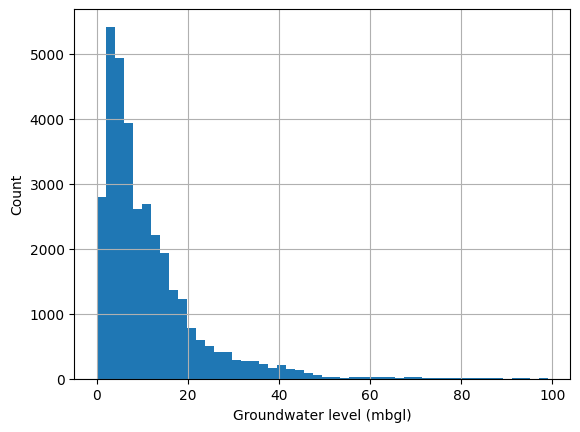

In [75]:
print(merged_df['gw_level'].describe())
import matplotlib.pyplot as plt
merged_df['gw_level'].hist(bins=50)
plt.xlabel("Groundwater level (mbgl)")
plt.ylabel("Count")
plt.show()


count    34036.000000
mean        24.983835
std         27.483788
min          0.000000
25%          3.929688
50%         15.621094
75%         38.029297
max        189.531250
Name: rainfall, dtype: float64


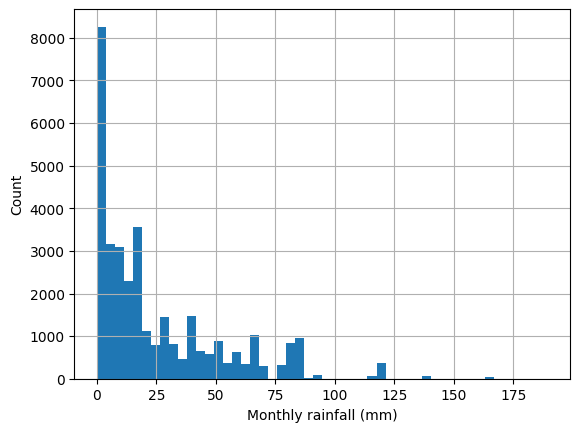

In [76]:
print(merged_df['rainfall'].describe())
merged_df['rainfall'].hist(bins=50)
plt.xlabel("Monthly rainfall (mm)")
plt.ylabel("Count")
plt.show()


In [77]:
well_counts = merged_df.groupby('VILLAGE')['date'].count()
print(well_counts.describe())


count    1237.000000
mean       27.514956
std        30.011149
min         1.000000
25%         7.000000
50%        10.000000
75%        45.000000
max       166.000000
Name: date, dtype: float64


In [78]:
print(merged_df.groupby('BLOCK')[['lat','lon']].nunique())


           lat  lon
BLOCK              
Adampur     10    9
Agroha       5    5
Alewa        7    7
Ambala-I    24   26
Ambala-Ii    6    6
...        ...  ...
Tohana      10    9
Tosham      22   22
Uchana      12   12
Ujhana      12   12
Uklana       3    3

[141 rows x 2 columns]


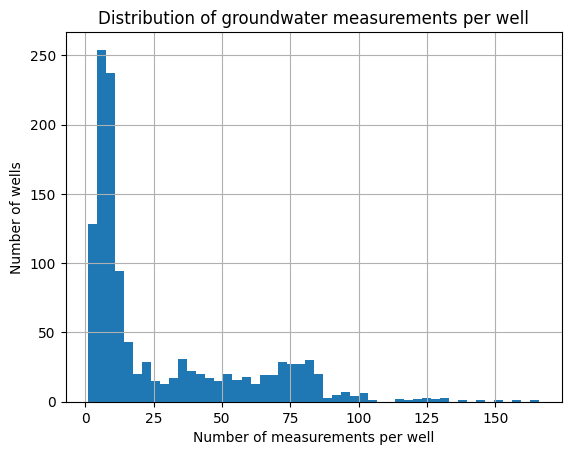

In [79]:
import matplotlib.pyplot as plt

well_counts.hist(bins=50)
plt.xlabel("Number of measurements per well")
plt.ylabel("Number of wells")
plt.title("Distribution of groundwater measurements per well")
plt.show()


In [80]:
# Very sparse wells
print(merged_df.groupby('VILLAGE')['date'].count()[lambda x: x < 5])

# Very dense wells
print(merged_df.groupby('VILLAGE')['date'].count()[lambda x: x > 100])


VILLAGE
Amarpur          3
Anangpur         4
Anchla           4
Asadpur          2
Asandh           2
                ..
Surpara Kalan    3
Sutana           1
Talwara          3
Tamsabad         1
Tarkha           4
Name: date, Length: 128, dtype: int64
VILLAGE
Adampur            123
Ambala Cantt       102
Barwala            166
Bawal              130
Dadri              129
Gurera             103
Indri              106
Jamal              101
Jhajjar            131
Kalanaur           125
Kathura            119
Kheri              128
Naggal             103
Nuh                125
Pali               144
Palwal             131
Pundri             120
Sadhaura           151
Safidon            115
Sampla             139
Saraswati Nagar    125
Tosham             158
Wazirpur           115
Name: date, dtype: int64


In [81]:
merged_df_clean = merged_df.groupby(
    ['STATE_UT','DISTRICT','BLOCK','VILLAGE','lat','lon','date','year','month','rain_lat','rain_lon'],
    as_index=False
).agg({
    'gw_level': 'mean',   # Average groundwater levels if duplicates exist
    'rainfall': 'mean'    # Average rainfall if duplicates exist
})


In [82]:
print("Number of duplicates after cleaning:", merged_df_clean.duplicated(subset=['lat','lon','date']).sum())


Number of duplicates after cleaning: 190


In [83]:
# Count how many rows have rainfall equal to 0
zero_rain_count = (merged_df['rainfall'] == 0).sum()
total_rows = len(merged_df)

print(f"Rows with 0 rainfall: {zero_rain_count} / {total_rows}")
print(f"Percentage: {zero_rain_count / total_rows * 100:.2f}%")


Rows with 0 rainfall: 3735 / 34036
Percentage: 10.97%


In [84]:
# First, fill NaN rainfall with 0 (if no rain recorded)
merged_df['rainfall'] = merged_df['rainfall'].fillna(0)

# Then handle duplicates
merged_df_clean = merged_df.groupby(
    ['lat','lon','date'], as_index=False
).agg({
    'gw_level': 'mean',        # Average groundwater level
    'rainfall': 'max',         # Keep max rainfall (0 stays 0, if all duplicates are 0)
    'VILLAGE': 'first',        # Keep first VILLAGE name
    'BLOCK': 'first',
    'DISTRICT': 'first',
    'rain_lat': 'first',
    'rain_lon': 'first',
    'year': 'first',
    'month': 'first'
})

# Verify duplicates are gone
print("Duplicates remaining:", merged_df_clean.duplicated(subset=['lat','lon','date']).sum())


Duplicates remaining: 0


In [90]:
village_name = "Ambala"

count_original = haryana_gw_df[haryana_gw_df['DISTRICT'] == village_name].shape[0]
print(f"Rows for {village_name} in original groundwater df: {count_original}")


Rows for Ambala in original groundwater df: 1701


In [86]:
df_df = pd.read_csv("data/groundwater.csv")
df_df

,STATE_UT,DISTRICT,BLOCK,VILLAGE,LATITUDE,LONGITUDE,Date,WL (in mbgl)
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.76250,01-01-2024,1.7
1,Haryana,Ambala,Ambala-I,Jandheri,30.09333,76.61028,01-01-2024,43.9
2,Haryana,Ambala,Ambala-I,Kakru,30.40833,76.78750,01-01-2024,0.8
3,Haryana,Ambala,Ambala-I,Pinjola,30.26250,76.61389,01-01-2024,4.9
4,Haryana,Ambala,Ambala-Ii,Balana,30.32083,76.72917,01-01-2024,0.8
...,...,...,...,...,...,...,...,...
45092,Haryana,Yamunanagar,Saraswati Nagar,Saraswati Nagar,30.19583,77.14583,01-05-1996,6.1
45093,Haryana,Yamunanagar,Saraswati Nagar,Saraswati Nagar,30.19583,77.14583,01-05-1995,7.3
45094,Haryana,Yamunanagar,Saraswati Nagar,Saraswati Nagar,30.19583,77.14583,01-05-1994,7.8
45095,Haryana,Yamunanagar,Saraswati Nagar,Tala Kaur,30.24167,77.20417,01-05-1996,6.9


In [91]:
count = df_df[df_df['DISTRICT'] == village_name].shape[0]
print(f"Rows for {village_name} in original groundwater df: {count}")

Rows for Ambala in original groundwater df: 2202


In [88]:
df_df.shape

(45097, 8)

In [89]:
merged_df.shape

(34036, 13)

In [12]:
import pandas as pd
import numpy as np

In [6]:
gw_rf_with_lags = pd.read_csv("groundwater_with_rainfall_lags.csv")

In [7]:
gw_rf_with_temp = pd.read_csv("groundwater_weather_merged.csv")
gw_rf_with_temp.head()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,LATITUDE,LONGITUDE,date,WL (in mbgl),rainfall,month,...,rainfall_lag_4,rainfall_lag_5,rainfall_lag_6,lag_3month_avg,lag_3month_sum,lag_6month_avg,lag_6month_sum,tmin,tmax,year
0,Haryana,Ambala,Ambala-I,Barakhuda,30.32778,76.90000,1994-01-01,9.3,0.0,1,...,0.828125,2.78125,0.15625,0.0,0.0,0.627604,3.765625,7.63,22.58,1994
1,Haryana,Ambala,Ambala-I,Kakru,30.40833,76.78750,1994-01-01,6.8,0.0,1,...,0.828125,2.78125,0.15625,0.0,0.0,0.627604,3.765625,7.63,22.58,1994
2,Haryana,Ambala,Ambala-I,Mahmodpur,30.40000,76.72500,1994-01-01,5.5,0.0,1,...,0.828125,2.78125,0.15625,0.0,0.0,0.627604,3.765625,7.63,22.58,1994
3,Haryana,Ambala,Ambala-I,Mohra,30.27083,76.85833,1994-01-01,4.5,0.0,1,...,0.828125,2.78125,0.15625,0.0,0.0,0.627604,3.765625,7.63,22.58,1994
4,Haryana,Ambala,Ambala-I,Nagal,30.23889,76.71389,1994-01-01,3.4,0.0,1,...,0.828125,2.78125,0.15625,0.0,0.0,0.627604,3.765625,7.63,22.58,1994


In [45]:
import xarray as xr
import pandas as pd
import numpy as np
import glob
import os

def combine_imdaa_files_to_csv(data_directory, output_file='imdaa_combined_temperature.csv'):
    """
    Combine all IMDAA temperature NetCDF files into one CSV
    """
    print("COMBINING ALL IMDAA TEMPERATURE FILES TO CSV")
    print("="*50)
    
    # Find all NetCDF files
    file_pattern = os.path.join(data_directory, "IMDAA_TMP_prl_1.08_*.nc")
    nc_files = sorted(glob.glob(file_pattern))
    
    print(f"Found {len(nc_files)} files to process")
    
    all_data = []
    
    for i, file_path in enumerate(nc_files):
        year = os.path.basename(file_path).split('_')[-1].replace('.nc', '')
        print(f"Processing {year} ({i+1}/{len(nc_files)})")
        
        try:
            # Load NetCDF file
            ds = xr.open_dataset(file_path)
            
            # Get surface level (highest pressure = surface)
            surface_level_idx = ds.plevel.values.argmax()
            surface_pressure = ds.plevel.values[surface_level_idx]
            
            # Extract surface temperature
            surface_temp = ds.TMP_prl.isel(plevel=surface_level_idx)
            
            # Convert to daily aggregations first
            daily_tmax = surface_temp.resample(time='1D').max()
            daily_tmin = surface_temp.resample(time='1D').min()
            daily_tmean = surface_temp.resample(time='1D').mean()
            
            # Then to monthly aggregations
            monthly_tmax = daily_tmax.resample(time='1M').max()
            monthly_tmin = daily_tmin.resample(time='1M').min()
            monthly_tmean = daily_tmean.resample(time='1M').mean()
            
            # Convert to DataFrame format
            for time_idx, time_val in enumerate(monthly_tmax.time.values):
                date = pd.to_datetime(time_val)
                
                for lat_idx, lat in enumerate(ds.latitude.values):
                    for lon_idx, lon in enumerate(ds.longitude.values):
                        
                        tmax_val = float(monthly_tmax.isel(time=time_idx, latitude=lat_idx, longitude=lon_idx).values)
                        tmin_val = float(monthly_tmin.isel(time=time_idx, latitude=lat_idx, longitude=lon_idx).values)
                        tmean_val = float(monthly_tmean.isel(time=time_idx, latitude=lat_idx, longitude=lon_idx).values)
                        
                        all_data.append({
                            'time': date,
                            'year': date.year,
                            'month': date.month,
                            'month_period': date.strftime('%Y-%m'),
                            'latitude': lat,
                            'longitude': lon,
                            'tmax_K': tmax_val,
                            'tmin_K': tmin_val,
                            'tmean_K': tmean_val,
                            'surface_pressure_hPa': surface_pressure
                        })
            
            ds.close()
            
        except Exception as e:
            print(f"Error processing {year}: {e}")
    
    # Convert to DataFrame
    print("Converting to DataFrame...")
    combined_df = pd.DataFrame(all_data)
    
    # Sort by time and location
    combined_df = combined_df.sort_values(['time', 'latitude', 'longitude']).reset_index(drop=True)
    
    # Save to CSV
    print(f"Saving to {output_file}...")
    combined_df.to_csv(output_file, index=False)
    
    print(f"COMBINATION COMPLETE!")
    print(f"Final dataset shape: {combined_df.shape}")
    print(f"Time range: {combined_df['time'].min()} to {combined_df['time'].max()}")
    print(f"Unique coordinates: {len(combined_df[['latitude', 'longitude']].drop_duplicates())}")
    print(f"Temperature ranges:")
    print(f"  Tmax: {combined_df['tmax_K'].min():.1f}K to {combined_df['tmax_K'].max():.1f}K")
    print(f"  Tmin: {combined_df['tmin_K'].min():.1f}K to {combined_df['tmin_K'].max():.1f}K")
    print(f"  Tmean: {combined_df['tmean_K'].min():.1f}K to {combined_df['tmean_K'].max():.1f}K")
    
    return combined_df

# Run the combination
data_directory = "data/Atmospheric_variable/IMDAA_TMP_prl_1.08_1990_2020"
imdaa_combined = combine_imdaa_files_to_csv(data_directory)

print("\nStep 1 complete: All IMDAA files combined into CSV")
print("Next step will be: Extract temperature at well locations")

COMBINING ALL IMDAA TEMPERATURE FILES TO CSV
Found 31 files to process
Processing 1990 (1/31)
Processing 1991 (2/31)
Processing 1992 (3/31)
Processing 1993 (4/31)
Processing 1994 (5/31)
Processing 1995 (6/31)
Processing 1996 (7/31)
Processing 1997 (8/31)
Processing 1998 (9/31)
Processing 1999 (10/31)
Processing 2000 (11/31)
Processing 2001 (12/31)
Processing 2002 (13/31)
Processing 2003 (14/31)
Processing 2004 (15/31)
Processing 2005 (16/31)
Processing 2006 (17/31)
Processing 2007 (18/31)
Processing 2008 (19/31)
Processing 2009 (20/31)
Processing 2010 (21/31)
Processing 2011 (22/31)
Processing 2012 (23/31)
Processing 2013 (24/31)
Processing 2014 (25/31)
Processing 2015 (26/31)
Processing 2016 (27/31)
Processing 2017 (28/31)
Processing 2018 (29/31)
Processing 2019 (30/31)
Processing 2020 (31/31)
Converting to DataFrame...
Saving to imdaa_combined_temperature.csv...
COMBINATION COMPLETE!
Final dataset shape: (380928, 10)
Time range: 1990-01-31 00:00:00 to 2020-12-31 00:00:00
Unique coord

In [46]:
# Step 2: Extract temperature at well locations from the combined CSV
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

def extract_temperature_at_wells(imdaa_csv_file, gw_df):
    """
    Extract temperature data at well locations from combined IMDAA CSV
    """
    print("EXTRACTING TEMPERATURE AT WELL LOCATIONS")
    print("="*45)
    
    # Load the combined IMDAA data
    print("Loading combined IMDAA temperature data...")
    imdaa_data = pd.read_csv(imdaa_csv_file)
    print(f"IMDAA data shape: {imdaa_data.shape}")
    print(f"Time range: {imdaa_data['time'].min()} to {imdaa_data['time'].max()}")
    
    # Get unique well locations
    well_locations = gw_df[['LATITUDE', 'LONGITUDE']].drop_duplicates()
    print(f"Unique well locations: {len(well_locations)}")
    
    # Get unique IMDAA grid points
    imdaa_coords = imdaa_data[['latitude', 'longitude']].drop_duplicates()
    print(f"IMDAA grid points: {len(imdaa_coords)}")
    
    # Spatial matching: find nearest IMDAA grid for each well
    print("Finding nearest IMDAA grid points for wells...")
    
    imdaa_points = imdaa_coords[['latitude', 'longitude']].values
    well_points = well_locations[['LATITUDE', 'LONGITUDE']].values
    
    tree = cKDTree(imdaa_points)
    distances, indices = tree.query(well_points)
    
    print(f"Average distance to nearest grid: {distances.mean():.3f}° ({distances.mean()*111:.1f} km)")
    
    # Create mapping of wells to nearest IMDAA grids
    well_to_grid_mapping = []
    
    for i, (_, well) in enumerate(well_locations.iterrows()):
        nearest_grid = imdaa_coords.iloc[indices[i]]
        
        well_to_grid_mapping.append({
            'well_lat': well['LATITUDE'],
            'well_lon': well['LONGITUDE'],
            'imdaa_lat': nearest_grid['latitude'],
            'imdaa_lon': nearest_grid['longitude'],
            'distance_km': distances[i] * 111
        })
    
    mapping_df = pd.DataFrame(well_to_grid_mapping)
    
    # Extract temperature time series for each well location
    print("Extracting temperature time series...")
    
    well_temperature_data = []
    
    for _, mapping in mapping_df.iterrows():
        # Get all temperature data for this IMDAA grid point
        temp_series = imdaa_data[
            (imdaa_data['latitude'] == mapping['imdaa_lat']) &
            (imdaa_data['longitude'] == mapping['imdaa_lon'])
        ].copy()
        
        # Add well coordinates
        temp_series['well_lat'] = mapping['well_lat']
        temp_series['well_lon'] = mapping['well_lon']
        temp_series['distance_km'] = mapping['distance_km']
        
        well_temperature_data.append(temp_series)
    
    # Combine all temperature data
    all_temp_data = pd.concat(well_temperature_data, ignore_index=True)
    
    print(f"Extracted temperature data shape: {all_temp_data.shape}")
    print(f"Time coverage: {all_temp_data['time'].min()} to {all_temp_data['time'].max()}")
    
    # Save the extracted temperature data
    all_temp_data.to_csv('temperature_at_well_locations.csv', index=False)
    
    print("Temperature extraction complete!")
    print("Saved to: temperature_at_well_locations.csv")
    
    return all_temp_data, mapping_df

# Extract temperature at your well locations
temp_at_wells, well_mapping = extract_temperature_at_wells(
    'imdaa_combined_temperature.csv',  # The CSV from step 1
    gw_rf_with_lags  # Your groundwater dataset
)

print("\nStep 2 complete: Temperature extracted at well locations")
print("Next step will be: Create temperature lag features")

EXTRACTING TEMPERATURE AT WELL LOCATIONS
Loading combined IMDAA temperature data...
IMDAA data shape: (380928, 10)
Time range: 1990-01-31 to 2020-12-31
Unique well locations: 1352
IMDAA grid points: 1024
Finding nearest IMDAA grid points for wells...
Average distance to nearest grid: 0.388° (43.0 km)
Extracting temperature time series...
Extracted temperature data shape: (502944, 13)
Time coverage: 1990-01-31 to 2020-12-31
Temperature extraction complete!
Saved to: temperature_at_well_locations.csv

Step 2 complete: Temperature extracted at well locations
Next step will be: Create temperature lag features


In [47]:
# Extract temperature at pressure levels relevant for groundwater prediction
import pandas as pd
import numpy as np
import xarray as xr
import glob

def extract_groundwater_relevant_temperature_levels(data_directory, gw_df):
    """
    Extract temperature at pressure levels most relevant for groundwater processes
    """
    print("EXTRACTING TEMPERATURE AT GROUNDWATER-RELEVANT PRESSURE LEVELS")
    print("="*65)
    
    # Pressure levels chosen for groundwater relevance:
    target_pressures = {
        1000: "Surface",           # Direct surface temperature affecting evapotranspiration
        925: "Boundary Layer",     # Lower atmosphere - affects local weather patterns
        850: "Free Atmosphere",    # Mid-level - affects regional precipitation patterns
        700: "Mid Troposphere"     # Upper level - affects large-scale weather systems
    }
    
    print("Pressure levels selected for groundwater modeling:")
    for pressure, description in target_pressures.items():
        print(f"  {pressure} hPa: {description}")
    
    # Load sample file to check available pressure levels
    nc_files = sorted(glob.glob(f"{data_directory}/IMDAA_TMP_prl_1.08_*.nc"))
    ds_sample = xr.open_dataset(nc_files[0])
    available_pressures = ds_sample.plevel.values
    
    print(f"\nAvailable pressure levels: {available_pressures}")
    
    # Map target pressures to available ones
    pressure_mapping = {}
    for target_p in target_pressures.keys():
        closest_idx = np.argmin(np.abs(available_pressures - target_p))
        actual_p = available_pressures[closest_idx]
        pressure_mapping[target_p] = {
            'index': closest_idx,
            'actual_pressure': actual_p,
            'description': target_pressures[target_p]
        }
        print(f"  Target {target_p} hPa -> Using {actual_p} hPa (index {closest_idx})")
    
    ds_sample.close()
    
    # Get well locations
    well_locations = gw_df[['LATITUDE', 'LONGITUDE']].drop_duplicates()
    print(f"\nExtracting for {len(well_locations)} well locations")
    
    # Extract multi-level temperature data
    all_temp_data = []
    
    # Process years 1994-2020 (your GW data range)
    relevant_years = range(1994, 2021)
    
    for year in relevant_years:
        file_path = f"{data_directory}/IMDAA_TMP_prl_1.08_{year}.nc"
        print(f"Processing {year}...")
        
        try:
            ds = xr.open_dataset(file_path)
            
            # Process each pressure level
            for target_p, mapping in pressure_mapping.items():
                pressure_idx = mapping['index']
                actual_pressure = mapping['actual_pressure']
                level_name = mapping['description'].lower().replace(' ', '_')
                
                # Extract temperature at this pressure level
                temp_data = ds.TMP_prl.isel(plevel=pressure_idx)
                
                # Monthly aggregation
                monthly_tmax = temp_data.resample(time='1M').max()
                monthly_tmin = temp_data.resample(time='1M').min() 
                monthly_tmean = temp_data.resample(time='1M').mean()
                
                # Extract at each well location
                for _, well in well_locations.iterrows():
                    well_lat = well['LATITUDE']
                    well_lon = well['LONGITUDE']
                    
                    # Spatial interpolation to well location
                    tmax_series = monthly_tmax.sel(latitude=well_lat, longitude=well_lon, method='nearest')
                    tmin_series = monthly_tmin.sel(latitude=well_lat, longitude=well_lon, method='nearest')
                    tmean_series = monthly_tmean.sel(latitude=well_lat, longitude=well_lon, method='nearest')
                    
                    # Store monthly data
                    for time_idx, time_val in enumerate(tmax_series.time.values):
                        date = pd.to_datetime(time_val)
                        
                        all_temp_data.append({
                            'time': date,
                            'year': date.year,
                            'month': date.month,
                            'month_period': date.strftime('%Y-%m'),
                            'well_lat': well_lat,
                            'well_lon': well_lon,
                            'pressure_level': level_name,
                            'pressure_hPa': actual_pressure,
                            f'tmax_{level_name}_K': float(tmax_series.isel(time=time_idx).values),
                            f'tmin_{level_name}_K': float(tmin_series.isel(time=time_idx).values),
                            f'tmean_{level_name}_K': float(tmean_series.isel(time=time_idx).values)
                        })
            
            ds.close()
            
        except Exception as e:
            print(f"Error processing {year}: {e}")
    
    # Convert to DataFrame
    multi_level_df = pd.DataFrame(all_temp_data)
    
    # Pivot to have all pressure levels as columns for each location/time
    pivot_df = multi_level_df.pivot_table(
        index=['time', 'month_period', 'well_lat', 'well_lon'],
        columns='pressure_level',
        values=['tmax_surface_K', 'tmin_surface_K', 'tmean_surface_K', 
                'tmax_boundary_layer_K', 'tmin_boundary_layer_K', 'tmean_boundary_layer_K',
                'tmax_free_atmosphere_K', 'tmin_free_atmosphere_K', 'tmean_free_atmosphere_K',
                'tmax_mid_troposphere_K', 'tmin_mid_troposphere_K', 'tmean_mid_troposphere_K']
    ).reset_index()
    
    # Flatten column names
    pivot_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in pivot_df.columns.values]
    
    print(f"\nMulti-level temperature extraction complete!")
    print(f"Final shape: {pivot_df.shape}")
    print(f"Time range: {pivot_df['time'].min()} to {pivot_df['time'].max()}")
    
    # Save the data
    pivot_df.to_csv('groundwater_relevant_temperature_levels.csv', index=False)
    
    return pivot_df

# Extract temperature at groundwater-relevant pressure levels
multi_level_temp = extract_groundwater_relevant_temperature_levels(
    "data/Atmospheric_variable/IMDAA_TMP_prl_1.08_1990_2020",
    gw_rf_with_lags
)

print("Temperature extraction at multiple levels complete!")
print("This gives you temperature data at 4 atmospheric levels relevant for groundwater processes.")

EXTRACTING TEMPERATURE AT GROUNDWATER-RELEVANT PRESSURE LEVELS
Pressure levels selected for groundwater modeling:
  1000 hPa: Surface
  925 hPa: Boundary Layer
  850 hPa: Free Atmosphere
  700 hPa: Mid Troposphere

Available pressure levels: [  50.  100.  150.  200.  250.  300.  400.  500.  600.  750.  850.  925.
 1000.]
  Target 1000 hPa -> Using 1000.0 hPa (index 12)
  Target 925 hPa -> Using 925.0 hPa (index 11)
  Target 850 hPa -> Using 850.0 hPa (index 10)
  Target 700 hPa -> Using 750.0 hPa (index 9)

Extracting for 1352 well locations
Processing 1994...
Processing 1995...
Processing 1996...
Processing 1997...
Processing 1998...
Processing 1999...
Processing 2000...
Processing 2001...
Processing 2002...
Processing 2003...
Processing 2004...
Processing 2005...
Processing 2006...
Processing 2007...
Processing 2008...
Processing 2009...
Processing 2010...
Processing 2011...
Processing 2012...
Processing 2013...
Processing 2014...
Processing 2015...
Processing 2016...
Processing 2017

In [50]:
# Fixed lag creation with correct column names
def create_temperature_lags_correctly_fixed(temp_csv_file, max_lag_months=6):
    """
    Create temperature lag features with correct column names
    """
    print("CREATING TEMPERATURE LAGS WITH CORRECT COLUMN NAMES")
    print("="*50)
    
    # Load temperature data
    temp_data = pd.read_csv(temp_csv_file)
    print(f"Temperature data shape: {temp_data.shape}")
    
    temp_data['time_dt'] = pd.to_datetime(temp_data['time'])
    temp_data = temp_data.sort_values(['well_lat', 'well_lon', 'time_dt'])
    
    # Get the actual temperature columns (they have double suffixes)
    temp_columns = [
        'tmax_surface_K_surface',
        'tmax_boundary_layer_K_boundary_layer', 
        'tmax_free_atmosphere_K_free_atmosphere',
        'tmax_mid_troposphere_K_mid_troposphere',
        'tmin_surface_K_surface',
        'tmin_boundary_layer_K_boundary_layer',
        'tmin_free_atmosphere_K_free_atmosphere', 
        'tmin_mid_troposphere_K_mid_troposphere',
        'tmean_surface_K_surface',
        'tmean_boundary_layer_K_boundary_layer',
        'tmean_free_atmosphere_K_free_atmosphere',
        'tmean_mid_troposphere_K_mid_troposphere'
    ]
    
    print(f"Temperature variables to create lags for: {len(temp_columns)}")
    
    # Create lag features
    print("Creating lag features...")
    
    for temp_var in temp_columns:
        print(f"  Processing {temp_var}...")
        
        # Create current (lag 0)
        temp_data[f'{temp_var}_current'] = temp_data[temp_var]
        
        # Create lags 1-6
        for lag in range(1, max_lag_months + 1):
            col_name = f'{temp_var}_lag_{lag}'
            temp_data[col_name] = temp_data.groupby(['well_lat', 'well_lon'])[temp_var].shift(lag)
    
    # Check coverage for sample columns
    print("\nLag coverage check:")
    sample_cols = ['tmax_surface_K_surface_lag_1', 'tmax_surface_K_surface_lag_2', 'tmax_surface_K_surface_lag_3']
    
    for col in sample_cols:
        if col in temp_data.columns:
            coverage = temp_data[col].notna().sum()
            print(f"  {col}: {coverage:,}/{len(temp_data):,} ({coverage/len(temp_data)*100:.1f}%)")
    
    print(f"\nTemperature lag creation complete!")
    print(f"Dataset shape: {temp_data.shape}")
    
    return temp_data

def merge_correct_temperature_lags(gw_df, temp_with_lags):
    """
    Merge the correctly created temperature lags with groundwater data
    """
    print("\nMERGING TEMPERATURE LAGS WITH GROUNDWATER")
    print("="*45)
    
    # Prepare groundwater data
    result_df = gw_df.copy()
    result_df['date_dt'] = pd.to_datetime(result_df['date'])
    result_df['month_period'] = result_df['date_dt'].dt.to_period('M').astype(str)
    
    # Round coordinates for matching
    result_df['lat_round'] = result_df['LATITUDE'].round(4)
    result_df['lon_round'] = result_df['LONGITUDE'].round(4)
    temp_with_lags['lat_round'] = temp_with_lags['well_lat'].round(4)
    temp_with_lags['lon_round'] = temp_with_lags['well_lon'].round(4)
    
    # Get all lag columns (current and lag_1 through lag_6)
    lag_columns = [col for col in temp_with_lags.columns if ('_current' in col or '_lag_' in col) and col.endswith(('_current', '_lag_1', '_lag_2', '_lag_3', '_lag_4', '_lag_5', '_lag_6'))]
    
    print(f"Merging {len(lag_columns)} temperature lag features")
    
    # Merge on location and time
    merged = result_df.merge(
        temp_with_lags[['lat_round', 'lon_round', 'month_period'] + lag_columns],
        on=['lat_round', 'lon_round', 'month_period'],
        how='left'
    )
    
    # Clean up temporary columns
    merged = merged.drop(['date_dt', 'month_period', 'lat_round', 'lon_round'], axis=1)
    
    # Check final results
    print(f"\nMerge complete!")
    print(f"Final dataset shape: {merged.shape}")
    
    # Check coverage of key lag features
    key_features = [
        'tmax_surface_K_surface_current',
        'tmax_surface_K_surface_lag_1',
        'tmax_surface_K_surface_lag_2', 
        'tmax_boundary_layer_K_boundary_layer_lag_1'
    ]
    
    print("Key feature coverage:")
    for feature in key_features:
        if feature in merged.columns:
            coverage = merged[feature].notna().sum()
            print(f"  {feature}: {coverage:,}/{len(merged):,} ({coverage/len(merged)*100:.1f}%)")
    
    return merged

# Execute the corrected approach
print("Creating temperature lags correctly...")
temp_with_lags = create_temperature_lags_correctly_fixed('groundwater_relevant_temperature_levels.csv')

print("\nMerging with groundwater data...")
final_dataset_corrected = merge_correct_temperature_lags(gw_rf_with_lags, temp_with_lags)

# Save the final corrected dataset
final_dataset_corrected.to_csv('groundwater_final_with_multilevel_temp_lags.csv', index=False)

print(f"\nFINAL DATASET READY!")
print(f"Saved as: groundwater_final_with_multilevel_temp_lags.csv")
print(f"You now have:")
print(f"- Rainfall lag features")
print(f"- Multi-level temperature lag features (surface, boundary layer, free atmosphere, mid-troposphere)")
print(f"- All properly aligned with your 5-month groundwater measurements")

Creating temperature lags correctly...
CREATING TEMPERATURE LAGS WITH CORRECT COLUMN NAMES
Temperature data shape: (438048, 16)
Temperature variables to create lags for: 12
Creating lag features...
  Processing tmax_surface_K_surface...
  Processing tmax_boundary_layer_K_boundary_layer...
  Processing tmax_free_atmosphere_K_free_atmosphere...
  Processing tmax_mid_troposphere_K_mid_troposphere...
  Processing tmin_surface_K_surface...
  Processing tmin_boundary_layer_K_boundary_layer...
  Processing tmin_free_atmosphere_K_free_atmosphere...
  Processing tmin_mid_troposphere_K_mid_troposphere...
  Processing tmean_surface_K_surface...
  Processing tmean_boundary_layer_K_boundary_layer...
  Processing tmean_free_atmosphere_K_free_atmosphere...
  Processing tmean_mid_troposphere_K_mid_troposphere...

Lag coverage check:
  tmax_surface_K_surface_lag_1: 436,696/438,048 (99.7%)
  tmax_surface_K_surface_lag_2: 435,344/438,048 (99.4%)
  tmax_surface_K_surface_lag_3: 433,992/438,048 (99.1%)

Te

In [51]:
# Check the final dataset for issues
def check_final_dataset_quality(csv_file):
    """
    Check the final dataset for any data quality issues
    """
    print("CHECKING FINAL DATASET QUALITY")
    print("="*35)
    
    # Load dataset
    df = pd.read_csv(csv_file)
    print(f"Dataset shape: {df.shape}")
    
    # 1. Check for missing values
    print("\n1. MISSING VALUES CHECK:")
    missing_cols = df.isnull().sum()
    problematic_cols = missing_cols[missing_cols > 0].sort_values(ascending=False)
    
    if len(problematic_cols) == 0:
        print("   No missing values found!")
    else:
        print(f"   Columns with missing values:")
        for col, missing_count in problematic_cols.head(10).items():
            percentage = (missing_count / len(df)) * 100
            print(f"     {col}: {missing_count:,}/{len(df):,} ({percentage:.1f}%)")
    
    # 2. Check temperature lag coverage
    print("\n2. TEMPERATURE LAG COVERAGE:")
    temp_lag_cols = [col for col in df.columns if '_lag_' in col and 'surface' in col][:6]
    
    for col in temp_lag_cols:
        coverage = df[col].notna().sum()
        percentage = (coverage / len(df)) * 100
        print(f"   {col}: {coverage:,}/{len(df):,} ({percentage:.1f}%)")
    
    # 3. Check temperature value ranges
    print("\n3. TEMPERATURE VALUE RANGES:")
    temp_current_cols = [col for col in df.columns if '_current' in col and 'surface' in col][:3]
    
    for col in temp_current_cols:
        if col in df.columns:
            temp_min = df[col].min()
            temp_max = df[col].max()
            temp_mean = df[col].mean()
            
            # Convert to Celsius if in Kelvin
            if temp_min > 200:  # Likely Kelvin
                temp_min_c = temp_min - 273.15
                temp_max_c = temp_max - 273.15
                temp_mean_c = temp_mean - 273.15
                print(f"   {col}: {temp_min:.1f}K to {temp_max:.1f}K ({temp_min_c:.1f}°C to {temp_max_c:.1f}°C)")
            else:
                print(f"   {col}: {temp_min:.1f}°C to {temp_max:.1f}°C")
    
    # 4. Check rainfall features
    print("\n4. RAINFALL FEATURE CHECK:")
    rainfall_cols = [col for col in df.columns if 'rainfall_lag_' in col]
    print(f"   Rainfall lag features: {len(rainfall_cols)}")
    
    for col in rainfall_cols[:3]:
        coverage = df[col].notna().sum()
        percentage = (coverage / len(df)) * 100
        mean_val = df[col].mean()
        print(f"   {col}: {percentage:.1f}% coverage, mean: {mean_val:.3f}")
    
    # 5. Check date coverage
    print("\n5. DATE AND LOCATION CHECK:")
    df['date_temp'] = pd.to_datetime(df['date'])
    print(f"   Date range: {df['date_temp'].min().date()} to {df['date_temp'].max().date()}")
    print(f"   Unique districts: {df['DISTRICT'].nunique()}")
    print(f"   Unique locations: {len(df[['LATITUDE', 'LONGITUDE']].drop_duplicates())}")
    
    # 6. Check month distribution
    month_counts = df['date_temp'].dt.month.value_counts().sort_index()
    month_names = {1:'Jan', 4:'Apr', 5:'May', 8:'Aug', 11:'Nov'}
    print(f"   Month distribution:")
    for month, count in month_counts.items():
        month_name = month_names.get(month, f'Month {month}')
        print(f"     {month_name}: {count:,} records")
    
    df.drop('date_temp', axis=1, inplace=True)
    
    # 7. Sample data inspection
    print("\n6. SAMPLE DATA:")
    sample_cols = ['DISTRICT', 'date', 'WL (in mbgl)', 'rainfall_lag_4', 'tmax_surface_K_surface_current', 'tmax_surface_K_surface_lag_1']
    available_cols = [col for col in sample_cols if col in df.columns]
    print(df[available_cols].head(3))
    
    return df

# Check the final dataset
final_df = check_final_dataset_quality('groundwater_final_with_multilevel_temp_lags.csv')

print("\nDATASET QUALITY CHECK COMPLETE!")
print("Ready to proceed with modeling if no major issues found.")

CHECKING FINAL DATASET QUALITY
Dataset shape: (31517, 108)

1. MISSING VALUES CHECK:
   Columns with missing values:
     tmax_surface_K_surface_lag_6: 747/31,517 (2.4%)
     tmax_surface_K_surface_lag_5: 747/31,517 (2.4%)
     tmax_mid_troposphere_K_mid_troposphere_lag_5: 747/31,517 (2.4%)
     tmax_mid_troposphere_K_mid_troposphere_lag_6: 747/31,517 (2.4%)
     tmax_free_atmosphere_K_free_atmosphere_lag_5: 747/31,517 (2.4%)
     tmax_free_atmosphere_K_free_atmosphere_lag_6: 747/31,517 (2.4%)
     tmax_boundary_layer_K_boundary_layer_lag_5: 747/31,517 (2.4%)
     tmax_boundary_layer_K_boundary_layer_lag_6: 747/31,517 (2.4%)
     tmean_boundary_layer_K_boundary_layer_lag_6: 747/31,517 (2.4%)
     tmean_boundary_layer_K_boundary_layer_lag_5: 747/31,517 (2.4%)

2. TEMPERATURE LAG COVERAGE:
   tmax_surface_K_surface_lag_1: 31,125/31,517 (98.8%)
   tmax_surface_K_surface_lag_2: 31,125/31,517 (98.8%)
   tmax_surface_K_surface_lag_3: 31,125/31,517 (98.8%)
   tmax_surface_K_surface_lag_4: 31,

In [53]:
final_df.head()

,STATE_UT,DISTRICT,BLOCK,VILLAGE,LATITUDE,LONGITUDE,date,WL (in mbgl),rain_lat,rain_lon,...,tmean_free_atmosphere_K_free_atmosphere_lag_4,tmean_free_atmosphere_K_free_atmosphere_lag_5,tmean_free_atmosphere_K_free_atmosphere_lag_6,tmean_mid_troposphere_K_mid_troposphere_current,tmean_mid_troposphere_K_mid_troposphere_lag_1,tmean_mid_troposphere_K_mid_troposphere_lag_2,tmean_mid_troposphere_K_mid_troposphere_lag_3,tmean_mid_troposphere_K_mid_troposphere_lag_4,tmean_mid_troposphere_K_mid_troposphere_lag_5,tmean_mid_troposphere_K_mid_troposphere_lag_6
0,Haryana,Ambala,Ambala-I,Ambala Cantt,30.38333,76.76250,2020-01-01,1.4,29.88,76.92,...,293.980774,295.395294,296.325836,274.989868,278.693146,281.779846,284.624847,288.835541,289.854065,290.284821
1,Haryana,Ambala,Ambala-I,Jandheri,30.09333,76.61028,2020-01-01,40.0,29.88,76.92,...,293.980774,295.395294,296.325836,274.989868,278.693146,281.779846,284.624847,288.835541,289.854065,290.284821
2,Haryana,Ambala,Ambala-I,Kakru,30.40833,76.78750,2020-01-01,1.0,29.88,76.92,...,293.980774,295.395294,296.325836,274.989868,278.693146,281.779846,284.624847,288.835541,289.854065,290.284821
3,Haryana,Ambala,Ambala-I,Pinjola,30.26250,76.61389,2020-01-01,5.1,29.88,76.92,...,293.980774,295.395294,296.325836,274.989868,278.693146,281.779846,284.624847,288.835541,289.854065,290.284821
4,Haryana,Ambala,Ambala-Ii,Balana,30.32083,76.72917,2020-01-01,0.8,29.88,76.92,...,293.980774,295.395294,296.325836,274.989868,278.693146,281.779846,284.624847,288.835541,289.854065,290.284821


In [55]:
# Simplified station-specific Random Forest with basic working features
def build_simple_station_models(csv_file, min_records=20):
    """
    Build station models using only basic, working features
    """
    print("BUILDING SIMPLIFIED STATION MODELS")
    print("="*35)
    
    # Load dataset
    df = pd.read_csv(csv_file)
    
    # Use only basic working features
    basic_features = [
        # Rainfall lags (these worked well)
        'rainfall_lag_1', 'rainfall_lag_2', 'rainfall_lag_3', 'rainfall_lag_4', 'rainfall_lag_5', 'rainfall_lag_6',
        # Basic surface temperature only (not all the complex multi-level ones)
        'tmax_surface_K_surface_current', 'tmin_surface_K_surface_current', 'tmean_surface_K_surface_current',
        # Maybe 1-3 temperature lags from surface level only
        'tmax_surface_K_surface_lag_1', 'tmax_surface_K_surface_lag_2', 'tmax_surface_K_surface_lag_3',
        'tmin_surface_K_surface_lag_1', 'tmin_surface_K_surface_lag_2'
    ]
    
    # Keep only features that exist in the dataset
    available_features = [f for f in basic_features if f in df.columns]
    target = 'WL (in mbgl)'
    
    print(f"Using {len(available_features)} simple features:")
    rainfall_feats = [f for f in available_features if 'rainfall' in f]
    temp_feats = [f for f in available_features if 'surface' in f]
    print(f"  Rainfall: {len(rainfall_feats)}")
    print(f"  Surface temperature: {len(temp_feats)}")
    
    # Group by station
    station_groups = df.groupby(['DISTRICT', 'VILLAGE'])
    station_results = []
    
    successful_models = 0
    processed_stations = 0
    
    for (district, village), station_data in station_groups:
        processed_stations += 1
        station_id = f"{district}-{village}"
        
        if len(station_data) < min_records:
            continue
            
        # Create model dataset
        model_data = station_data[available_features + [target]].dropna()
        
        if len(model_data) < min_records:
            continue
            
        try:
            X = model_data[available_features]
            y = model_data[target]
            
            # Split data
            test_size = 0.3 if len(model_data) < 50 else 0.25
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
            
            # Simple Random Forest
            rf = RandomForestRegressor(
                n_estimators=50,    # Fewer trees to prevent overfitting
                max_depth=6,        # Shallow trees
                min_samples_split=5,
                min_samples_leaf=3,
                random_state=42
            )
            
            rf.fit(X_train, y_train)
            
            # Predictions
            y_pred_test = rf.predict(X_test)
            y_pred_train = rf.predict(X_train)
            
            test_r2 = r2_score(y_test, y_pred_test)
            train_r2 = r2_score(y_train, y_pred_train)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
            
            # Feature importance
            feature_importance = dict(zip(available_features, rf.feature_importances_))
            top_feature = max(feature_importance.items(), key=lambda x: x[1])
            
            station_results.append({
                'district': district,
                'village': village,
                'station_id': station_id,
                'records': len(model_data),
                'train_r2': train_r2,
                'test_r2': test_r2,
                'test_rmse': test_rmse,
                'top_feature': top_feature[0],
                'top_importance': top_feature[1]
            })
            
            successful_models += 1
            
        except Exception as e:
            continue
    
    results_df = pd.DataFrame(station_results)
    
    print(f"\nSIMPLIFIED MODEL RESULTS:")
    print(f"Successful models: {successful_models}")
    
    if len(results_df) > 0:
        print(f"Average Test R²: {results_df['test_r2'].mean():.4f}")
        print(f"Best Test R²: {results_df['test_r2'].max():.4f}")
        print(f"Models with R² > 0.5: {(results_df['test_r2'] > 0.5).sum()}")
        print(f"Models with R² > 0.3: {(results_df['test_r2'] > 0.3).sum()}")
        
        # Show top performers
        print(f"\nTOP 10 STATIONS:")
        top_10 = results_df.nlargest(10, 'test_r2')
        for _, row in top_10.iterrows():
            feature_short = row['top_feature'].replace('_surface_K_surface', '').replace('rainfall_', 'rain_')
            print(f"  {row['station_id']:<20}: R²={row['test_r2']:.4f} | {feature_short}")
    
    return results_df

# Build simplified models
simple_results = build_simple_station_models('groundwater_final_with_multilevel_temp_lags.csv')

if len(simple_results) > 0:
    simple_results.to_csv('simplified_station_models.csv', index=False)
    
    # Check if results are better
    avg_r2 = simple_results['test_r2'].mean()
    good_models = (simple_results['test_r2'] > 0.3).sum()
    
    print(f"\nSIMPLIFIED MODEL ASSESSMENT:")
    if avg_r2 > 0.2 and good_models > len(simple_results) * 0.3:
        print("Simplified models show better performance!")
    else:
        print("Still having issues. Consider:")
        print("1. Using only rainfall features")
        print("2. District-wise modeling instead of station-wise")
        print("3. Linear regression as baseline")

BUILDING SIMPLIFIED STATION MODELS
Using 14 simple features:
  Rainfall: 6
  Surface temperature: 8

SIMPLIFIED MODEL RESULTS:
Successful models: 455
Average Test R²: -0.3265
Best Test R²: 0.5530
Models with R² > 0.5: 2
Models with R² > 0.3: 15

TOP 10 STATIONS:
  Nuh-Akbarpur        : R²=0.5530 | tmin_lag_2
  Kaithal-Titiana     : R²=0.5126 | rain_lag_2
  Hisar-Hansi         : R²=0.4905 | rain_lag_2
  Jhajjar-Dighal      : R²=0.4784 | tmax_current
  Sonipat-Rohat       : R²=0.4646 | tmin_lag_2
  Nuh-Malab           : R²=0.4251 | tmax_current
  Jind-Ghaso          : R²=0.4022 | rain_lag_2
  Panchkula-Dharampur : R²=0.3999 | tmean_current
  Nuh-Nuh             : R²=0.3834 | tmax_current
  Sonipat-Bhainswal   : R²=0.3782 | tmax_lag_1

SIMPLIFIED MODEL ASSESSMENT:
Still having issues. Consider:
1. Using only rainfall features
2. District-wise modeling instead of station-wise
3. Linear regression as baseline


In [56]:
df_df = pd.read_csv("groundwater_final_with_multilevel_temp_lags.csv")

In [58]:
df_df.isna().sum()

STATE_UT                                           0
DISTRICT                                           0
BLOCK                                              0
VILLAGE                                            0
LATITUDE                                           0
                                                ... 
tmean_mid_troposphere_K_mid_troposphere_lag_2    392
tmean_mid_troposphere_K_mid_troposphere_lag_3    392
tmean_mid_troposphere_K_mid_troposphere_lag_4    392
tmean_mid_troposphere_K_mid_troposphere_lag_5    747
tmean_mid_troposphere_K_mid_troposphere_lag_6    747
Length: 108, dtype: int64

In [60]:
# Filter and keep only reasonably performing station models
def filter_good_performing_stations(results_csv, min_r2_threshold=0.00):
    """
    Filter station models to keep only those with decent performance
    """
    print("FILTERING STATION MODELS BY PERFORMANCE")
    print("="*40)
    
    # Load results
    results_df = pd.read_csv(results_csv)
    print(f"Original models: {len(results_df)}")
    
    # Filter by R² threshold
    good_models = results_df[results_df['test_r2'] >= min_r2_threshold].copy()
    
    print(f"Models with R² ≥ {min_r2_threshold}: {len(good_models)}")
    print(f"Filtered out: {len(results_df) - len(good_models)} poor models")
    print(f"Retention rate: {len(good_models)/len(results_df)*100:.1f}%")
    
    if len(good_models) > 0:
        print(f"\nPERFORMANCE OF RETAINED MODELS:")
        print(f"Average R²: {good_models['test_r2'].mean():.4f}")
        print(f"Best R²: {good_models['test_r2'].max():.4f}")
        print(f"Worst R²: {good_models['test_r2'].min():.4f}")
        
        # Performance distribution of good models
        excellent = (good_models['test_r2'] >= 0.5).sum()
        good = ((good_models['test_r2'] >= 0.3) & (good_models['test_r2'] < 0.5)).sum()
        acceptable = ((good_models['test_r2'] >= 0.0) & (good_models['test_r2'] < 0.3)).sum()
        
        print(f"\nRETAINED MODEL DISTRIBUTION:")
        print(f"Excellent (R² ≥ 0.5): {excellent} models ({excellent/len(good_models)*100:.1f}%)")
        print(f"Good (0.3-0.5): {good} models ({good/len(good_models)*100:.1f}%)")
        print(f"Acceptable (0.1-0.3): {acceptable} models ({acceptable/len(good_models)*100:.1f}%)")
        
        # Show top performing stations
        print(f"\nTOP 10 RETAINED STATIONS:")
        top_stations = good_models.nlargest(10, 'test_r2')
        for _, row in top_stations.iterrows():
            print(f"  {row['station_id']:<20}: R²={row['test_r2']:.4f} | Records={row['records']}")
        
        # Feature analysis for good models
        print(f"\nMOST IMPORTANT FEATURES IN GOOD MODELS:")
        feature_counts = good_models['top_feature'].value_counts().head(8)
        for feature, count in feature_counts.items():
            feature_clean = feature.replace('_surface_K_surface', '').replace('rainfall_', 'rain_')
            percentage = (count / len(good_models)) * 100
            print(f"  {feature_clean:<25}: {count:>2d} stations ({percentage:>4.1f}%)")
    
    return good_models

def create_usable_station_dataset(good_models, original_dataset_csv):
    """
    Create a clean dataset with only the stations that have good models
    """
    print(f"\nCREATING CLEAN DATASET FOR FUTURE USE")
    print("="*40)
    
    # Load original dataset
    df = pd.read_csv(original_dataset_csv)
    
    # Get list of good stations
    good_stations = set(good_models['station_id'])
    print(f"Stations to keep: {len(good_stations)}")
    
    # Filter original dataset
    df['station_id'] = df['DISTRICT'] + '-' + df['VILLAGE']
    clean_df = df[df['station_id'].isin(good_stations)].copy()
    clean_df = clean_df.drop('station_id', axis=1)
    
    print(f"Original dataset: {len(df):,} records")
    print(f"Clean dataset: {len(clean_df):,} records")
    print(f"Records retained: {len(clean_df)/len(df)*100:.1f}%")
    
    # Check coverage
    print(f"\nCLEAN DATASET COVERAGE:")
    print(f"Districts: {clean_df['DISTRICT'].nunique()}")
    print(f"Villages: {clean_df['VILLAGE'].nunique()}")
    
    # Month distribution
    clean_df['month'] = pd.to_datetime(clean_df['date']).dt.month
    month_counts = clean_df['month'].value_counts().sort_index()
    month_names = {1:'Jan', 4:'Apr', 5:'May', 8:'Aug', 11:'Nov'}
    print(f"Month distribution:")
    for month, count in month_counts.items():
        month_name = month_names.get(month, f'Month {month}')
        print(f"  {month_name}: {count:,} records")
    
    clean_df = clean_df.drop('month', axis=1)
    return clean_df

# Filter the station models
if len(simple_results) > 0:
    # Use the simplified results from the previous step
    good_stations = filter_good_performing_stations('simplified_station_models.csv', min_r2_threshold=0.00)
else:
    # Use the complex model results if simplified didn't work
    good_stations = filter_good_performing_stations('station_specific_rf_models.csv', min_r2_threshold=0.00)

# Create clean dataset for future use
if len(good_stations) > 0:
    clean_dataset = create_usable_station_dataset(
        good_stations, 
        'groundwater_final_with_multilevel_temp_lags.csv'
    )
    
    # Save the clean dataset and good models
    clean_dataset.to_csv('groundwater_clean_for_modeling.csv', index=False)
    good_stations.to_csv('good_performing_stations.csv', index=False)
    
    print(f"\nFILES CREATED:")
    print(f"1. groundwater_clean_for_modeling.csv - Clean dataset with only good stations")
    print(f"2. good_performing_stations.csv - List of stations with decent model performance")
    print(f"\nReady for future modeling with {len(good_stations)} reliable stations!")
else:
    print("No stations met the R² ≥ 0.10 threshold. Consider:")
    print("1. Lowering threshold to 0.05")
    print("2. Using district-wise models")
    print("3. Investigating data quality issues")
    

FILTERING STATION MODELS BY PERFORMANCE
Original models: 455
Models with R² ≥ 0.0: 122
Filtered out: 333 poor models
Retention rate: 26.8%

PERFORMANCE OF RETAINED MODELS:
Average R²: 0.1523
Best R²: 0.5530
Worst R²: 0.0034

RETAINED MODEL DISTRIBUTION:
Excellent (R² ≥ 0.5): 2 models (1.6%)
Good (0.3-0.5): 13 models (10.7%)
Acceptable (0.1-0.3): 107 models (87.7%)

TOP 10 RETAINED STATIONS:
  Nuh-Akbarpur        : R²=0.5530 | Records=63
  Kaithal-Titiana     : R²=0.5126 | Records=30
  Hisar-Hansi         : R²=0.4905 | Records=36
  Jhajjar-Dighal      : R²=0.4784 | Records=76
  Sonipat-Rohat       : R²=0.4646 | Records=78
  Nuh-Malab           : R²=0.4251 | Records=85
  Jind-Ghaso          : R²=0.4022 | Records=71
  Panchkula-Dharampur : R²=0.3999 | Records=72
  Nuh-Nuh             : R²=0.3834 | Records=130
  Sonipat-Bhainswal   : R²=0.3782 | Records=67

MOST IMPORTANT FEATURES IN GOOD MODELS:
  tmax_lag_3               : 19 stations (15.6%)
  rain_lag_2               : 19 stations (15.

In [62]:
df_df.columns

Index(['STATE_UT', 'DISTRICT', 'BLOCK', 'VILLAGE', 'LATITUDE', 'LONGITUDE',
       'date', 'WL (in mbgl)', 'rain_lat', 'rain_lon',
       ...
       'tmean_free_atmosphere_K_free_atmosphere_lag_4',
       'tmean_free_atmosphere_K_free_atmosphere_lag_5',
       'tmean_free_atmosphere_K_free_atmosphere_lag_6',
       'tmean_mid_troposphere_K_mid_troposphere_current',
       'tmean_mid_troposphere_K_mid_troposphere_lag_1',
       'tmean_mid_troposphere_K_mid_troposphere_lag_2',
       'tmean_mid_troposphere_K_mid_troposphere_lag_3',
       'tmean_mid_troposphere_K_mid_troposphere_lag_4',
       'tmean_mid_troposphere_K_mid_troposphere_lag_5',
       'tmean_mid_troposphere_K_mid_troposphere_lag_6'],
      dtype='object', length=108)

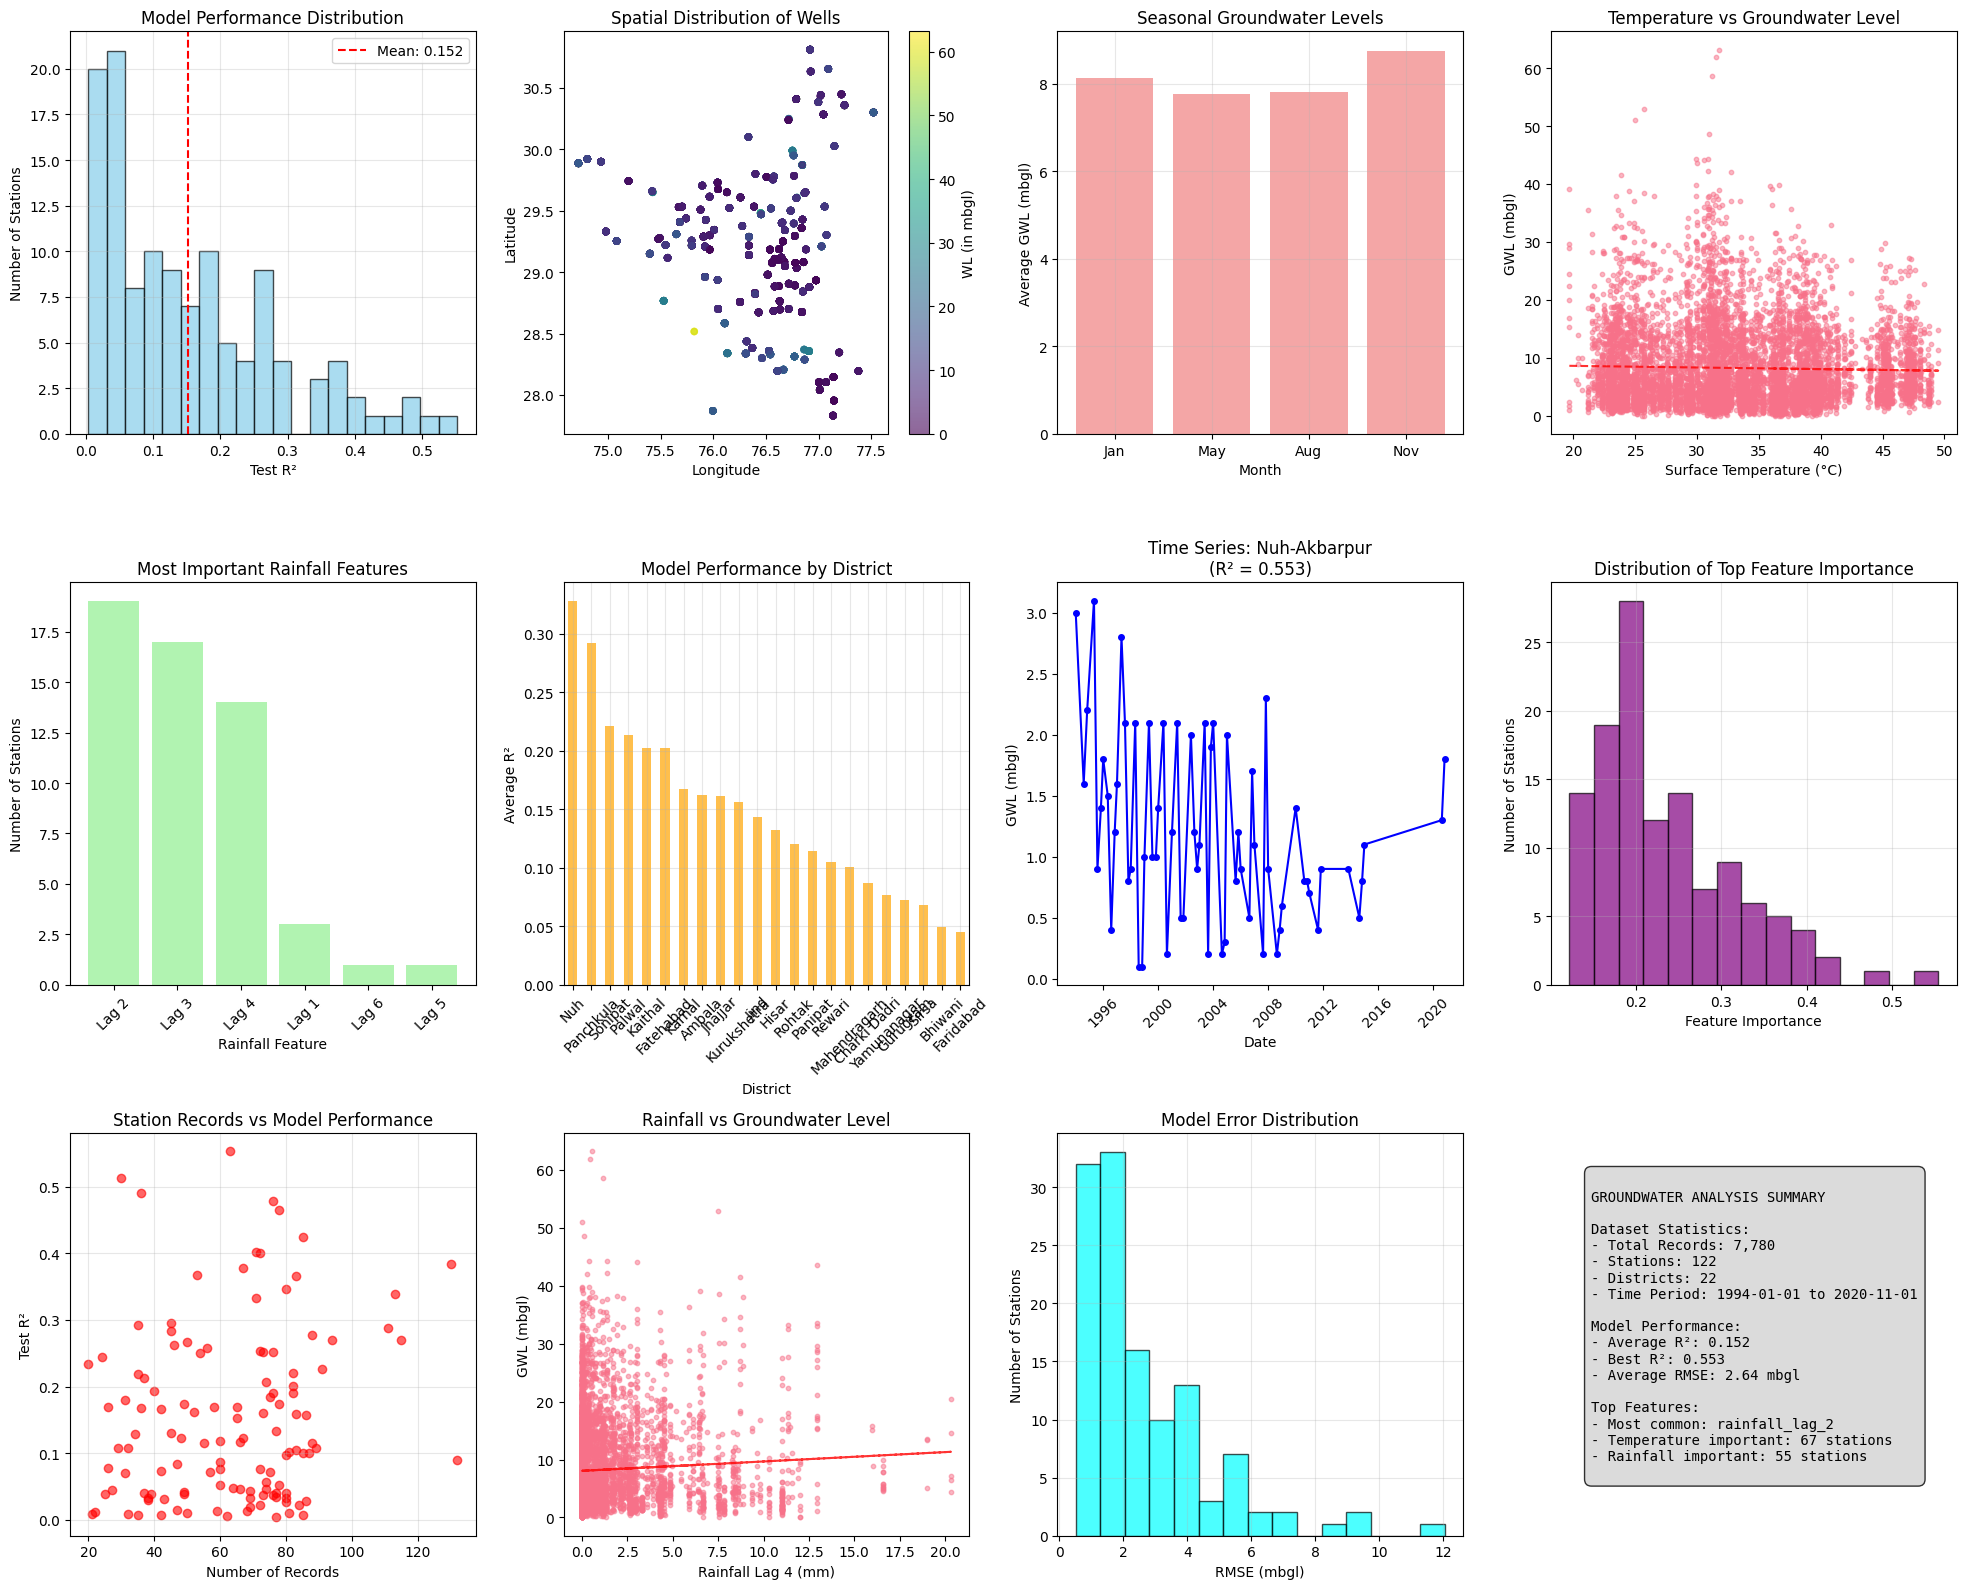

Comprehensive groundwater analysis plots created!


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def create_groundwater_analysis_plots(clean_dataset_csv, good_stations_csv):
    """
    Create comprehensive plots for groundwater analysis
    """
    # Load data
    df = pd.read_csv(clean_dataset_csv)
    stations = pd.read_csv(good_stations_csv)
    
    # Set up plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create subplots
    fig = plt.figure(figsize=(20, 16))
    
    # Plot 1: Station performance distribution
    ax1 = plt.subplot(3, 4, 1)
    stations['test_r2'].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.axvline(stations['test_r2'].mean(), color='red', linestyle='--', label=f'Mean: {stations["test_r2"].mean():.3f}')
    ax1.set_xlabel('Test R²')
    ax1.set_ylabel('Number of Stations')
    ax1.set_title('Model Performance Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Geographic distribution
    ax2 = plt.subplot(3, 4, 2)
    df.plot.scatter(x='LONGITUDE', y='LATITUDE', c='WL (in mbgl)', 
                    cmap='viridis', alpha=0.6, s=20, ax=ax2)
    ax2.set_xlabel('Longitude')
    ax2.set_ylabel('Latitude')
    ax2.set_title('Spatial Distribution of Wells')
    
    # Plot 3: Groundwater levels by month
    ax3 = plt.subplot(3, 4, 3)
    df['month'] = pd.to_datetime(df['date']).dt.month
    month_data = df.groupby('month')['WL (in mbgl)'].mean()
    month_names = {1:'Jan', 4:'Apr', 5:'May', 8:'Aug', 11:'Nov'}
    month_labels = [month_names[m] for m in month_data.index]
    
    ax3.bar(month_labels, month_data.values, color='lightcoral', alpha=0.7)
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Average GWL (mbgl)')
    ax3.set_title('Seasonal Groundwater Levels')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Temperature vs GWL correlation
    ax4 = plt.subplot(3, 4, 4)
    temp_col = 'tmax_surface_K_surface_current'
    if temp_col in df.columns:
        clean_data = df[[temp_col, 'WL (in mbgl)']].dropna()
        temp_celsius = clean_data[temp_col] - 273.15
        ax4.scatter(temp_celsius, clean_data['WL (in mbgl)'], alpha=0.5, s=10)
        ax4.set_xlabel('Surface Temperature (°C)')
        ax4.set_ylabel('GWL (mbgl)')
        ax4.set_title('Temperature vs Groundwater Level')
        
        # Add trend line
        z = np.polyfit(temp_celsius, clean_data['WL (in mbgl)'], 1)
        p = np.poly1d(z)
        ax4.plot(temp_celsius, p(temp_celsius), "r--", alpha=0.8)
    
    # Plot 5: Rainfall lag importance
    ax5 = plt.subplot(3, 4, 5)
    rainfall_features = stations['top_feature'][stations['top_feature'].str.contains('rainfall', na=False)]
    if len(rainfall_features) > 0:
        feature_counts = rainfall_features.value_counts()
        feature_names = [f.replace('rainfall_lag_', 'Lag ') for f in feature_counts.index]
        ax5.bar(feature_names, feature_counts.values, color='lightgreen', alpha=0.7)
        ax5.set_xlabel('Rainfall Feature')
        ax5.set_ylabel('Number of Stations')
        ax5.set_title('Most Important Rainfall Features')
        plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)
    
    # Plot 6: District-wise performance
    ax6 = plt.subplot(3, 4, 6)
    district_performance = stations.groupby('district')['test_r2'].mean().sort_values(ascending=False)
    district_performance.plot(kind='bar', ax=ax6, color='orange', alpha=0.7)
    ax6.set_xlabel('District')
    ax6.set_ylabel('Average R²')
    ax6.set_title('Model Performance by District')
    plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45)
    ax6.grid(True, alpha=0.3)
    
    # Plot 7: Time series of one good station
    ax7 = plt.subplot(3, 4, 7)
    best_station = stations.loc[stations['test_r2'].idxmax()]
    station_data = df[(df['DISTRICT'] == best_station['district']) & 
                     (df['VILLAGE'] == best_station['village'])]
    
    if len(station_data) > 0:
        station_data = station_data.sort_values('date')
        station_data['date_dt'] = pd.to_datetime(station_data['date'])
        ax7.plot(station_data['date_dt'], station_data['WL (in mbgl)'], 'b-o', markersize=4)
        ax7.set_xlabel('Date')
        ax7.set_ylabel('GWL (mbgl)')
        ax7.set_title(f'Time Series: {best_station["station_id"]}\n(R² = {best_station["test_r2"]:.3f})')
        plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)
    
    # Plot 8: Feature importance distribution
    ax8 = plt.subplot(3, 4, 8)
    stations['top_importance'].hist(bins=15, alpha=0.7, color='purple', edgecolor='black')
    ax8.set_xlabel('Feature Importance')
    ax8.set_ylabel('Number of Stations')
    ax8.set_title('Distribution of Top Feature Importance')
    ax8.grid(True, alpha=0.3)
    
    # Plot 9: Records vs Performance
    ax9 = plt.subplot(3, 4, 9)
    ax9.scatter(stations['records'], stations['test_r2'], alpha=0.6, color='red')
    ax9.set_xlabel('Number of Records')
    ax9.set_ylabel('Test R²')
    ax9.set_title('Station Records vs Model Performance')
    ax9.grid(True, alpha=0.3)
    
    # Plot 10: Rainfall vs GWL
    ax10 = plt.subplot(3, 4, 10)
    rainfall_col = 'rainfall_lag_4'
    if rainfall_col in df.columns:
        clean_rain = df[[rainfall_col, 'WL (in mbgl)']].dropna()
        ax10.scatter(clean_rain[rainfall_col], clean_rain['WL (in mbgl)'], alpha=0.5, s=10)
        ax10.set_xlabel('Rainfall Lag 4 (mm)')
        ax10.set_ylabel('GWL (mbgl)')
        ax10.set_title('Rainfall vs Groundwater Level')
        
        # Add trend line
        z = np.polyfit(clean_rain[rainfall_col], clean_rain['WL (in mbgl)'], 1)
        p = np.poly1d(z)
        ax10.plot(clean_rain[rainfall_col], p(clean_rain[rainfall_col]), "r--", alpha=0.8)
    
    # Plot 11: Model error distribution
    ax11 = plt.subplot(3, 4, 11)
    stations['test_rmse'].hist(bins=15, alpha=0.7, color='cyan', edgecolor='black')
    ax11.set_xlabel('RMSE (mbgl)')
    ax11.set_ylabel('Number of Stations')
    ax11.set_title('Model Error Distribution')
    ax11.grid(True, alpha=0.3)
    
    # Plot 12: Summary statistics
    ax12 = plt.subplot(3, 4, 12)
    ax12.axis('off')
    
    # Summary text
    summary_text = f"""
GROUNDWATER ANALYSIS SUMMARY

Dataset Statistics:
- Total Records: {len(df):,}
- Stations: {len(stations)}
- Districts: {df['DISTRICT'].nunique()}
- Time Period: {df['date'].min()} to {df['date'].max()}

Model Performance:
- Average R²: {stations['test_r2'].mean():.3f}
- Best R²: {stations['test_r2'].max():.3f}
- Average RMSE: {stations['test_rmse'].mean():.2f} mbgl

Top Features:
- Most common: {stations['top_feature'].mode().iloc[0] if len(stations) > 0 else 'N/A'}
- Temperature important: {(stations['top_feature'].str.contains('tmax|tmin|tmean', na=False)).sum()} stations
- Rainfall important: {(stations['top_feature'].str.contains('rainfall', na=False)).sum()} stations
    """
    
    ax12.text(0.1, 0.9, summary_text, transform=ax12.transAxes, fontsize=10,
              verticalalignment='top', fontfamily='monospace',
              bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Create the comprehensive plots
if 'good_stations' in locals() and len(good_stations) > 0:
    plots = create_groundwater_analysis_plots(
        'groundwater_clean_for_modeling.csv',
        'good_performing_stations.csv'
    )
    
    print("Comprehensive groundwater analysis plots created!")
else:
    print("Please run the station filtering code first to generate the required CSV files.")

Creating district-wise plots with RELEVANT features...
Using 13 RELEVANT features:
  Rainfall features: 6
  Temperature features: 7
Processing Hisar: 2,785 records
Processing Sirsa: 2,706 records
Processing Sonipat: 2,486 records
Processing Bhiwani: 2,427 records
Processing Karnal: 2,020 records
Processing Jind: 1,996 records
Processing Jhajjar: 1,706 records
Processing Ambala: 1,448 records
Processing Rohtak: 1,445 records


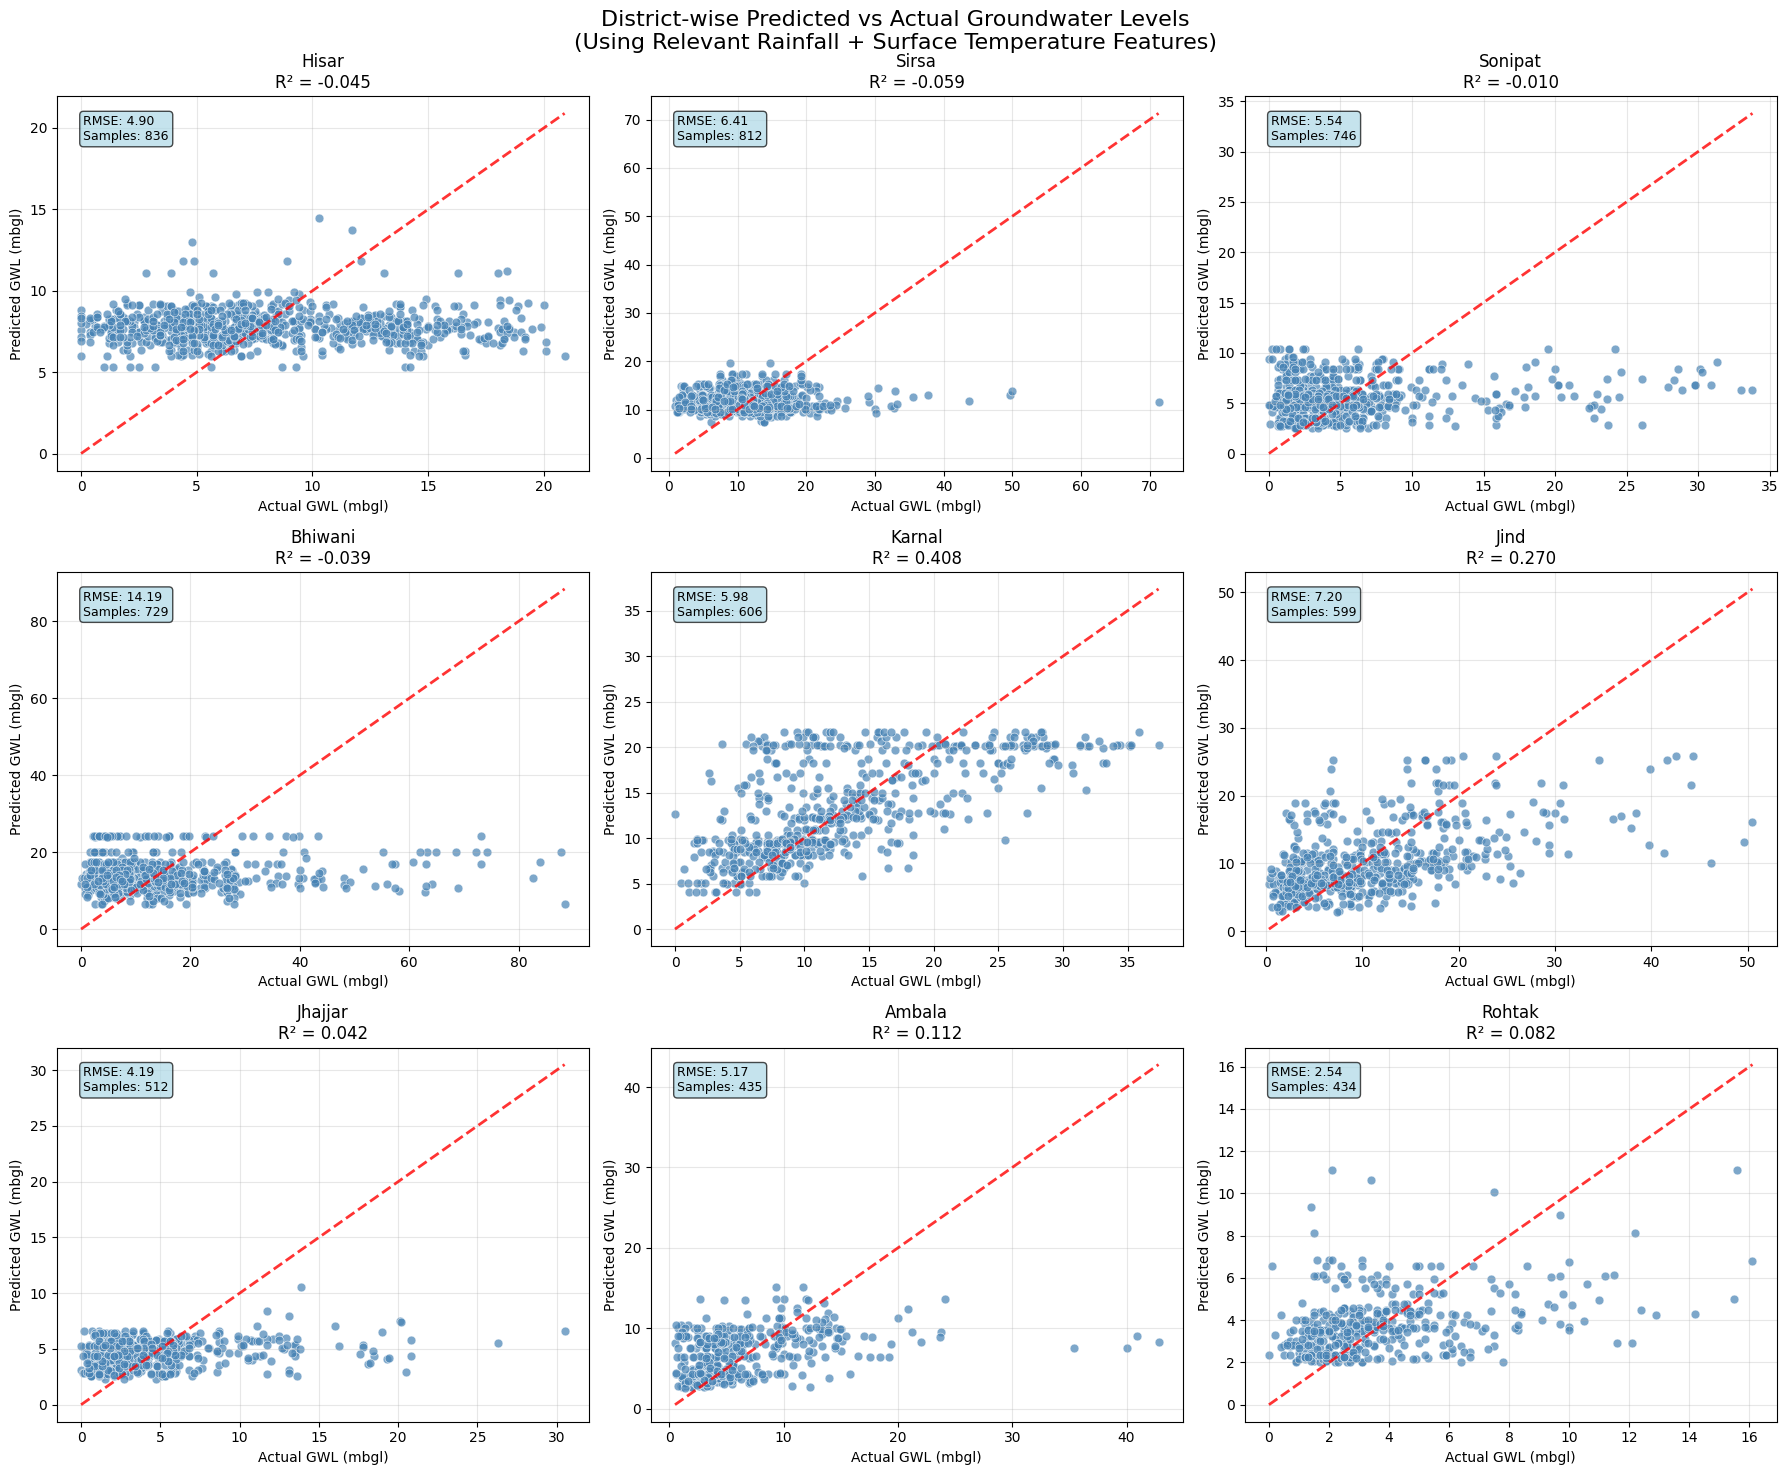


DISTRICT PERFORMANCE SUMMARY:
Karnal      : R²=0.408 | RMSE=5.98 | Top: rain_lag_3
Jind        : R²=0.270 | RMSE=7.20 | Top: rain_lag_4
Ambala      : R²=0.112 | RMSE=5.17 | Top: tmax_lag_3
Rohtak      : R²=0.082 | RMSE=2.54 | Top: tmin_lag_1
Jhajjar     : R²=0.042 | RMSE=4.19 | Top: tmin_current
Sonipat     : R²=-0.010 | RMSE=5.54 | Top: tmax_lag_2
Bhiwani     : R²=-0.039 | RMSE=14.19 | Top: rain_lag_3
Hisar       : R²=-0.045 | RMSE=4.90 | Top: tmax_lag_2
Sirsa       : R²=-0.059 | RMSE=6.41 | Top: tmax_lag_2

OVERALL STATS:
Average R²: 0.085
Best district: Karnal (R² = 0.408)
Features used: 13 (6 rainfall + 7 temperature)


In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def create_district_wise_plots_relevant_features(csv_file):
    """
    Create district-wise plots using only the most relevant features
    """
    print("Creating district-wise plots with RELEVANT features...")
    
    # Load data
    df = pd.read_csv(csv_file)
    
    # Select most relevant features
    rainfall_features = [
        'rainfall_lag_1', 'rainfall_lag_2', 'rainfall_lag_3', 'rainfall_lag_4', 
        'rainfall_lag_5', 'rainfall_lag_6'
    ]
    
    # Most relevant temperature features (surface level only + key lags)
    temp_features = [
        'tmax_surface_K_surface_current',    # Current surface max temp
        'tmin_surface_K_surface_current',    # Current surface min temp
        'tmax_surface_K_surface_lag_1',      # 1-month lag max temp
        'tmax_surface_K_surface_lag_2',      # 2-month lag max temp
        'tmax_surface_K_surface_lag_3',      # 3-month lag max temp
        'tmin_surface_K_surface_lag_1',      # 1-month lag min temp
        'tmin_surface_K_surface_lag_2'       # 2-month lag min temp
    ]
    
    # Keep only features that exist in the dataset
    available_rainfall = [f for f in rainfall_features if f in df.columns]
    available_temp = [f for f in temp_features if f in df.columns]
    
    all_features = available_rainfall + available_temp
    target = 'WL (in mbgl)'
    
    print(f"Using {len(all_features)} RELEVANT features:")
    print(f"  Rainfall features: {len(available_rainfall)}")
    print(f"  Temperature features: {len(available_temp)}")
    
    # Get top districts
    district_counts = df['DISTRICT'].value_counts()
    top_districts = district_counts.head(9).index.tolist()
    
    # Create subplots
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.flatten()
    
    district_results = []
    
    for i, district in enumerate(top_districts):
        district_data = df[df['DISTRICT'] == district]
        
        # Clean data
        model_data = district_data[all_features + [target]].dropna()
        
        if len(model_data) < 30:
            axes[i].text(0.5, 0.5, f'{district}\nInsufficient data\n({len(model_data)} records)', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(district)
            continue
        
        print(f"Processing {district}: {len(model_data):,} records")
        
        # Prepare data
        X = model_data[all_features]
        y = model_data[target]
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Build Random Forest
        rf = RandomForestRegressor(
            n_estimators=120,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=3,
            random_state=42
        )
        
        rf.fit(X_train, y_train)
        
        # Predictions
        y_pred = rf.predict(X_test)
        
        # Metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Feature importance
        feature_importance = dict(zip(all_features, rf.feature_importances_))
        top_feature = max(feature_importance.items(), key=lambda x: x[1])
        
        district_results.append({
            'district': district,
            'r2': r2,
            'rmse': rmse,
            'samples': len(y_test),
            'top_feature': top_feature[0]
        })
        
        # Create plot
        ax = axes[i]
        ax.scatter(y_test, y_pred, alpha=0.7, s=40, color='steelblue', edgecolors='white', linewidth=0.5)
        
        # Perfect prediction line
        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, alpha=0.8)
        
        # Formatting
        ax.set_xlabel('Actual GWL (mbgl)')
        ax.set_ylabel('Predicted GWL (mbgl)')
        ax.set_title(f'{district}\nR² = {r2:.3f}')
        ax.grid(True, alpha=0.3)
        
        # Add info box
        info_text = f'RMSE: {rmse:.2f}\nSamples: {len(y_test)}'
        ax.text(0.05, 0.95, info_text, transform=ax.transAxes, fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
                verticalalignment='top')
    
    plt.suptitle('District-wise Predicted vs Actual Groundwater Levels\n(Using Relevant Rainfall + Surface Temperature Features)', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Summary
    if district_results:
        results_df = pd.DataFrame(district_results)
        print(f"\nDISTRICT PERFORMANCE SUMMARY:")
        print("="*50)
        results_df_sorted = results_df.sort_values('r2', ascending=False)
        
        for _, row in results_df_sorted.iterrows():
            feature_short = row['top_feature'].replace('_surface_K_surface', '').replace('rainfall_', 'rain_')
            print(f"{row['district']:<12}: R²={row['r2']:.3f} | RMSE={row['rmse']:.2f} | Top: {feature_short}")
        
        print(f"\nOVERALL STATS:")
        print(f"Average R²: {results_df['r2'].mean():.3f}")
        print(f"Best district: {results_df_sorted.iloc[0]['district']} (R² = {results_df_sorted.iloc[0]['r2']:.3f})")
        print(f"Features used: {len(all_features)} (6 rainfall + {len(available_temp)} temperature)")
        
        return results_df
    
    return None

# Create the plots with relevant features only
district_results = create_district_wise_plots_relevant_features('groundwater_final_with_multilevel_temp_lags.csv')

BUILDING SIMPLIFIED MODELS AND COMPREHENSIVE VISUALIZATIONS
Using 14 simplified features
Processing Hisar: 2785 records
Processing Sirsa: 2706 records
Processing Sonipat: 2486 records
Processing Bhiwani: 2427 records
Processing Karnal: 2020 records
Processing Jind: 1996 records


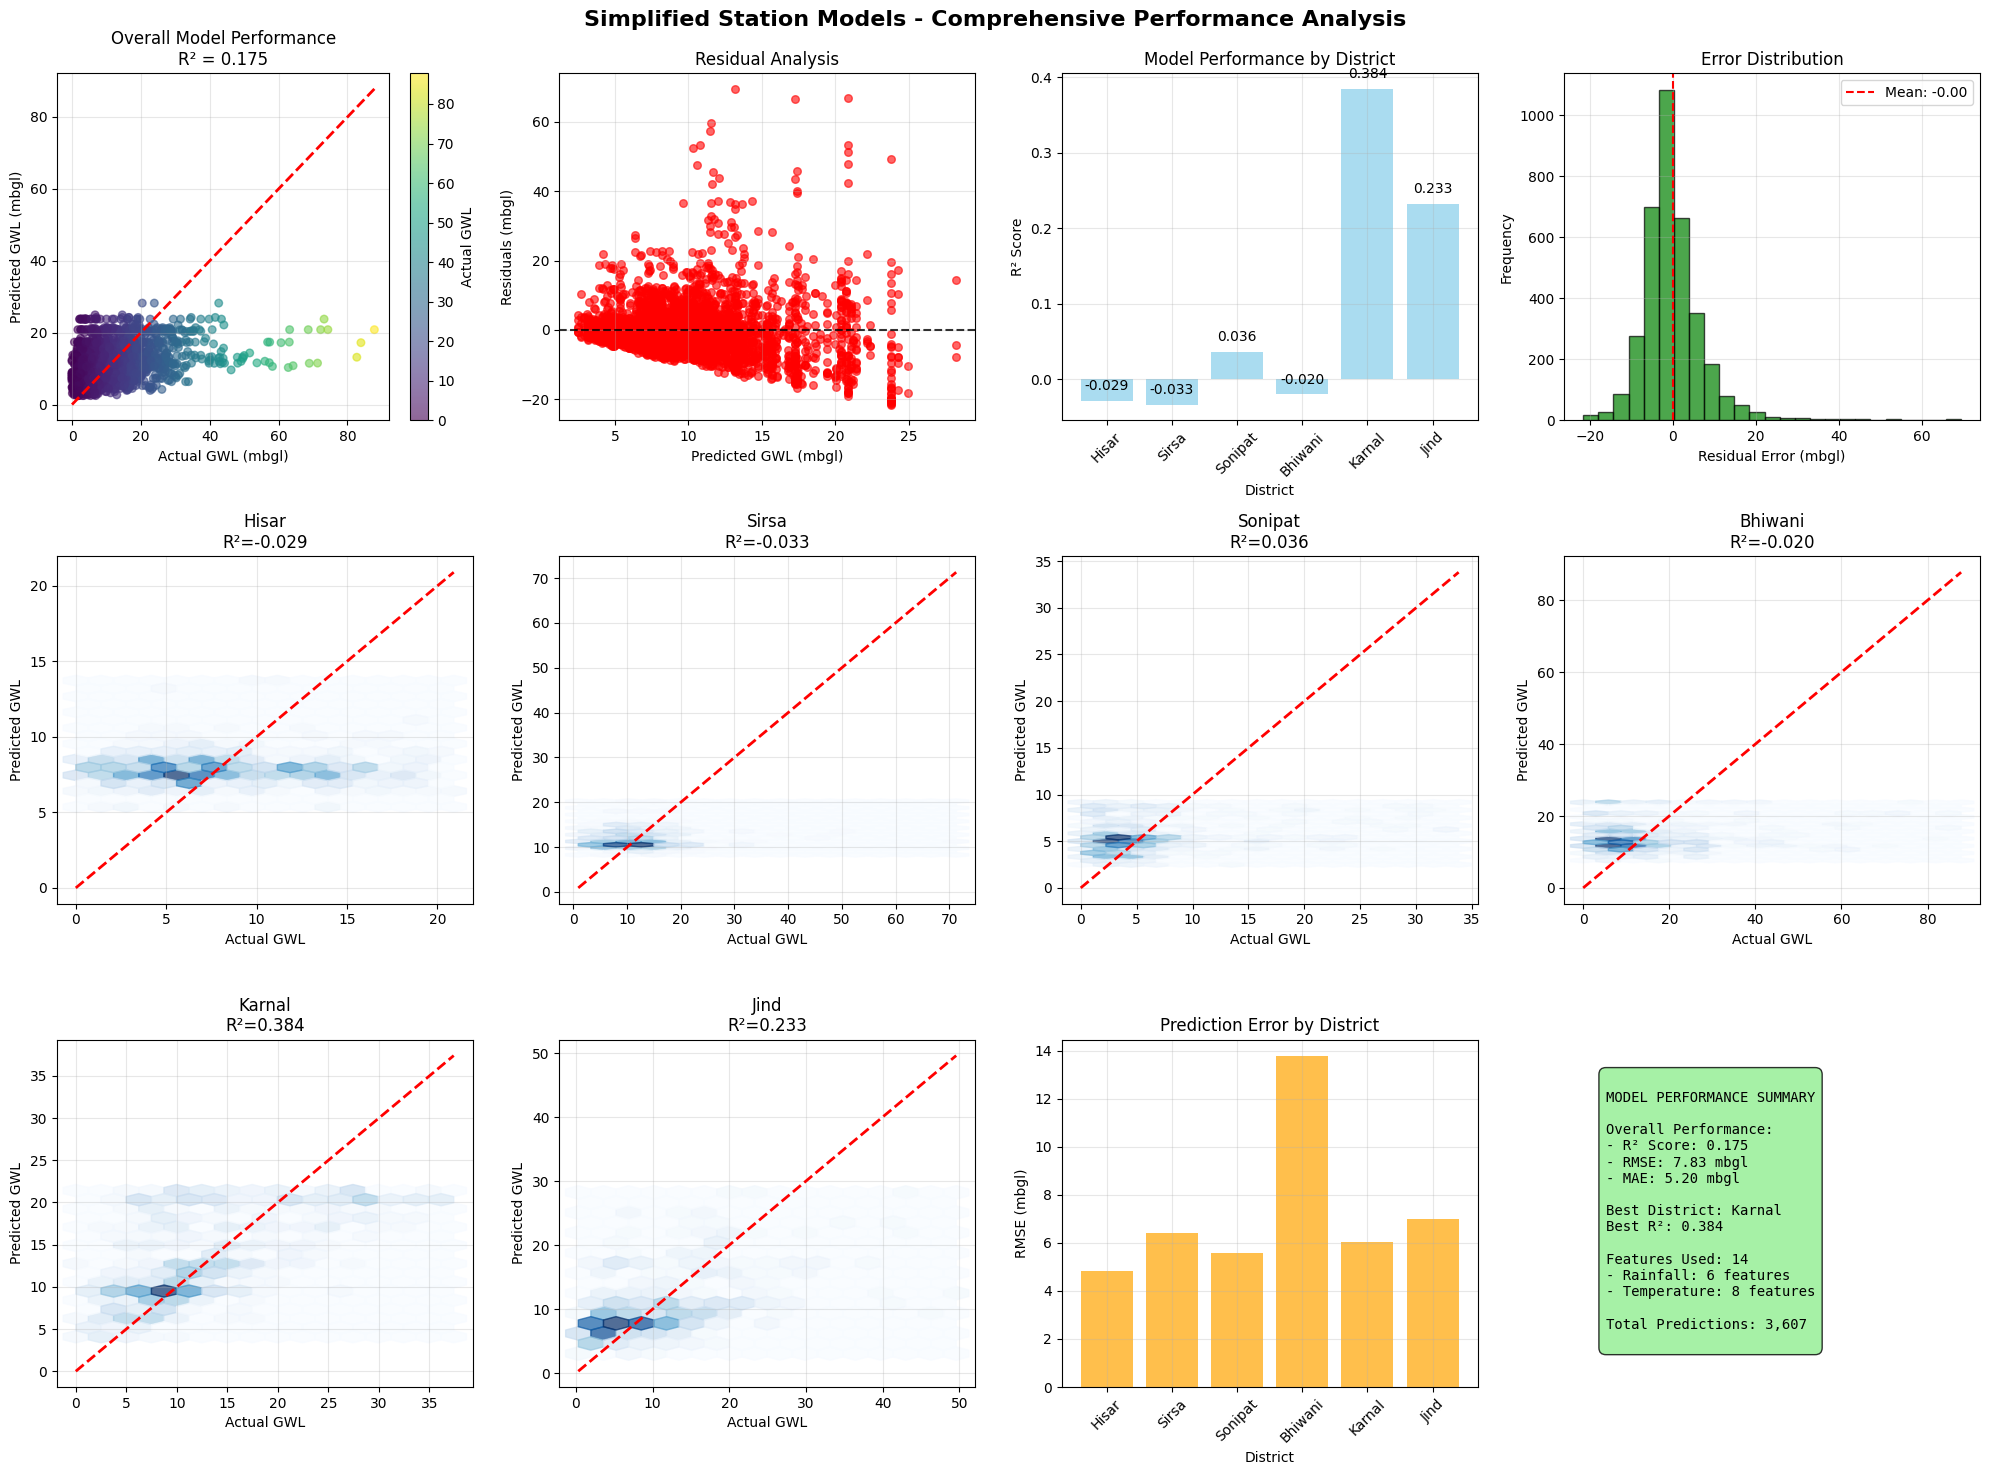

Comprehensive visualization complete with multiple plot types!


In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

def build_and_visualize_simple_station_models(csv_file, min_records=20):
    """
    Build simplified station models and create comprehensive visualizations
    """
    print("BUILDING SIMPLIFIED MODELS AND COMPREHENSIVE VISUALIZATIONS")
    print("="*55)
    
    # Load dataset
    df = pd.read_csv(csv_file)
    
    # Use simplified features that showed better results
    basic_features = [
        'rainfall_lag_1', 'rainfall_lag_2', 'rainfall_lag_3', 'rainfall_lag_4', 'rainfall_lag_5', 'rainfall_lag_6',
        'tmax_surface_K_surface_current', 'tmin_surface_K_surface_current', 'tmean_surface_K_surface_current',
        'tmax_surface_K_surface_lag_1', 'tmax_surface_K_surface_lag_2', 'tmax_surface_K_surface_lag_3',
        'tmin_surface_K_surface_lag_1', 'tmin_surface_K_surface_lag_2'
    ]
    
    available_features = [f for f in basic_features if f in df.columns]
    target = 'WL (in mbgl)'
    
    print(f"Using {len(available_features)} simplified features")
    
    # Get top districts for modeling
    district_counts = df['DISTRICT'].value_counts()
    top_districts = district_counts.head(6).index.tolist()
    
    all_actual = []
    all_predicted = []
    district_results = []
    district_predictions = {}
    
    # Process each district
    for district in top_districts:
        district_data = df[df['DISTRICT'] == district]
        model_data = district_data[available_features + [target]].dropna()
        
        if len(model_data) < 50:
            continue
            
        print(f"Processing {district}: {len(model_data)} records")
        
        X = model_data[available_features]
        y = model_data[target]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        
        # Simple RF model
        rf = RandomForestRegressor(
            n_estimators=80,
            max_depth=8,
            min_samples_split=5,
            min_samples_leaf=3,
            random_state=42
        )
        
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        
        # Metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        district_results.append({
            'district': district,
            'r2': r2,
            'rmse': rmse,
            'mae': mae,
            'samples': len(y_test)
        })
        
        # Store predictions for visualization
        district_predictions[district] = {
            'actual': y_test.values,
            'predicted': y_pred,
            'r2': r2,
            'rmse': rmse
        }
        
        all_actual.extend(y_test.values)
        all_predicted.extend(y_pred)
    
    # Create comprehensive visualizations
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Overall predicted vs actual (enhanced scatter)
    ax1 = plt.subplot(3, 4, 1)
    scatter = ax1.scatter(all_actual, all_predicted, alpha=0.6, c=all_actual, cmap='viridis', s=30)
    
    min_val = min(min(all_actual), min(all_predicted))
    max_val = max(max(all_actual), max(all_predicted))
    ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    
    overall_r2 = r2_score(all_actual, all_predicted)
    ax1.set_xlabel('Actual GWL (mbgl)')
    ax1.set_ylabel('Predicted GWL (mbgl)')
    ax1.set_title(f'Overall Model Performance\nR² = {overall_r2:.3f}')
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1, label='Actual GWL')
    
    # 2. Residual plot
    ax2 = plt.subplot(3, 4, 2)
    residuals = np.array(all_actual) - np.array(all_predicted)
    ax2.scatter(all_predicted, residuals, alpha=0.6, color='red', s=30)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.8)
    ax2.set_xlabel('Predicted GWL (mbgl)')
    ax2.set_ylabel('Residuals (mbgl)')
    ax2.set_title('Residual Analysis')
    ax2.grid(True, alpha=0.3)
    
    # 3. District performance comparison
    ax3 = plt.subplot(3, 4, 3)
    results_df = pd.DataFrame(district_results)
    bars = ax3.bar(results_df['district'], results_df['r2'], color='skyblue', alpha=0.7)
    ax3.set_xlabel('District')
    ax3.set_ylabel('R² Score')
    ax3.set_title('Model Performance by District')
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    ax3.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, r2 in zip(bars, results_df['r2']):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{r2:.3f}', ha='center', va='bottom')
    
    # 4. Error distribution
    ax4 = plt.subplot(3, 4, 4)
    ax4.hist(residuals, bins=25, alpha=0.7, color='green', edgecolor='black')
    ax4.axvline(np.mean(residuals), color='red', linestyle='--', label=f'Mean: {np.mean(residuals):.2f}')
    ax4.set_xlabel('Residual Error (mbgl)')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Error Distribution')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5-10. Individual district predictions (top 6 districts)
    for i, district in enumerate(top_districts[:6]):
        if district in district_predictions:
            ax = plt.subplot(3, 4, 5 + i)
            data = district_predictions[district]
            
            # Create density plot instead of just scatter
            ax.hexbin(data['actual'], data['predicted'], gridsize=15, cmap='Blues', alpha=0.7)
            
            min_val = min(min(data['actual']), min(data['predicted']))
            max_val = max(max(data['actual']), max(data['predicted']))
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
            
            ax.set_xlabel('Actual GWL')
            ax.set_ylabel('Predicted GWL')
            ax.set_title(f'{district}\nR²={data["r2"]:.3f}')
            ax.grid(True, alpha=0.3)
    
    # 11. RMSE comparison
    ax11 = plt.subplot(3, 4, 11)
    ax11.bar(results_df['district'], results_df['rmse'], color='orange', alpha=0.7)
    ax11.set_xlabel('District')
    ax11.set_ylabel('RMSE (mbgl)')
    ax11.set_title('Prediction Error by District')
    plt.setp(ax11.xaxis.get_majorticklabels(), rotation=45)
    ax11.grid(True, alpha=0.3)
    
    # 12. Summary statistics
    ax12 = plt.subplot(3, 4, 12)
    ax12.axis('off')
    
    summary_text = f"""
MODEL PERFORMANCE SUMMARY

Overall Performance:
- R² Score: {overall_r2:.3f}
- RMSE: {np.sqrt(mean_squared_error(all_actual, all_predicted)):.2f} mbgl
- MAE: {mean_absolute_error(all_actual, all_predicted):.2f} mbgl

Best District: {results_df.loc[results_df['r2'].idxmax(), 'district']}
Best R²: {results_df['r2'].max():.3f}

Features Used: {len(available_features)}
- Rainfall: 6 features
- Temperature: {len([f for f in available_features if 'surface' in f])} features

Total Predictions: {len(all_actual):,}
    """
    
    ax12.text(0.1, 0.9, summary_text, transform=ax12.transAxes, fontsize=10,
              verticalalignment='top', fontfamily='monospace',
              bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))
    
    plt.suptitle('Simplified Station Models - Comprehensive Performance Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return results_df, district_predictions

# Create comprehensive visualizations
district_results, predictions_data = build_and_visualize_simple_station_models(
    'groundwater_final_with_multilevel_temp_lags.csv'
)

print("Comprehensive visualization complete with multiple plot types!")

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('groundwater_final_with_multilevel_temp_lags.csv')

In [3]:
# For column names
print(df.columns.tolist())

# For basic info
print(df.shape)
print(df.head(3))
print(df['WL (in mbgl)'].describe())
print(df.dtypes)

['STATE_UT', 'DISTRICT', 'BLOCK', 'VILLAGE', 'LATITUDE', 'LONGITUDE', 'date', 'WL (in mbgl)', 'rain_lat', 'rain_lon', 'rainfall', 'year_month', 'month', 'rainfall_current_apcp', 'rainfall_lag_1', 'rainfall_lag_2', 'rainfall_lag_3', 'rainfall_lag_4', 'rainfall_lag_5', 'rainfall_lag_6', 'lag_3month_avg', 'lag_3month_sum', 'lag_6month_avg', 'lag_6month_sum', 'tmax_surface_K_surface_current', 'tmax_surface_K_surface_lag_1', 'tmax_surface_K_surface_lag_2', 'tmax_surface_K_surface_lag_3', 'tmax_surface_K_surface_lag_4', 'tmax_surface_K_surface_lag_5', 'tmax_surface_K_surface_lag_6', 'tmax_boundary_layer_K_boundary_layer_current', 'tmax_boundary_layer_K_boundary_layer_lag_1', 'tmax_boundary_layer_K_boundary_layer_lag_2', 'tmax_boundary_layer_K_boundary_layer_lag_3', 'tmax_boundary_layer_K_boundary_layer_lag_4', 'tmax_boundary_layer_K_boundary_layer_lag_5', 'tmax_boundary_layer_K_boundary_layer_lag_6', 'tmax_free_atmosphere_K_free_atmosphere_current', 'tmax_free_atmosphere_K_free_atmosphere_la

Loading Haryana Groundwater Dataset...
HARYANA GROUNDWATER LSTM MODEL ARCHITECTURE
🔧 MODEL TYPE: Single Model for All Stations (NOT Station-Wise)
📍 SPATIAL APPROACH: Learns patterns across all wells simultaneously
⏰ TEMPORAL APPROACH: Maintains time sequence continuity per station
🎯 PREDICTION: Uses 6 consecutive time steps to predict next water level
Preparing data for LSTM...
HARYANA GROUNDWATER DATASET ANALYSIS
Dataset Shape: (31517, 108)
Date Range: 1994-01-01 to 2020-11-01
Unique Locations: 1352
Unique Districts: 22
Unique Blocks: 141

Groundwater Level (WL) Statistics:
count    31517.000000
mean        10.721956
std         10.007736
min          0.000000
25%          4.000000
50%          7.700000
75%         14.300000
max         99.500000
Name: WL (in mbgl), dtype: float64

Missing Values:
tmax_surface_K_surface_lag_1                     392
tmax_surface_K_surface_lag_2                     392
tmax_surface_K_surface_lag_3                     392
tmax_surface_K_surface_lag_4   

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 6, 64)          │        24,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 6, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,281 (161.25 KB)

 Trainable params: 40,993 (160.13 KB)

 Non-trainable params: 288 (1.12 KB)

Training LSTM model...
Epoch 1/100
265/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4737 - mae: 0.4912

271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2346 - mae: 0.3363 - val_loss: 0.0236 - val_mae: 0.1212 - learning_rate: 0.0010
Epoch 2/100
269/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0427 - mae: 0.1555

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0339 - mae: 0.1370 - val_loss: 0.0122 - val_mae: 0.0703 - learning_rate: 0.0010
Epoch 3/100
264/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mae: 0.0992

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0160 - mae: 0.0919 - val_loss: 0.0100 - val_mae: 0.0616 - learning_rate: 0.0010
Epoch 4/100
257/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mae: 0.0771

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - mae: 0.0733 - val_loss: 0.0091 - val_mae: 0.0601 - learning_rate: 0.0010
Epoch 5/100
269/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087 - mae: 0.0673

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084 - mae: 0.0665 - val_loss: 0.0087 - val_mae: 0.0612 - learning_rate: 0.0010
Epoch 6/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0076 - mae: 0.0637 - val_loss: 0.0089 - val_mae: 0.0614 - learning_rate: 0.0010
Epoch 7/100
260/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mae: 0.0625

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - mae: 0.0622 - val_loss: 0.0087 - val_mae: 0.0622 - learning_rate: 0.0010
Epoch 8/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0070 - mae: 0.0616 - val_loss: 0.0088 - val_mae: 0.0624 - learning_rate: 0.0010
Epoch 9/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068 - mae: 0.0609 - val_loss: 0.0088 - val_mae: 0.0615 - learning_rate: 0.0010
Epoch 10/100
268/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - mae: 0.0608

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0067 - mae: 0.0604 - val_loss: 0.0086 - val_mae: 0.0630 - learning_rate: 0.0010
Epoch 11/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0067 - mae: 0.0602 - val_loss: 0.0087 - val_mae: 0.0625 - learning_rate: 0.0010
Epoch 12/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - mae: 0.0611

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0066 - mae: 0.0601 - val_loss: 0.0085 - val_mae: 0.0619 - learning_rate: 0.0010
Epoch 13/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0066 - mae: 0.0599 - val_loss: 0.0086 - val_mae: 0.0633 - learning_rate: 0.0010
Epoch 14/100
263/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - mae: 0.0595

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0065 - mae: 0.0595 - val_loss: 0.0084 - val_mae: 0.0630 - learning_rate: 0.0010
Epoch 15/100
264/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - mae: 0.0595

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0065 - mae: 0.0596 - val_loss: 0.0083 - val_mae: 0.0617 - learning_rate: 0.0010
Epoch 16/100
267/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - mae: 0.0592

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0065 - mae: 0.0597 - val_loss: 0.0083 - val_mae: 0.0615 - learning_rate: 0.0010
Epoch 17/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0064 - mae: 0.0591 - val_loss: 0.0083 - val_mae: 0.0616 - learning_rate: 0.0010
Epoch 18/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0064 - mae: 0.0591 - val_loss: 0.0085 - val_mae: 0.0612 - learning_rate: 0.0010
Epoch 19/100
263/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - mae: 0.0590

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0064 - mae: 0.0588 - val_loss: 0.0081 - val_mae: 0.0624 - learning_rate: 0.0010
Epoch 20/100
268/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mae: 0.0590

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063 - mae: 0.0585 - val_loss: 0.0080 - val_mae: 0.0607 - learning_rate: 0.0010
Epoch 21/100
268/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mae: 0.0581

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063 - mae: 0.0580 - val_loss: 0.0079 - val_mae: 0.0589 - learning_rate: 0.0010
Epoch 22/100
265/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mae: 0.0570

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062 - mae: 0.0574 - val_loss: 0.0077 - val_mae: 0.0588 - learning_rate: 0.0010
Epoch 23/100
258/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mae: 0.0561

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0061 - mae: 0.0565 - val_loss: 0.0074 - val_mae: 0.0586 - learning_rate: 0.0010
Epoch 24/100
258/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mae: 0.0561

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0060 - mae: 0.0556 - val_loss: 0.0072 - val_mae: 0.0560 - learning_rate: 0.0010
Epoch 25/100
259/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mae: 0.0555

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0059 - mae: 0.0552 - val_loss: 0.0072 - val_mae: 0.0575 - learning_rate: 0.0010
Epoch 26/100
267/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mae: 0.0555

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0058 - mae: 0.0549 - val_loss: 0.0071 - val_mae: 0.0554 - learning_rate: 0.0010
Epoch 27/100
269/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 - mae: 0.0542

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0057 - mae: 0.0543 - val_loss: 0.0069 - val_mae: 0.0561 - learning_rate: 0.0010
Epoch 28/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0057 - mae: 0.0539 - val_loss: 0.0070 - val_mae: 0.0551 - learning_rate: 0.0010
Epoch 29/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056 - mae: 0.0534 - val_loss: 0.0078 - val_mae: 0.0600 - learning_rate: 0.0010
Epoch 30/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0054 - mae: 0.0524 - val_loss: 0.0080 - val_mae: 0.0616 - learning_rate: 0.0010
Epoch 31/100
263/271 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - mae: 0.0517

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0054 - mae: 0.0520 - val_loss: 0.0069 - val_mae: 0.0542 - learning_rate: 0.0010
Epoch 32/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053 - mae: 0.0514 - val_loss: 0.0070 - val_mae: 0.0553 - learning_rate: 0.0010
Epoch 33/100
264/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mae: 0.0498

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052 - mae: 0.0508 - val_loss: 0.0059 - val_mae: 0.0499 - learning_rate: 0.0010
Epoch 34/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - mae: 0.0504 - val_loss: 0.0062 - val_mae: 0.0523 - learning_rate: 0.0010
Epoch 35/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - mae: 0.0504 - val_loss: 0.0062 - val_mae: 0.0509 - learning_rate: 0.0010
Epoch 36/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050 - mae: 0.0494 - val_loss: 0.0059 - val_mae: 0.0503 - learning_rate: 0.0010
Epoch 37/100
267/271 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mae: 0.0498

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050 - mae: 0.0500 - val_loss: 0.0057 - val_mae: 0.0497 - learning_rate: 0.0010
Epoch 38/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0048 - mae: 0.0487 - val_loss: 0.0065 - val_mae: 0.0522 - learning_rate: 0.0010
Epoch 39/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - mae: 0.0482 - val_loss: 0.0064 - val_mae: 0.0503 - learning_rate: 0.0010
Epoch 40/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - mae: 0.0482 - val_loss: 0.0061 - val_mae: 0.0507 - learning_rate: 0.0010
Epoch 41/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - mae: 0.0481 - val_loss: 0.0060 - val_mae: 0.0499 - learning_rate: 0.0010
Epoch 42/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0045 - mae: 0.0474 - val_loss: 0.0090 - val_mae: 0.0645 - learning_rate: 0.0010
Epoch 43/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0046 - mae: 0.0477 - val_loss: 0.0059 - val_mae: 0.0499 - learning_rate: 0.0010
Epoch

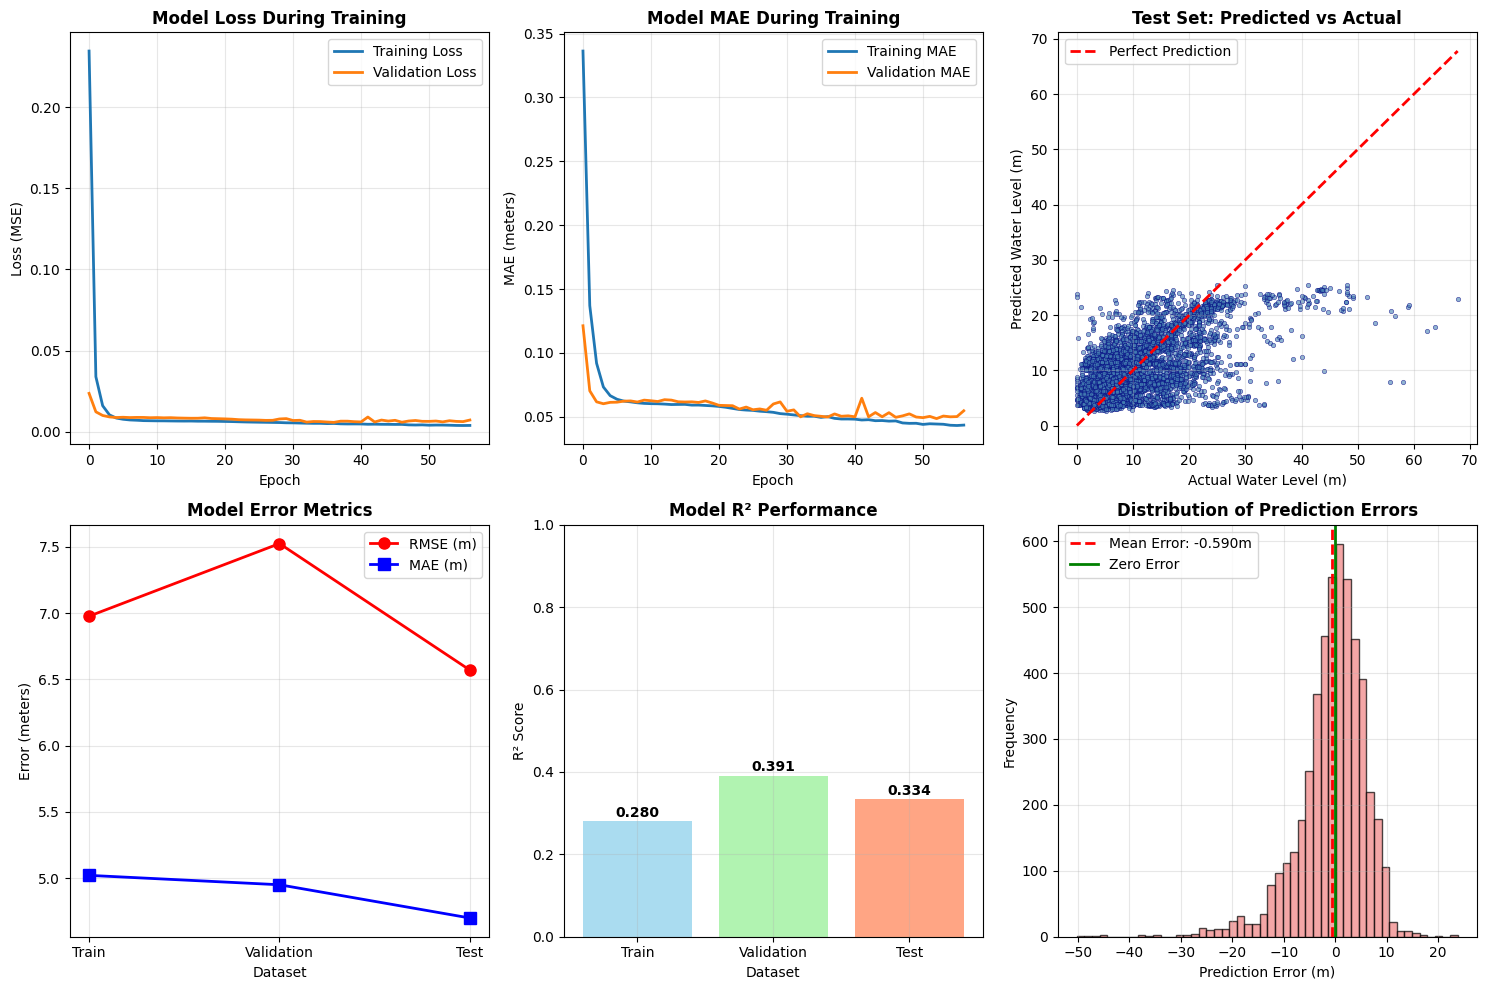

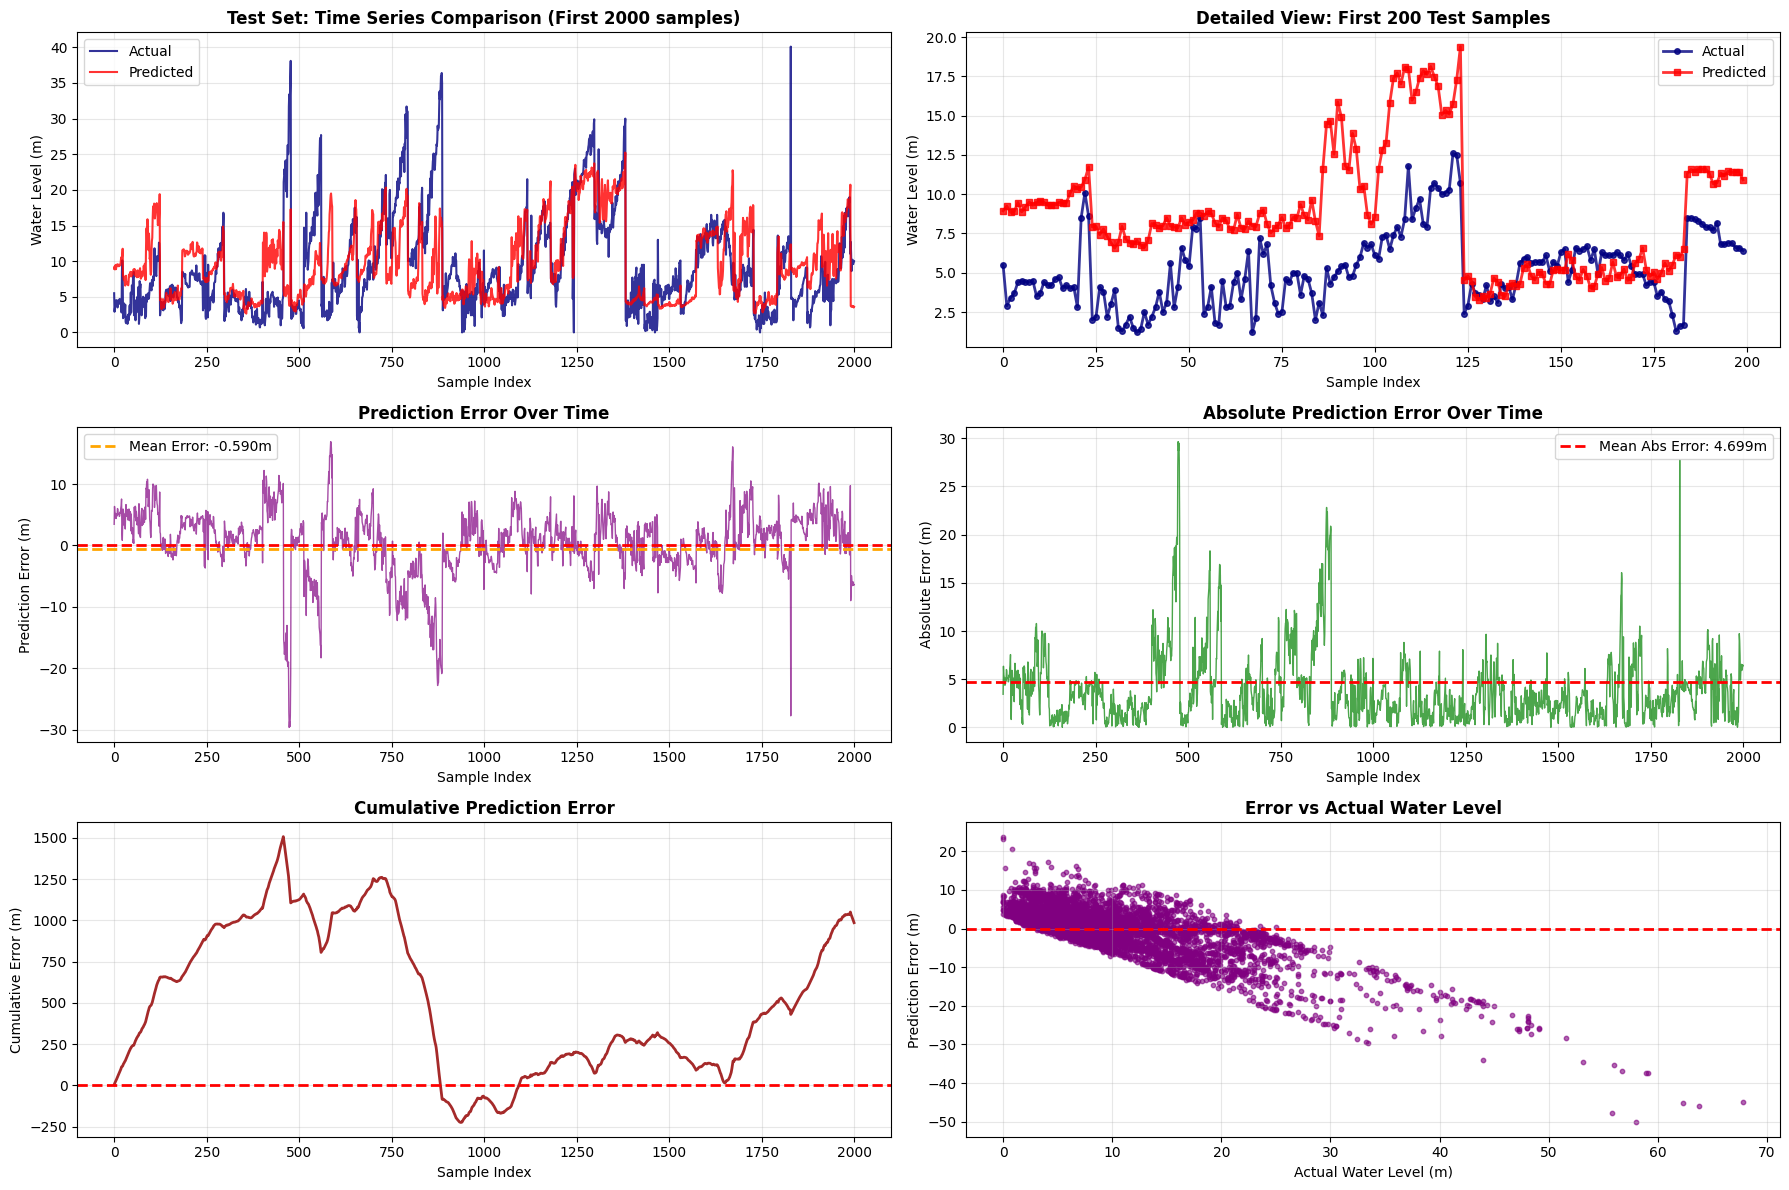

🏆 TOP PERFORMING STATIONS (by R² score):
1. Location 931: Majura, Karnal (R²: 0.827, RMSE: 1.970m)
2. Location 976: Pundri, Kaithal (R²: 0.739, RMSE: 2.066m)
3. Location 820: Ghaso, Jind (R²: 0.719, RMSE: 1.968m)
4. Location 1008: Saunkra, Karnal (R²: 0.674, RMSE: 2.256m)
5. Location 740: Khandra, Panipat (R²: 0.508, RMSE: 2.509m)
6. Location 875: Kharwal, Jind (R²: 0.411, RMSE: 3.071m)


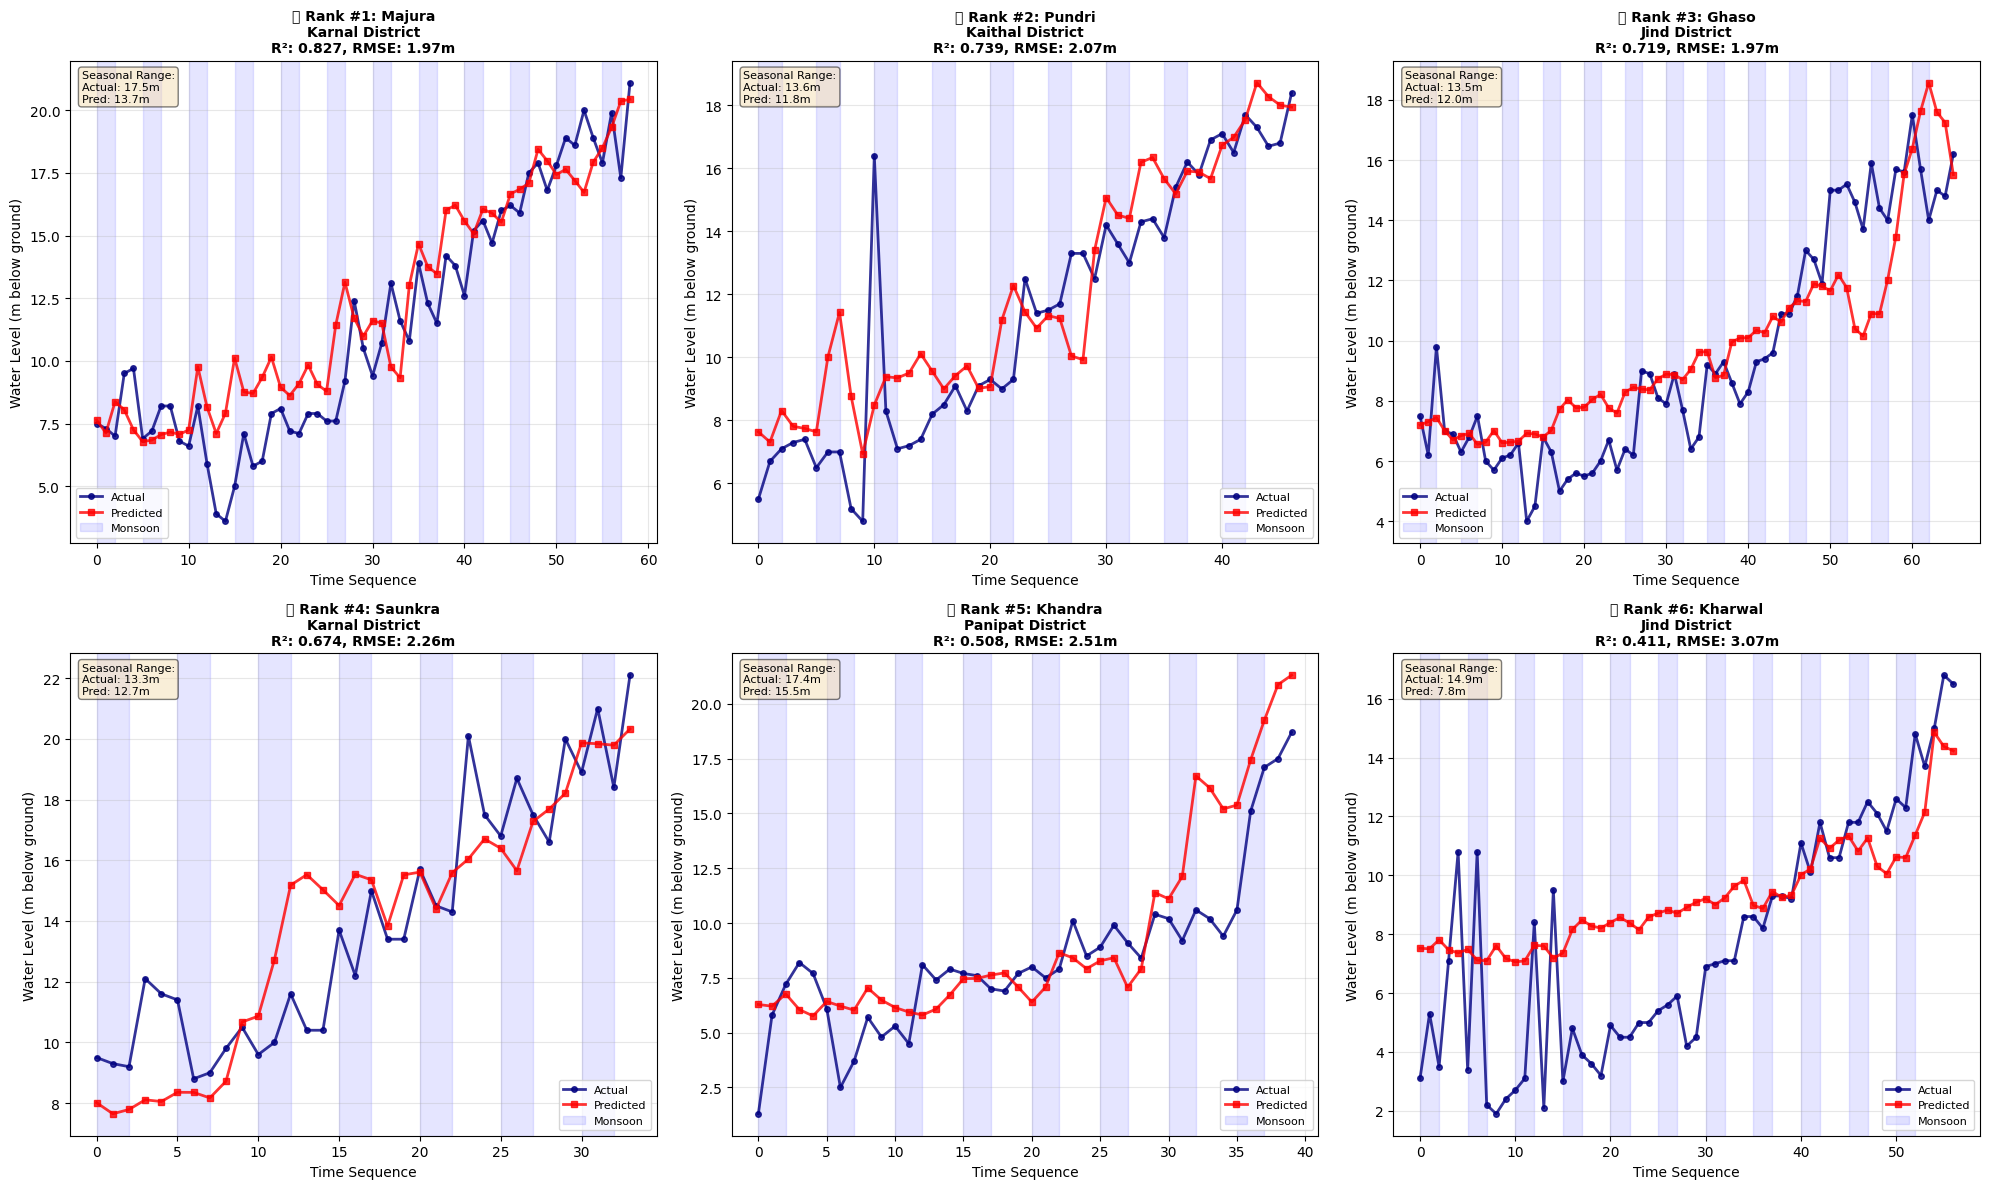


🌊 SEASONAL TRANSITION ANALYSIS


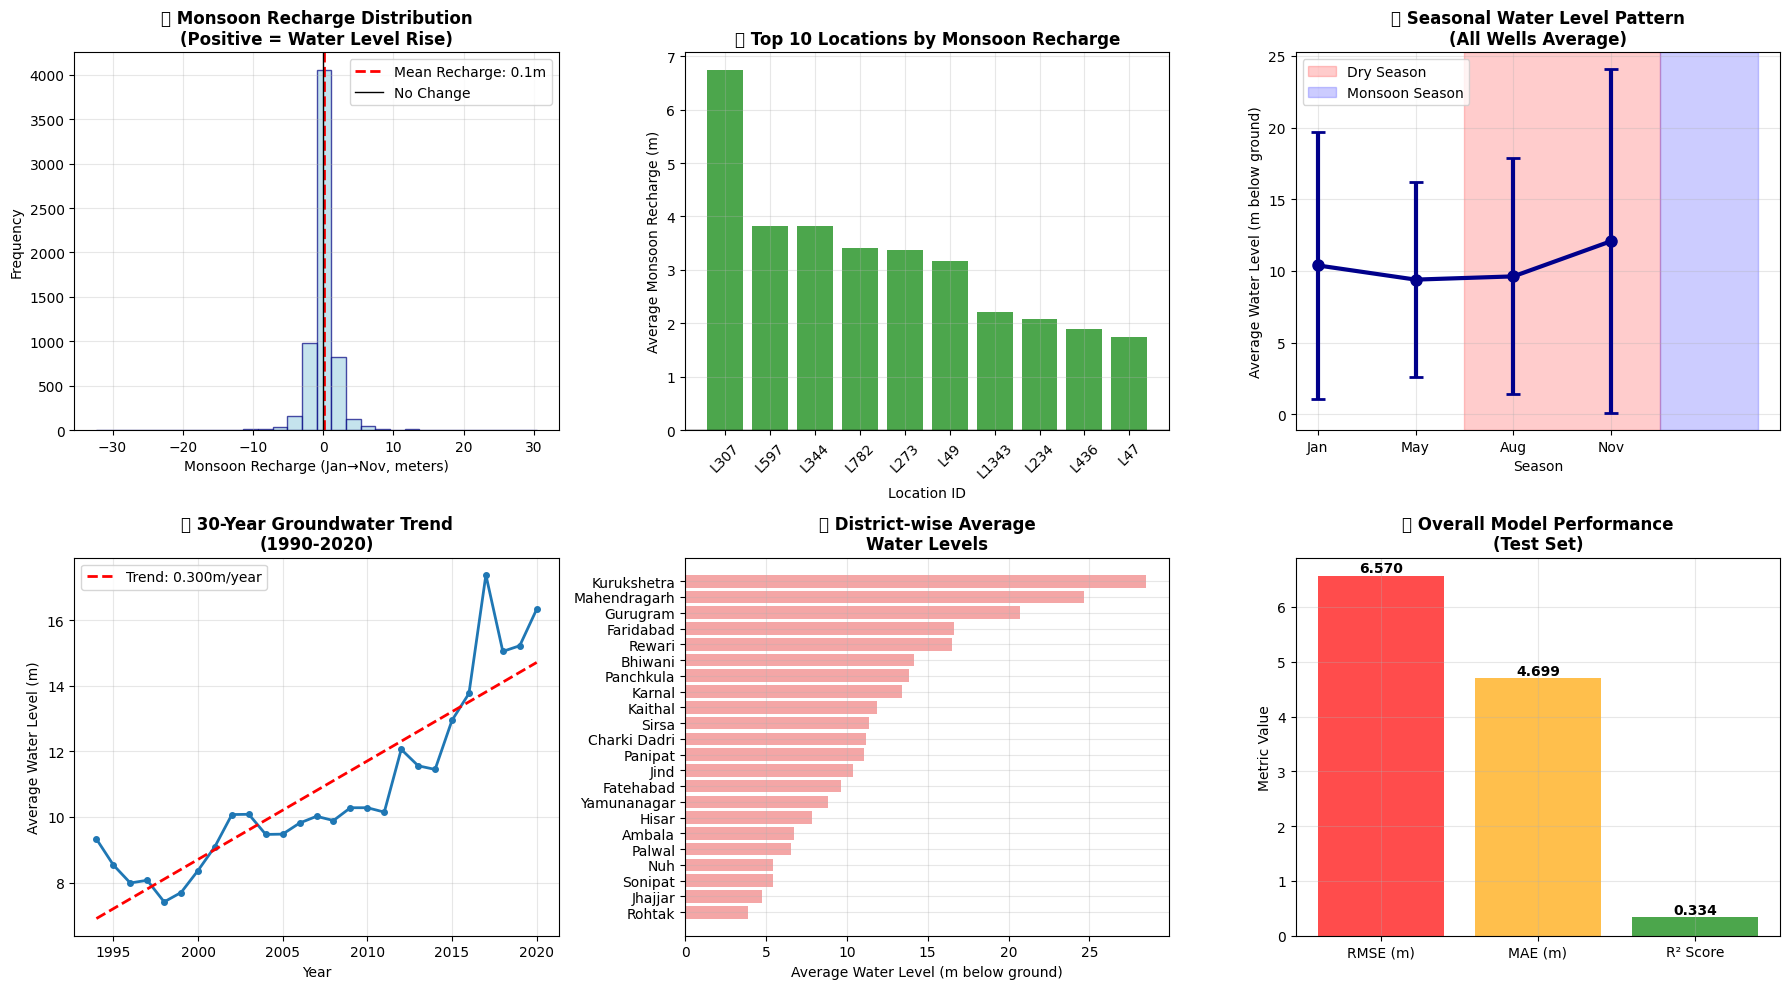

📋 SEASONAL INSIGHTS:
   • Total seasonal transitions analyzed: 6283
   • Average monsoon recharge: 0.05m
   • Best recharging locations: 468 locations gain >2m
   • Poorly recharging locations: 2894 locations lose water
   • Seasonal variability: 2.05m standard deviation

Model training and evaluation complete!
Check the plots above for detailed performance analysis.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

class HaryanaGroundwaterLSTM:
    def __init__(self, sequence_length=6, lstm_units=64, dropout_rate=0.3):
        """
        LSTM model specifically designed for Haryana groundwater level prediction
        
        Parameters:
        - sequence_length: Number of time steps to look back (since data is 5 months/year, 6 is reasonable)
        - lstm_units: Number of LSTM units
        - dropout_rate: Dropout rate for regularization
        """
        self.sequence_length = sequence_length
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.model = None
        self.scalers = {}
        self.label_encoders = {}
        self.feature_names = None
        self.location_info = None
        
        print("=" * 80)
        print("HARYANA GROUNDWATER LSTM MODEL ARCHITECTURE")
        print("=" * 80)
        print("🔧 MODEL TYPE: Single Model for All Stations (NOT Station-Wise)")
        print("📍 SPATIAL APPROACH: Learns patterns across all wells simultaneously")
        print("⏰ TEMPORAL APPROACH: Maintains time sequence continuity per station")
        print("🎯 PREDICTION: Uses 6 consecutive time steps to predict next water level")
        print("=" * 80)
        
    def analyze_dataset(self, df):
        """Analyze the dataset structure and characteristics"""
        print("=" * 60)
        print("HARYANA GROUNDWATER DATASET ANALYSIS")
        print("=" * 60)
        
        print(f"Dataset Shape: {df.shape}")
        print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
        print(f"Unique Locations: {df[['LATITUDE', 'LONGITUDE']].drop_duplicates().shape[0]}")
        print(f"Unique Districts: {df['DISTRICT'].nunique()}")
        print(f"Unique Blocks: {df['BLOCK'].nunique()}")
        
        # Analyze target variable
        print(f"\nGroundwater Level (WL) Statistics:")
        print(df['WL (in mbgl)'].describe())
        
        # Check for missing values
        print(f"\nMissing Values:")
        missing_counts = df.isnull().sum()
        if missing_counts.sum() > 0:
            print(missing_counts[missing_counts > 0])
        else:
            print("No missing values found!")
        
        # Analyze temporal distribution
        df['year'] = pd.to_datetime(df['date']).dt.year
        df['month'] = pd.to_datetime(df['date']).dt.month
        print(f"\nTemporal Distribution:")
        print("Months available:", sorted(df['month'].unique()))
        print("Years covered:", df['year'].min(), "to", df['year'].max())
        
        return df
    
    def prepare_features(self, df):
        """Prepare and select relevant features for the model"""
        df = df.copy()
        
        # Ensure date is datetime
        df['date'] = pd.to_datetime(df['date'])
        
        # Create location identifiers
        df['location_id'] = df.groupby(['LATITUDE', 'LONGITUDE']).ngroup()
        
        # Define feature groups
        rainfall_features = [
            'rainfall', 'rainfall_current_apcp', 'rainfall_lag_1', 'rainfall_lag_2', 
            'rainfall_lag_3', 'rainfall_lag_4', 'rainfall_lag_5', 'rainfall_lag_6',
            'lag_3month_avg', 'lag_3month_sum', 'lag_6month_avg', 'lag_6month_sum'
        ]
        
        # Select key temperature features (surface and boundary layer are most relevant for groundwater)
        temperature_features = [
            'tmean_surface_K_surface_current', 'tmean_surface_K_surface_lag_1', 'tmean_surface_K_surface_lag_2',
            'tmax_surface_K_surface_current', 'tmax_surface_K_surface_lag_1', 'tmax_surface_K_surface_lag_2',
            'tmin_surface_K_surface_current', 'tmin_surface_K_surface_lag_1', 'tmin_surface_K_surface_lag_2',
            'tmean_boundary_layer_K_boundary_layer_current', 'tmean_boundary_layer_K_boundary_layer_lag_1', 
            'tmean_boundary_layer_K_boundary_layer_lag_2'
        ]
        
        # Geographic features
        geographic_features = ['LATITUDE', 'LONGITUDE']
        
        # Temporal features
        df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
        df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
        df['year_normalized'] = (pd.to_datetime(df['date']).dt.year - 1990) / 30  # Normalize years 1990-2020
        
        temporal_features = ['month_sin', 'month_cos', 'year_normalized']
        
        # Combine all features
        all_features = rainfall_features + temperature_features + geographic_features + temporal_features
        
        # Check which features exist in the dataset
        available_features = [f for f in all_features if f in df.columns]
        print(f"Using {len(available_features)} features out of {len(all_features)} planned features")
        
        self.feature_names = available_features
        return df[['date', 'WL (in mbgl)', 'location_id'] + available_features]
    
    def create_sequences_by_location(self, df, target_column='WL (in mbgl)'):
        """Create sequences grouped by location to maintain temporal continuity"""
        X_sequences = []
        y_sequences = []
        location_ids = []
        
        # Group by location
        for location_id in df['location_id'].unique():
            location_data = df[df['location_id'] == location_id].sort_values('date')
            
            # Skip locations with insufficient data
            if len(location_data) < self.sequence_length + 1:
                continue
            
            # Create sequences for this location
            location_features = location_data[self.feature_names].values
            location_target = location_data[target_column].values
            
            for i in range(self.sequence_length, len(location_data)):
                X_sequences.append(location_features[i-self.sequence_length:i])
                y_sequences.append(location_target[i])
                location_ids.append(location_id)
        
        return np.array(X_sequences), np.array(y_sequences), np.array(location_ids)
    
    def prepare_data(self, df, test_size=0.2, validation_size=0.1):
        """Prepare data for LSTM training with proper temporal splitting"""
        print("Preparing data for LSTM...")
        
        # Analyze and prepare features
        df = self.analyze_dataset(df)
        df = self.prepare_features(df)
        
        # Handle missing values
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
        
        # Scale features
        for col in self.feature_names:
            if col in df.columns:
                scaler = MinMaxScaler()
                df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1)).flatten()
                self.scalers[col] = scaler
        
        # Scale target variable
        target_scaler = MinMaxScaler()
        df['WL (in mbgl)'] = target_scaler.fit_transform(df['WL (in mbgl)'].values.reshape(-1, 1)).flatten()
        self.scalers['WL (in mbgl)'] = target_scaler
        
        # Create sequences
        X, y, location_ids = self.create_sequences_by_location(df)
        
        print(f"Created {len(X)} sequences from {df['location_id'].nunique()} locations")
        print(f"Sequence shape: {X.shape}")
        
        # Split data temporally (to avoid data leakage)
        # Sort by the original order to maintain temporal sequence
        indices = np.arange(len(X))
        
        # Calculate split points
        n_total = len(indices)
        n_test = int(n_total * test_size)
        n_val = int(n_total * validation_size)
        n_train = n_total - n_test - n_val
        
        # Split indices
        train_idx = indices[:n_train]
        val_idx = indices[n_train:n_train + n_val]
        test_idx = indices[n_train + n_val:]
        
        # Create splits
        self.X_train = X[train_idx]
        self.X_val = X[val_idx]
        self.X_test = X[test_idx]
        self.y_train = y[train_idx]
        self.y_val = y[val_idx]
        self.y_test = y[test_idx]
        self.location_train = location_ids[train_idx]
        self.location_val = location_ids[val_idx]
        self.location_test = location_ids[test_idx]
        
        print(f"Training: {self.X_train.shape[0]} sequences")
        print(f"Validation: {self.X_val.shape[0]} sequences")
        print(f"Testing: {self.X_test.shape[0]} sequences")
        
        return self.X_train, self.X_val, self.X_test, self.y_train, self.y_val, self.y_test
    
    def build_model(self):
        """Build LSTM model architecture optimized for groundwater prediction"""
        input_shape = (self.X_train.shape[1], self.X_train.shape[2])
        
        self.model = Sequential([
            # First LSTM layer
            LSTM(self.lstm_units, return_sequences=True, input_shape=input_shape),
            BatchNormalization(),
            Dropout(self.dropout_rate),
            
            # Second LSTM layer
            LSTM(self.lstm_units // 2, return_sequences=True),
            BatchNormalization(),
            Dropout(self.dropout_rate),
            
            # Third LSTM layer
            LSTM(self.lstm_units // 4, return_sequences=False),
            BatchNormalization(),
            Dropout(self.dropout_rate),
            
            # Dense layers
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(self.dropout_rate / 2),
            
            Dense(16, activation='relu'),
            Dropout(self.dropout_rate / 2),
            
            # Output layer
            Dense(1, activation='linear')
        ])
        
        # Compile model
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )
        
        print("Model Architecture:")
        self.model.summary()
        
        return self.model
    
    def train_model(self, epochs=100, batch_size=64, patience=20):
        """Train the LSTM model"""
        if self.model is None:
            self.build_model()
        
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss', 
                patience=patience, 
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss', 
                factor=0.5, 
                patience=patience//2, 
                min_lr=0.00001,
                verbose=1
            ),
            ModelCheckpoint(
                'best_groundwater_model.h5',
                monitor='val_loss',
                save_best_only=True,
                verbose=0
            )
        ]
        
        # Train model
        print("Training LSTM model...")
        history = self.model.fit(
            self.X_train, self.y_train,
            validation_data=(self.X_val, self.y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )
        
        return history
    
    def evaluate_model(self):
        """Evaluate model performance"""
        # Make predictions
        train_pred = self.model.predict(self.X_train, verbose=0)
        val_pred = self.model.predict(self.X_val, verbose=0)
        test_pred = self.model.predict(self.X_test, verbose=0)
        
        # Inverse transform predictions
        target_scaler = self.scalers['WL (in mbgl)']
        
        train_pred_actual = target_scaler.inverse_transform(train_pred)
        val_pred_actual = target_scaler.inverse_transform(val_pred.reshape(-1, 1))
        test_pred_actual = target_scaler.inverse_transform(test_pred.reshape(-1, 1))
        
        train_actual = target_scaler.inverse_transform(self.y_train.reshape(-1, 1))
        val_actual = target_scaler.inverse_transform(self.y_val.reshape(-1, 1))
        test_actual = target_scaler.inverse_transform(self.y_test.reshape(-1, 1))
        
        # Calculate metrics
        def calculate_metrics(actual, predicted):
            rmse = np.sqrt(mean_squared_error(actual, predicted))
            mae = mean_absolute_error(actual, predicted)
            r2 = r2_score(actual, predicted)
            return rmse, mae, r2
        
        train_rmse, train_mae, train_r2 = calculate_metrics(train_actual, train_pred_actual)
        val_rmse, val_mae, val_r2 = calculate_metrics(val_actual, val_pred_actual)
        test_rmse, test_mae, test_r2 = calculate_metrics(test_actual, test_pred_actual)
        
        print("\n" + "="*60)
        print("MODEL PERFORMANCE EVALUATION")
        print("="*60)
        print(f"Training   - RMSE: {train_rmse:.4f} m, MAE: {train_mae:.4f} m, R²: {train_r2:.4f}")
        print(f"Validation - RMSE: {val_rmse:.4f} m, MAE: {val_mae:.4f} m, R²: {val_r2:.4f}")
        print(f"Testing    - RMSE: {test_rmse:.4f} m, MAE: {test_mae:.4f} m, R²: {test_r2:.4f}")
        
        return {
            'train': {'actual': train_actual.flatten(), 'predicted': train_pred_actual.flatten()},
            'val': {'actual': val_actual.flatten(), 'predicted': val_pred_actual.flatten()},
            'test': {'actual': test_actual.flatten(), 'predicted': test_pred_actual.flatten()},
            'metrics': {
                'train_rmse': train_rmse, 'val_rmse': val_rmse, 'test_rmse': test_rmse,
                'train_mae': train_mae, 'val_mae': val_mae, 'test_mae': test_mae,
                'train_r2': train_r2, 'val_r2': val_r2, 'test_r2': test_r2
            }
        }
    
    def plot_results(self, results, history=None):
        """Create comprehensive visualization of results with line plots"""
        # Create multiple figure windows for better visualization
        
        # Figure 1: Training History and Overall Performance
        fig1 = plt.figure(figsize=(15, 10))
        
        if history is not None:
            # Plot 1: Training Loss
            plt.subplot(2, 3, 1)
            plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
            plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
            plt.title('Model Loss During Training', fontsize=12, fontweight='bold')
            plt.xlabel('Epoch')
            plt.ylabel('Loss (MSE)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # Plot 2: Training MAE
            plt.subplot(2, 3, 2)
            plt.plot(history.history['mae'], label='Training MAE', linewidth=2)
            plt.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
            plt.title('Model MAE During Training', fontsize=12, fontweight='bold')
            plt.xlabel('Epoch')
            plt.ylabel('MAE (meters)')
            plt.legend()
            plt.grid(True, alpha=0.3)
        
        # Plot 3: Predicted vs Actual Scatter (Test Set)
        plt.subplot(2, 3, 3)
        plt.scatter(results['test']['actual'], results['test']['predicted'], 
                   alpha=0.6, s=10, color='steelblue', edgecolors='navy', linewidth=0.5)
        min_val = min(results['test']['actual'].min(), results['test']['predicted'].min())
        max_val = max(results['test']['actual'].max(), results['test']['predicted'].max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        plt.xlabel('Actual Water Level (m)')
        plt.ylabel('Predicted Water Level (m)')
        plt.title('Test Set: Predicted vs Actual', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 4: Model Performance Metrics
        plt.subplot(2, 3, 4)
        metrics_data = {
            'RMSE': [results['metrics']['train_rmse'], results['metrics']['val_rmse'], results['metrics']['test_rmse']],
            'MAE': [results['metrics']['train_mae'], results['metrics']['val_mae'], results['metrics']['test_mae']],
        }
        x = ['Train', 'Validation', 'Test']
        
        plt.plot(x, metrics_data['RMSE'], 'o-', linewidth=2, markersize=8, label='RMSE (m)', color='red')
        plt.plot(x, metrics_data['MAE'], 's-', linewidth=2, markersize=8, label='MAE (m)', color='blue')
        plt.xlabel('Dataset')
        plt.ylabel('Error (meters)')
        plt.title('Model Error Metrics', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 5: R² Values
        plt.subplot(2, 3, 5)
        r2_values = [results['metrics']['train_r2'], results['metrics']['val_r2'], results['metrics']['test_r2']]
        plt.bar(x, r2_values, alpha=0.7, color=['skyblue', 'lightgreen', 'coral'])
        plt.ylim(0, 1)
        plt.xlabel('Dataset')
        plt.ylabel('R² Score')
        plt.title('Model R² Performance', fontsize=12, fontweight='bold')
        for i, v in enumerate(r2_values):
            plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Plot 6: Error Distribution
        plt.subplot(2, 3, 6)
        errors = results['test']['predicted'] - results['test']['actual']
        plt.hist(errors, bins=50, alpha=0.7, edgecolor='black', color='lightcoral')
        plt.axvline(np.mean(errors), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean Error: {np.mean(errors):.3f}m')
        plt.axvline(0, color='green', linestyle='-', linewidth=2, label='Zero Error')
        plt.xlabel('Prediction Error (m)')
        plt.ylabel('Frequency')
        plt.title('Distribution of Prediction Errors', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Figure 2: Time Series Analysis
        self.plot_time_series_analysis(results)
        
        # Figure 3: Seasonal Performance Analysis (NEW!)
        self.plot_seasonal_performance(results, df)
    
    def plot_time_series_analysis(self, results):
        """Create detailed time series plots"""
        fig2 = plt.figure(figsize=(18, 12))
        
        # Plot 1: Overall Time Series (Test Set)
        plt.subplot(3, 2, 1)
        n_samples = min(2000, len(results['test']['actual']))
        indices = np.arange(n_samples)
        
        plt.plot(indices, results['test']['actual'][:n_samples], 
                label='Actual', alpha=0.8, linewidth=1.5, color='navy')
        plt.plot(indices, results['test']['predicted'][:n_samples], 
                label='Predicted', alpha=0.8, linewidth=1.5, color='red')
        plt.xlabel('Sample Index')
        plt.ylabel('Water Level (m)')
        plt.title('Test Set: Time Series Comparison (First 2000 samples)', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 2: Zoomed Time Series (First 200 samples for detail)
        plt.subplot(3, 2, 2)
        n_zoom = min(200, len(results['test']['actual']))
        indices_zoom = np.arange(n_zoom)
        
        plt.plot(indices_zoom, results['test']['actual'][:n_zoom], 
                'o-', label='Actual', alpha=0.8, linewidth=2, markersize=4, color='navy')
        plt.plot(indices_zoom, results['test']['predicted'][:n_zoom], 
                's-', label='Predicted', alpha=0.8, linewidth=2, markersize=4, color='red')
        plt.xlabel('Sample Index')
        plt.ylabel('Water Level (m)')
        plt.title('Detailed View: First 200 Test Samples', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 3: Error over Time
        plt.subplot(3, 2, 3)
        errors = results['test']['predicted'] - results['test']['actual']
        plt.plot(indices[:n_samples], errors[:n_samples], 
                alpha=0.7, linewidth=1, color='purple')
        plt.axhline(0, color='red', linestyle='--', linewidth=2)
        plt.axhline(np.mean(errors), color='orange', linestyle='--', linewidth=2, 
                   label=f'Mean Error: {np.mean(errors):.3f}m')
        plt.xlabel('Sample Index')
        plt.ylabel('Prediction Error (m)')
        plt.title('Prediction Error Over Time', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 4: Absolute Error over Time
        plt.subplot(3, 2, 4)
        abs_errors = np.abs(errors)
        plt.plot(indices[:n_samples], abs_errors[:n_samples], 
                alpha=0.7, linewidth=1, color='green')
        plt.axhline(np.mean(abs_errors), color='red', linestyle='--', linewidth=2,
                   label=f'Mean Abs Error: {np.mean(abs_errors):.3f}m')
        plt.xlabel('Sample Index')
        plt.ylabel('Absolute Error (m)')
        plt.title('Absolute Prediction Error Over Time', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 5: Cumulative Error
        plt.subplot(3, 2, 5)
        cumulative_error = np.cumsum(errors[:n_samples])
        plt.plot(indices[:n_samples], cumulative_error, 
                linewidth=2, color='brown')
        plt.axhline(0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('Sample Index')
        plt.ylabel('Cumulative Error (m)')
        plt.title('Cumulative Prediction Error', fontsize=12, fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Plot 6: Error vs Actual Values
        plt.subplot(3, 2, 6)
        plt.scatter(results['test']['actual'], errors, alpha=0.6, s=10, color='purple')
        plt.axhline(0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('Actual Water Level (m)')
        plt.ylabel('Prediction Error (m)')
        plt.title('Error vs Actual Water Level', fontsize=12, fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def plot_seasonal_performance(self, results, df_original=None):
        """Plot seasonal performance analysis focusing on seasonal transitions"""
        if df_original is None:
            print("⚠️  Need original dataframe to analyze seasonal patterns properly")
            return
            
        fig = plt.figure(figsize=(20, 12))
        
        # Prepare seasonal data
        df_seasonal = df_original.copy()
        df_seasonal['date'] = pd.to_datetime(df_seasonal['date'])
        df_seasonal['month'] = df_seasonal['date'].dt.month
        df_seasonal['year'] = df_seasonal['date'].dt.year
        
        # Create location mapping
        df_seasonal['location_id'] = df_seasonal.groupby(['LATITUDE', 'LONGITUDE']).ngroup()
        
        # Get test predictions with location info
        if hasattr(self, 'location_test'):
            test_results_df = pd.DataFrame({
                'actual': results['test']['actual'],
                'predicted': results['test']['predicted'],
                'location_id': self.location_test
            })
            
            # Calculate performance by location
            location_performance = []
            for loc_id in np.unique(self.location_test):
                loc_mask = test_results_df['location_id'] == loc_id
                if np.sum(loc_mask) > 5:  # Minimum data points
                    loc_data = test_results_df[loc_mask]
                    loc_rmse = np.sqrt(np.mean((loc_data['actual'] - loc_data['predicted'])**2))
                    loc_r2 = 1 - np.sum((loc_data['actual'] - loc_data['predicted'])**2) / \
                             np.sum((loc_data['actual'] - np.mean(loc_data['actual']))**2)
                    
                    # Get location info
                    loc_info = df_seasonal[df_seasonal['location_id'] == loc_id].iloc[0]
                    
                    location_performance.append({
                        'location_id': loc_id,
                        'rmse': loc_rmse,
                        'r2': loc_r2,
                        'n_samples': np.sum(loc_mask),
                        'district': loc_info['DISTRICT'],
                        'block': loc_info['BLOCK'],
                        'village': loc_info['VILLAGE'],
                        'lat': loc_info['LATITUDE'],
                        'lon': loc_info['LONGITUDE']
                    })
            
            # Sort by R² performance (best performing first)
            location_performance = sorted(location_performance, key=lambda x: x['r2'], reverse=True)
            
            # Plot top 6 best performing stations with seasonal focus
            print("🏆 TOP PERFORMING STATIONS (by R² score):")
            for i, loc_perf in enumerate(location_performance[:6]):
                print(f"{i+1}. Location {loc_perf['location_id']}: {loc_perf['village']}, {loc_perf['district']} "
                      f"(R²: {loc_perf['r2']:.3f}, RMSE: {loc_perf['rmse']:.3f}m)")
        
        # Plot 1-6: Best performing stations with seasonal analysis
        for i in range(min(6, len(location_performance))):
            plt.subplot(2, 3, i+1)
            
            loc_perf = location_performance[i]
            loc_id = loc_perf['location_id']
            
            # Get original data for this location for seasonal analysis
            loc_original = df_seasonal[df_seasonal['location_id'] == loc_id].sort_values('date')
            
            # Get test predictions for this location
            loc_test_mask = test_results_df['location_id'] == loc_id
            loc_test_data = test_results_df[loc_test_mask]
            
            if len(loc_test_data) > 3 and len(loc_original) > 10:
                # Create seasonal pattern analysis
                
                # Group by month to show seasonal patterns
                seasonal_actual = []
                seasonal_predicted = []
                months = []
                
                # If we can match predictions back to months, do seasonal analysis
                # For now, show time series with seasonal markers
                
                indices = np.arange(len(loc_test_data))
                actual_vals = loc_test_data['actual'].values
                pred_vals = loc_test_data['predicted'].values
                
                # Plot time series
                plt.plot(indices, actual_vals, 'o-', label='Actual', 
                        linewidth=2, markersize=4, alpha=0.8, color='navy')
                plt.plot(indices, pred_vals, 's-', label='Predicted', 
                        linewidth=2, markersize=4, alpha=0.8, color='red')
                
                # Add seasonal background shading (approximate)
                for j in range(0, len(indices), 5):  # Every 5 points (assuming ~1 year cycle)
                    if j + 2 < len(indices):  # Monsoon period
                        plt.axvspan(j, j+2, alpha=0.1, color='blue', label='Monsoon' if j == 0 else "")
                
                plt.title(f'🏆 Rank #{i+1}: {loc_perf["village"]}\n'
                         f'{loc_perf["district"]} District\n'
                         f'R²: {loc_perf["r2"]:.3f}, RMSE: {loc_perf["rmse"]:.2f}m', 
                         fontsize=10, fontweight='bold')
                plt.xlabel('Time Sequence')
                plt.ylabel('Water Level (m below ground)')
                plt.legend(fontsize=8)
                plt.grid(True, alpha=0.3)
                
                # Add seasonal trend analysis
                if len(actual_vals) >= 5:
                    # Simple seasonal detection: check if there are cyclical patterns
                    seasonal_range_actual = np.max(actual_vals) - np.min(actual_vals)
                    seasonal_range_pred = np.max(pred_vals) - np.min(pred_vals)
                    
                    plt.text(0.02, 0.98, f'Seasonal Range:\nActual: {seasonal_range_actual:.1f}m\nPred: {seasonal_range_pred:.1f}m', 
                            transform=plt.gca().transAxes, fontsize=8, verticalalignment='top',
                            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        plt.show()
        
        # Second figure: Seasonal transition analysis
        self.plot_seasonal_transitions(df_seasonal, results)
    
    def plot_seasonal_transitions(self, df_seasonal, results):
        """Analyze specific seasonal transitions like Jan->Nov"""
        fig = plt.figure(figsize=(18, 10))
        
        print("\n" + "="*60)
        print("🌊 SEASONAL TRANSITION ANALYSIS")
        print("="*60)
        
        # Define seasonal months mapping
        season_months = {
            'Winter (Jan)': 1,
            'Pre-Summer (Apr)': 4, 
            'Summer (May)': 5,
            'Monsoon (Aug)': 8,
            'Post-Monsoon (Nov)': 11
        }
        
        # Analyze transitions in original data
        transitions = {}
        for year in range(1990, 2021):
            year_data = df_seasonal[df_seasonal['year'] == year]
            
            # Group by location and analyze seasonal progression
            for loc_id in year_data['location_id'].unique():
                loc_year_data = year_data[year_data['location_id'] == loc_id].sort_values('month')
                
                if len(loc_year_data) >= 3:  # Need at least 3 seasonal points
                    wl_values = loc_year_data['WL (in mbgl)'].values
                    months = loc_year_data['month'].values
                    
                    # Calculate key transitions
                    if 1 in months and 11 in months:  # Jan to Nov (pre to post monsoon)
                        jan_idx = np.where(months == 1)[0]
                        nov_idx = np.where(months == 11)[0]
                        if len(jan_idx) > 0 and len(nov_idx) > 0:
                            jan_wl = wl_values[jan_idx[0]]
                            nov_wl = wl_values[nov_idx[0]]
                            recharge = jan_wl - nov_wl  # Positive = water level rose (good)
                            
                            key = f"{loc_id}_{year}"
                            transitions[key] = {
                                'location_id': loc_id,
                                'year': year,
                                'jan_wl': jan_wl,
                                'nov_wl': nov_wl,
                                'monsoon_recharge': recharge
                            }
        
        # Plot 1: Monsoon Recharge Analysis
        plt.subplot(2, 3, 1)
        if transitions:
            recharge_values = [t['monsoon_recharge'] for t in transitions.values()]
            plt.hist(recharge_values, bins=30, alpha=0.7, color='lightblue', edgecolor='navy')
            plt.axvline(np.mean(recharge_values), color='red', linestyle='--', linewidth=2,
                       label=f'Mean Recharge: {np.mean(recharge_values):.1f}m')
            plt.axvline(0, color='black', linestyle='-', linewidth=1, label='No Change')
            plt.xlabel('Monsoon Recharge (Jan→Nov, meters)')
            plt.ylabel('Frequency')
            plt.title('🌧️ Monsoon Recharge Distribution\n(Positive = Water Level Rise)', fontweight='bold')
            plt.legend()
            plt.grid(True, alpha=0.3)
        
        # Plot 2: Best vs Worst Recharge Locations
        plt.subplot(2, 3, 2)
        if transitions:
            # Calculate average recharge by location
            loc_recharge = {}
            for trans in transitions.values():
                loc_id = trans['location_id']
                if loc_id not in loc_recharge:
                    loc_recharge[loc_id] = []
                loc_recharge[loc_id].append(trans['monsoon_recharge'])
            
            # Get average recharge per location
            avg_recharge = {loc: np.mean(recharge_list) for loc, recharge_list in loc_recharge.items() 
                           if len(recharge_list) >= 3}
            
            if avg_recharge:
                sorted_locations = sorted(avg_recharge.items(), key=lambda x: x[1], reverse=True)
                
                # Plot top 10 and bottom 10
                top_10 = sorted_locations[:10]
                bottom_10 = sorted_locations[-10:] if len(sorted_locations) > 10 else []
                
                top_locs, top_vals = zip(*top_10)
                x_pos = np.arange(len(top_locs))
                
                bars = plt.bar(x_pos, top_vals, alpha=0.7, 
                              color=['green' if v > 0 else 'red' for v in top_vals])
                plt.axhline(0, color='black', linestyle='-', linewidth=1)
                plt.xlabel('Location ID')
                plt.ylabel('Average Monsoon Recharge (m)')
                plt.title('🏆 Top 10 Locations by Monsoon Recharge', fontweight='bold')
                plt.xticks(x_pos, [f'L{int(l)}' for l in top_locs], rotation=45)
                plt.grid(True, alpha=0.3)
        
        # Plot 3: Seasonal Pattern by Month
        plt.subplot(2, 3, 3)
        monthly_avg = df_seasonal.groupby('month')['WL (in mbgl)'].agg(['mean', 'std']).reset_index()
        monthly_avg = monthly_avg[monthly_avg['month'].isin([1, 4, 5, 8, 11])]  # Only our months
        
        month_names = {1: 'Jan', 4: 'Apr', 5: 'May', 8: 'Aug', 11: 'Nov'}
        monthly_avg['month_name'] = monthly_avg['month'].map(month_names)
        
        plt.errorbar(monthly_avg['month_name'], monthly_avg['mean'], 
                    yerr=monthly_avg['std'], fmt='o-', linewidth=3, markersize=8,
                    capsize=5, capthick=2, color='darkblue')
        plt.ylabel('Average Water Level (m below ground)')
        plt.xlabel('Season')
        plt.title('📅 Seasonal Water Level Pattern\n(All Wells Average)', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Highlight monsoon effect
        plt.axvspan(1.5, 3.5, alpha=0.2, color='red', label='Dry Season')
        plt.axvspan(3.5, 4.5, alpha=0.2, color='blue', label='Monsoon Season')
        plt.legend()
        
        # Plot 4: Year-over-Year Trend
        plt.subplot(2, 3, 4)
        yearly_avg = df_seasonal.groupby('year')['WL (in mbgl)'].mean().reset_index()
        plt.plot(yearly_avg['year'], yearly_avg['WL (in mbgl)'], 'o-', linewidth=2, markersize=4)
        
        # Add trend line
        z = np.polyfit(yearly_avg['year'], yearly_avg['WL (in mbgl)'], 1)
        p = np.poly1d(z)
        plt.plot(yearly_avg['year'], p(yearly_avg['year']), "--", color='red', linewidth=2,
                label=f'Trend: {z[0]:.3f}m/year')
        
        plt.xlabel('Year')
        plt.ylabel('Average Water Level (m)')
        plt.title('📈 30-Year Groundwater Trend\n(1990-2020)', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 5: District-wise Performance
        plt.subplot(2, 3, 5)
        district_avg = df_seasonal.groupby('DISTRICT')['WL (in mbgl)'].agg(['mean', 'count']).reset_index()
        district_avg = district_avg[district_avg['count'] >= 50]  # Filter districts with enough data
        
        if len(district_avg) > 0:
            district_avg_sorted = district_avg.sort_values('mean')
            plt.barh(range(len(district_avg_sorted)), district_avg_sorted['mean'], alpha=0.7, color='lightcoral')
            plt.yticks(range(len(district_avg_sorted)), district_avg_sorted['DISTRICT'])
            plt.xlabel('Average Water Level (m below ground)')
            plt.title('🏘️ District-wise Average\nWater Levels', fontweight='bold')
            plt.grid(True, alpha=0.3)
        
        # Plot 6: Model Performance Summary
        plt.subplot(2, 3, 6)
        performance_summary = [
            results['metrics']['test_rmse'],
            results['metrics']['test_mae'], 
            results['metrics']['test_r2']
        ]
        metrics_names = ['RMSE (m)', 'MAE (m)', 'R² Score']
        colors = ['red', 'orange', 'green']
        
        bars = plt.bar(metrics_names, performance_summary, alpha=0.7, color=colors)
        plt.title('📊 Overall Model Performance\n(Test Set)', fontweight='bold')
        plt.ylabel('Metric Value')
        
        # Add value labels on bars
        for bar, val in zip(bars, performance_summary):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
        
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print seasonal insights
        if transitions:
            print(f"📋 SEASONAL INSIGHTS:")
            print(f"   • Total seasonal transitions analyzed: {len(transitions)}")
            print(f"   • Average monsoon recharge: {np.mean(recharge_values):.2f}m")
            print(f"   • Best recharging locations: {len([r for r in recharge_values if r > 2])} locations gain >2m")
            print(f"   • Poorly recharging locations: {len([r for r in recharge_values if r < 0])} locations lose water")
            print(f"   • Seasonal variability: {np.std(recharge_values):.2f}m standard deviation")
        
        return transitions

# Usage example
if __name__ == "__main__":
    # Load your dataset
    print("Loading Haryana Groundwater Dataset...")
    df = pd.read_csv('groundwater_final_with_multilevel_temp_lags.csv')
    
    # Initialize model
    model = HaryanaGroundwaterLSTM(
        sequence_length=6,    # 6 time steps lookback
        lstm_units=64,        # Model complexity
        dropout_rate=0.3      # Regularization
    )
    
    # Prepare data (includes analysis + preprocessing)
    X_train, X_val, X_test, y_train, y_val, y_test = model.prepare_data(df)
    
    # Train model
    print("Training model...")
    history = model.train_model(epochs=100, batch_size=64)
    
    # Evaluate and visualize
    print("Evaluating model...")
    results = model.evaluate_model()
    model.plot_results(results, history)
    
    print("\nModel training and evaluation complete!")
    print("Check the plots above for detailed performance analysis.")

In [3]:
import folium
import pandas as pd
import geopandas as gpd
from folium import plugins
import numpy as np

def create_wells_map(df, save_path='haryana_wells_map.html'):
    """
    Create interactive map of Haryana groundwater wells using Folium
    
    Parameters:
    df: DataFrame with groundwater data
    save_path: Path to save the HTML map
    """
    
    # Get unique well locations
    wells_df = df[['LATITUDE', 'LONGITUDE', 'DISTRICT', 'BLOCK', 'VILLAGE', 'WL (in mbgl)']].copy()
    
    # Get average water level per well (since multiple time points exist)
    wells_unique = wells_df.groupby(['LATITUDE', 'LONGITUDE', 'DISTRICT', 'BLOCK', 'VILLAGE']).agg({
        'WL (in mbgl)': 'mean'
    }).reset_index()
    
    print(f"Total unique wells: {len(wells_unique)}")
    print(f"Districts covered: {wells_unique['DISTRICT'].nunique()}")
    
    # Create base map centered on Haryana
    m = folium.Map(
        location=[29.0588, 76.0856],  # Center of Haryana
        zoom_start=8,
        tiles='OpenStreetMap'
    )
    
    # Function to get marker color based on water level
    def get_color(water_level):
        if pd.isna(water_level):
            return 'gray'
        elif water_level <= 10:
            return 'green'  # Shallow
        elif water_level <= 25:
            return 'orange'  # Medium
        else:
            return 'red'  # Deep
    
    # Add markers for each well
    for idx, well in wells_unique.iterrows():
        
        # Create popup text
        popup_text = f"""
        <b>{well['VILLAGE']}</b><br>
        District: {well['DISTRICT']}<br>
        Block: {well['BLOCK']}<br>
        Water Level: {well['WL (in mbgl)']:.1f}m below ground<br>
        Coordinates: {well['LATITUDE']:.4f}, {well['LONGITUDE']:.4f}
        """
        
        # Add marker
        folium.CircleMarker(
            location=[well['LATITUDE'], well['LONGITUDE']],
            radius=6,
            popup=popup_text,
            tooltip=f"{well['VILLAGE']} - {well['WL (in mbgl)']:.1f}m",
            fillColor=get_color(well['WL (in mbgl)']),
            color='white',
            weight=2,
            fillOpacity=0.8
        ).add_to(m)
    
    # Add a legend
    legend_html = '''
    <div style="position: fixed; 
                top: 10px; right: 10px; width: 180px; height: 120px; 
                background-color: white; border:2px solid grey; z-index:9999; 
                font-size:14px; padding: 10px">
    <p><b>Water Level Legend</b></p>
    <p><i class="fa fa-circle" style="color:green"></i> Shallow (0-10m)</p>
    <p><i class="fa fa-circle" style="color:orange"></i> Medium (10-25m)</p>
    <p><i class="fa fa-circle" style="color:red"></i> Deep (25m+)</p>
    <p><i class="fa fa-circle" style="color:gray"></i> No Data</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    
    # Add district-wise statistics
    district_stats = wells_unique.groupby('DISTRICT').agg({
        'WL (in mbgl)': ['count', 'mean', 'min', 'max']
    }).round(2)
    district_stats.columns = ['Wells_Count', 'Avg_Depth', 'Min_Depth', 'Max_Depth']
    
    print("\nDistrict-wise Statistics:")
    print(district_stats)
    
    # Save map
    m.save(save_path)
    print(f"\nMap saved as: {save_path}")
    
    return m

def create_district_map(df):
    """
    Create a choropleth map showing average water levels by district
    """
    
    # District-wise average water levels
    district_avg = df.groupby('DISTRICT')['WL (in mbgl)'].mean().reset_index()
    district_avg.columns = ['DISTRICT', 'AVG_WATER_LEVEL']
    
    print("District Average Water Levels:")
    print(district_avg.sort_values('AVG_WATER_LEVEL'))
    
    # Create map
    m = folium.Map(location=[29.0588, 76.0856], zoom_start=7)
    
    # Add district centers (approximate coordinates for major districts)
    district_coords = {
        'Ambala': [30.378, 76.777],
        'Gurugram': [28.457, 77.027],
        'Hisar': [29.159, 75.706],
        'Karnal': [29.686, 76.738],
        'Kurukshetra': [29.946, 76.814],
        'Rohtak': [28.895, 76.619],
        'Sirsa': [29.391, 75.002],
        'Sonipat': [28.896, 76.964],
        'Faridabad': [28.704, 77.103],
        'Jind': [29.472, 76.619]
    }
    
    # Add district markers with average water levels
    for district, avg_level in zip(district_avg['DISTRICT'], district_avg['AVG_WATER_LEVEL']):
        if district in district_coords:
            folium.Marker(
                location=district_coords[district],
                popup=f"<b>{district}</b><br>Average Water Level: {avg_level:.1f}m",
                tooltip=f"{district}: {avg_level:.1f}m",
                icon=folium.Icon(
                    color='red' if avg_level > 20 else 'orange' if avg_level > 10 else 'green',
                    icon='tint'
                )
            ).add_to(m)
    
    return m

# Example usage
if __name__ == "__main__":
    
    print("Haryana Groundwater Wells Mapping")
    print("=" * 40)
    
    # Load your data
    df = pd.read_csv('groundwater_final_with_multilevel_temp_lags.csv')
    
  
    
    # Create wells map
    wells_map = create_wells_map(df)
    
    # Create district map
    district_map = create_district_map(df)
    district_map.save('district_water_levels.html')
    
    print("\nTo use with your actual data:")
    print("df = pd.read_csv('groundwater_final_with_multilevel_temp_lags.csv')")
    print("wells_map = create_wells_map(df)")
    print("district_map = create_district_map(df)")

Haryana Groundwater Wells Mapping
Total unique wells: 1383
Districts covered: 22

District-wise Statistics:
              Wells_Count  Avg_Depth  Min_Depth  Max_Depth
DISTRICT                                                  
Ambala                 79      10.35       1.04      39.96
Bhiwani               139      21.49       0.57      94.60
Charki Dadri           55      23.37       0.87      78.80
Faridabad              27      15.23       1.93      40.25
Fatehabad              47      13.21       1.43      50.99
Gurugram               45      19.95       5.16      43.60
Hisar                  69       7.30       1.21      18.64
Jhajjar                48       6.17       0.97      30.12
Jind                   81      13.69       1.71      47.47
Kaithal                52      17.40       3.22      45.80
Karnal                147      17.31       3.09      35.43
Kurukshetra            97      33.89       8.69      53.22
Mahendragarh           45      34.28       0.10      98.50
Nuh    

In [11]:
import webbrowser
import os

# After creating the map
wells_map = create_wells_map(df)

# Automatically open in browser
webbrowser.open('file://' + os.path.realpath('haryana_wells_map.html'))

Total unique wells: 1383
Districts covered: 22

District-wise Statistics:
              Wells_Count  Avg_Depth  Min_Depth  Max_Depth
DISTRICT                                                  
Ambala                 79      10.35       1.04      39.96
Bhiwani               139      21.49       0.57      94.60
Charki Dadri           55      23.37       0.87      78.80
Faridabad              27      15.23       1.93      40.25
Fatehabad              47      13.21       1.43      50.99
Gurugram               45      19.95       5.16      43.60
Hisar                  69       7.30       1.21      18.64
Jhajjar                48       6.17       0.97      30.12
Jind                   81      13.69       1.71      47.47
Kaithal                52      17.40       3.22      45.80
Karnal                147      17.31       3.09      35.43
Kurukshetra            97      33.89       8.69      53.22
Mahendragarh           45      34.28       0.10      98.50
Nuh                    35       8.41     

True